# $ \color{green}{ CoreP11-Quantum~ Mechanics~ and~ Application ~lab} $
## $ \color{green}{West~Bengal ~ State~ University} $

# Quantum Mechanics and Application: 60 class Hours 2 credits

# Dr. Anathnath Ghosh
# Dum dum Motijheel College
# email: anathnath.rivu@gmail.com
# References: 1. Physcis in Laboratory including Python
# by
# Dr. Pradipta Kumar Mandal
# 2. Google master

# NUMERICAL SOLUTION OF SCHRODINGER WAVE EQUATION 1D

## Method
The method we will use here is called the ["Finite Difference Method"](https://en.wikipedia.org/wiki/Finite_difference_method) (see the linked Wikipedia article). In this method we will turn the function $\psi(x)$ into a vector, which is a list in Python, and the operator of the differential equation into a *matrix*. We then end up with a matrix eigenequation, which we can diagonalize to get our answer.

### Discretization
The process of discretization is simply turning our continuous space $x$, into a discrete number of steps, $N$, and our function $\psi(x)$ into an array of size $N$. We thus have $N$ values $x_i$, which have a stepsize $h = \Delta x = x_{i+1} - x_i$. Our choice of the *size* of our space, $N$, turns out to be important. Too large a number will slow down our computation and require too much computer memory, too small a number and the answers we compute will not be sufficiently accurate. A common practice is to start with a small number $N$ and then increase it until the accuracy is acceptable. The actual value you obtain in the end will depend on the problem you are studying. 

### Forward and Backward first order differential
We first need to develop how we will take the derivative of our function. Going back to our introduction to calculus, we remember that the derivative was defined as:
$$
\frac{d}{dx} f(x) = \lim_{\Delta x \rightarrow 0} \frac{f(x+\Delta x) - f(x)}{\Delta x} \approx \frac{f(x+h) - f(x)}{h} + \mathrm{O}(h)
$$
When we take a *finite difference*, we simply not take the limit all the way down to 0, but stop at $\Delta x = h$. Note that for this equation we evaluate the point just *after* $x$, which we call the *forward difference*. If you actually let $\Delta x \rightarrow 0$, then this does not matter, but if you do a finite difference, you can also do:
$$
\frac{d}{dx} f(x) = \lim_{\Delta x \rightarrow 0} \frac{f(x) - f(x-\Delta x)}{\Delta x} \approx \frac{f(x) - f(x-h)}{h} + \mathrm{O}(h)
$$
which is known as the *backward difference*. 

You can also comput a *central difference*, but cannot use steps of $\frac{1}{2}\Delta x$, since that does not exist in our space. The central difference is then a combination of the previous two:
$$
\frac{d}{dx} f(x) = \lim_{\Delta x \rightarrow 0} \frac{f(x+\Delta x) - f(x-\Delta x)}{2\Delta x}\approx \frac{f(x+h) - f(x-h)}{2h} + \mathrm{O}(h^2)
$$
This last one is a little more accurate than the first two.

Note that for any of these approximations to a derivative, we have a problem at the edges of our space. (In Python, C and Java, our space goes from $n=0$ to $n=N-1$, in Fortran $n=1$ to $N$.) Either on one end or the other, there is no $x-\Delta x$ or $x+\Delta x$. Here, we are just not going to worry about this detail.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Define the number of points in our space, N
N = 128
a = 2*np.pi
# Define the x space from 0 to a with N-1 divisions.
x = np.linspace(0,2*np.pi,N)
# We want to store step size, this is the reliable way:
h = x[1]-x[0] # Should be equal to 2*np.pi/(N-1)
# Compute the function, y = sin(x). With numpy this is easy:
y = x**2*np.exp(-x**2/2)
# We compute the matrix using the np.diag(np.ones(N),0) which creates a 
# diagonal matrix of 1 of NxN size. Multiply by -1 to get -1 diagonal array.
# You get an +1 off-diagonal array of ones, with np.diag(np.ones(N-1),1)
# Note that you need N-1 for an NxN array, since the off diagonal is one smaller.
# Add the two together and normalize by 1/h
Md = 1./h*(np.diag( -1.*np.ones(N),0) + np.diag(np.ones(N-1),1))
# Compute the derivative of y into yp by matrix multiplication:
yp = Md.dot(y)
# Plot the results.
plt.figure(figsize=(10,7))
plt.plot(x,y,label='f(x)')
plt.plot(x[:-1],yp[:-1],label='df/dx') # Don't plot last value, which is invalid
plt.legend()
plt.show()

## Second order Differential
We can now extend this method to the second order differential. If we take the backward differential of the result of a forward differential, we get:
$$
\frac{d^2}{dx^2}f(x) = \lim_{\Delta x \rightarrow 0} \frac{f'(x)-f'(x-\Delta x)}{\Delta x} =  \lim_{\Delta x \rightarrow 0} \frac{f(x+\Delta x) - f(x) - (f(x) - f(x-\Delta x))}{\Delta x^2} \\
\frac{d^2}{dx^2}f(x) = \lim_{\Delta x \rightarrow 0} \frac{f(x+\Delta x) - 2f(x) + f(x-\Delta x))}{\Delta x^2} \approx \frac{f(x+h) - 2f(x) + f(x-h))}{h^2}
$$
So in the discrete space we can write this as:
$$ f''_i = (f_{i+1} - 2f_i + f_{i-1})/h^2 $$
And finally, as a matrix equation, the second derivative is then:
$$
\begin{pmatrix}f''_0 \\ f''_1 \\ f''_2 \\\vdots \\ f''_{N-1}\end{pmatrix} = \frac{1}{h^2}
\begin{pmatrix} -2 & 1 & 0 & 0 & \\ 1 & -2 & 1 & 0 & \\ 
0& 1 & -2 & 1 &  \\ &  & \ddots & \ddots & \ddots &\\
&  & & 1 & -2 \end{pmatrix}\begin{pmatrix}f_0 \\ f_1 \\ f_2 \\\vdots \\ f_{N-1}\end{pmatrix}
$$
Where now we note that at both ends of our array we will get an inaccurate answer unless we do some fixup. The fixup in this case is to use the same elements as the row below (at the start) or the row above (at the end), so we get $f''_0 = f''_1$ and $f''_{N-1} = f''_{N-2}$, which is not great but better than the alternative.

We can now try this matrix in Python and compute the second derivative of our $y(x)$ array.

In [ ]:
Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) + np.diag( -2.*np.ones(N),0) + np.diag(np.ones(N-1),1))
print(Mdd)
ypp = Mdd.dot(y)
plt.figure(figsize=(10,7))
plt.plot(x,y)
plt.plot(x[:-1],yp[:-1])     # Last value is invalid, don't plot
plt.plot(x[1:-1],ypp[1:-1])  # First and last value is invalid.
plt.show()

## Solving the Schrödinger Equation

We can now setup the Schrodinger Equation as a matrix equation:
$$
\hat H = \frac{\hbar^2}{2m}\frac{d^2}{d x^2} + V \\
\hat H \psi(x) = E \psi(x)
$$
We now know the matrix for taking the second order derivative. The matrix for the potential is simply the values of the potential on the diagonal of the matrix: $\mathbf{V}_{i=j} = V_i$. 

Writing out the matrix for $\mathbf{H}$ we get:
$$
\mathbf{H} = \frac{-\hbar^2}{2 m h^2} \begin{pmatrix} -2 & 1 & 0 & 0 & \\ 1 & -2 & 1 & 0 & \\ 
0& 1 & -2 & 1 &  \\ &  & \ddots & \ddots & \ddots &\\
&  & & 1 & -2 \end{pmatrix} + 
\begin{pmatrix} V_0 & 0 & 0 & & \\ 0 & V_1 & 0 & & \\ 0 & 0 & V_2 & & \\ & & &\ddots & \\ &&&&V_{N-1}\end{pmatrix}
$$ 

It is worth looking at the matrix of the Hamiltonian and notice the symmetry: $\mathbf{H}^T = \mathbf{H}$, so the transpose of the matrix is identical to the matrix. Since the matrix is *real* everywhere, the complex conjugate is also the same: $\mathbf{H}^*=\mathbf{H}$. Combining these two statements, we can say that the Hamiltonian is Hermetian: $\mathbf{H}^\dagger = \mathbf{H}$. We will come back to this later in the course.

### Infinite Square Well
The very simplest system to solve for is the infinite square well, for which $V=0$. We will readily recognize the results as alternating $\cos(x)$ and $\sin(x)$ functions, and the energy levels are:
$$
E_i = \frac{n^2\pi^2\hbar^2}{2ma^2}
$$
First, we need to discuss a subtlety. The Infinite Square Well from $-a/2$ to $a/2$ has $V=\infty$ *at* these points. We get into trouble trying to entery $\infty$ in our potential, so what we need to do is just limit the coputational space from $-a/2+h$ to $a/2-h$, where $h$ is our step size. That way we force the wavefunction to zero at the end points. 
We compute this in the next box. I create $x_{full}$ as the full x-axis from $-a/2$ to $a/2$, but take $N+2$ steps. I then leave out the first and last point when calculating the wavefunctions. At the end, before plotting, I add a zero to the beginning and end of the wavefunctions, so that we get the expected result for plotting.

Note I again import everything and setup all the definitions, so this block is stand-alone, and can be copy-pasted into another notebook.

In [ ]:
# Infinite square well 16/02/2021
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scl
plt.style.use('bmh')
hbar=1
m=1
N = 512
a = 1.0
x = np.linspace(-a/2.,a/2.,N)
# We want to store step size, this is the reliable way:
h = x[1]-x[0] # Should be equal to 2*np.pi/(N-1)
V = 0.*x
Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V) 
E,psiT = np.linalg.eigh(H) # This computes the eigen values and eigenvectors
psi = np.transpose(psiT)   # We take the transpose of psiT to the wavefunction vectors can accessed as psi[n]


In [ ]:
plt.figure(figsize=(10,7))
for i in range(5):
    if psi[i][N-10] < 0:   # Flip the wavefunctions if it is negative at large x, so plots are more consistent.
        plt.plot(x,-psi[i]/np.sqrt(h),label="$E_{}$={:>8.3f}".format(i,E[i]))
    else:
        plt.plot(x,psi[i]/np.sqrt(h),label="$E_{}$={:>8.3f}".format(i,E[i]))
    plt.title("Solutions to the Infinite Square Well")
plt.legend()
plt.savefig("Infinite_Square_Well_WaveFunctions.pdf")
plt.show()


In [ ]:
for i in range(7):
    n = i+1
    print("E[{}] = {:9.4f}, E_{} ={:9.4f}".format(n,E[i],n, n*n*np.pi**2*hbar*hbar/(2*m*a*a)))

In [ ]:
# Accuracy check very good accuracy
# Fulfils orthogonality conditions
for j in range(5):
    for i in range(5):
        print("{:16.9e}".format(np.sum(psi[j]*psi[i])))
   

# For Radial equation of Hydrogen atom
## $\frac{d}{dr}(r^2\frac{dR}{dr})-\frac{2mr^2}{\hbar^2}(V(r)-E)R=l(l+1) R$
## If we put $ u(r)=r R(r) $
## We get $-\frac{\hbar^2}{2m}\frac{d^2u}{dr^2}+(-\frac{e^2}{4\pi \epsilon_0 r}+\frac{\hbar^2}{2m r^2}l(l+1))u=E u$

## ${\psi }_{ n,l,m }\left( r,\theta ,\phi \right) =\sqrt { { \left( \frac { 2 }{ n{ a }_{ 0 } } \right) }^{ 3 }\frac { \left( n-l-1 \right) ! }{ { 2n[(n+l)! ] }^{ 3 } } } { e }^{ { -r }/{ { na }_{ 0 } } }{ (\frac { 2r }{ n{ a }_{ 0 } } ) }^{ l }{ L }_{ n-l-1 }^{ 2l+1 }(\frac { 2r }{ n{ a }_{ 0 } } )\cdot { Y }_{ l }^{ m }(\theta ,\phi ) $

where a0 is the Bohr radius, L are the generalized Laguerre polynomials, and n, l, and m are the principal, azimuthal, and magnetic.

In [ ]:
# Check the result 
# This is more or less accurate at lower l value
#  Hydrogen atom 16/02/2021
# hbar=1, m=1,e^2/4 pi epsilon=1
# Based on our taken parameter values
# Theoretical value of ground state E0=-.5, but here it comes -.407
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scl
hbar=1
m=1
N = 1001
a = 25.0
l=0
x = np.linspace(0.1,a,N)
# We want to store step size, this is the reliable way:
h = x[1]-x[0] # Should be equal to 2*np.pi/(N-1)
V = -1/x+l*(l+1)/(2*x**2)
Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V) 
E,psiT = np.linalg.eigh(H) # This computes the eigen values and eigenvectors
psi = np.transpose(psiT)/x   # We take the transpose of psiT to the wavefunction vectors can accessed as psi[n]
plt.figure(figsize=(12,6))
for i in range(3):
    plt.plot(x,psi[i]/np.sqrt(h),label="$E_{}$={:>8.3f}".format(i,E[i]))
    plt.title("Solutions to the Hydrogen Atom Radial Functions")
plt.xlim(0,25)
plt.ylim(-.1,.1)
plt.legend()
plt.savefig("HydrogenAtom.pdf")
plt.show()


In [ ]:
E

In [ ]:
# Accuracy check not good here like infinite potential well 
# Orthogonality condition is not good here
for j in range(5):
    for i in range(5):
        print("{:16.9e}".format(np.sum(psi[j]*psi[i])))
    

In [ ]:
# BETTER CODE TO PLOT THE HYDROGEN RADIAL WAVE FUNCTIONs
# Fulfils orthogonality conditions
import numpy as np
from scipy import constants as const
from scipy import sparse as sparse
from scipy.sparse.linalg import eigs
from matplotlib import pyplot as plt
plt.style.use('bmh')
 
hbar = const.hbar
e = const.e
m_e = const.m_e
pi = const.pi
epsilon_0 = const.epsilon_0
joul_to_eV = e
def calculate_potential_term(r):
    potential = e**2 / (4.0 * pi * epsilon_0) / r
    potential_term = sparse.diags((potential))
    return potential_term
 
def calculate_angular_term(r):
    angular = l * (l + 1) / r**2
    angular_term = sparse.diags((angular))
    return angular_term
 
def calculate_laplace_three_point(r):
    h = r[1] - r[0]
     
    main_diag = -2.0 / h**2 * np.ones(N)     
    off_diag  =  1.0 / h**2 * np.ones(N - 1)
    laplace_term = sparse.diags([main_diag, off_diag, off_diag], (0, -1, 1))
    return laplace_term
     
def build_hamiltonian(r):
    laplace_term =   calculate_laplace_three_point(r)
    angular_term =   calculate_angular_term(r)
    potential_term = calculate_potential_term(r)
     
    hamiltonian = -hbar**2 / (2.0 * m_e) * (laplace_term - angular_term) - potential_term
 
    return hamiltonian
N = 2000
l = 0
r = np.linspace(2e-9, 0.0, N, endpoint=False)
hamiltonian = build_hamiltonian(r)
""" solve eigenproblem """
number_of_eigenvalues = 30
eigenvalues, eigenvectors = eigs(hamiltonian, k=number_of_eigenvalues, which='SM')
 
""" sort eigenvalue and eigenvectors """
eigenvectors = np.array([x for _, x in sorted(zip(eigenvalues, eigenvectors.T), key=lambda pair: pair[0])])
eigenvalues = np.sort(eigenvalues)
 
""" compute probability density for each eigenvector """
densities = [np.absolute(eigenvectors[i, :])**2 for i in range(len(eigenvalues))]

def plot(r, densities, eigenvalues):
    plt.xlabel('x ($\\mathrm{\AA}$)')
    plt.ylabel('probability density ($\\mathrm{\AA}^{-1}$)')
     
    energies = ['E = {: >5.2f} eV'.format(eigenvalues[i].real / e) for i in range(3)]
    plt.plot(r * 1e+10, densities[0], color='blue',  label=energies[0])
    plt.plot(r * 1e+10, densities[1], color='green', label=energies[1])
    plt.plot(r * 1e+10, densities[2], color='red',   label=energies[2])
     
    plt.legend()
    plt.show()
    return
 
""" plot results """
plot(r, densities, eigenvalues)


In [ ]:
# Accuracy check
for j in range(5):
    for i in range(5):
        print("{:16.9e}".format(np.absolute(np.sum(eigenvectors[i, :]*eigenvectors[j, :]))))
    

In [ ]:
for j in range(5):
    for i in range(5):
        print("{:16.9e}".format(np.sum(psi[j]*psi[i])))
    

## Matrix Method
![alt text](https://miro.medium.com/max/875/1*sHHGRmIj2Vawc2WqgCWB1Q.png)

## 1D Harmonic Oscillator

![alt text](https://miro.medium.com/max/3000/1*Yvcw_ZV8A1F8MTGgR-gK6Q.png)

In [ ]:
# Matrix method to solve 1D Harmonic Oscillator schrodinger equation
# units used here m (mas)=1,hbar=1
# Date 15/02/2021
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
def Vpot(x):
    return x**2
a = float(input('enter lower limit of the domain: '))
b = float(input('enter upper limit of the domain: '))
N = int(input('enter number of grid points: '))
x = np.linspace(a,b,N)
h = x[1]-x[0]
T = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            T[i,j]= -2
        elif np.abs(i-j)==1:
            T[i,j]=1
        else:
            T[i,j]=0
V = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            V[i,j]= Vpot(x[i+1])
        else:
            V[i,j]=0
# To create hamiltonian matrix
H = -T/(2*h**2) + V
# To find eigenvalues
val,vec=np.linalg.eig(H)
z = np.argsort(val)
z = z[0:4]
energies=(val[z]/val[z][0])
print(energies)
plt.figure(figsize=(12,10))
for i in range(len(z)):
    y = []
    y = np.append(y,vec[:,z[i]])
    y = np.append(y,0)
    y = np.insert(y,0,0)
    plt.plot(x,y,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('normalized wavefunctions for a harmonic oscillator using finite difference method',size=14)
plt.show()


In [ ]:
plt.figure(figsize=(12,10))
for i in range(len(z)):
    y = []
    y = np.append(y,vec[:,z[i]])
    y = np.append(y,0)
    y = np.insert(y,0,0)
    plt.plot(x,y,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('normalized wavefunctions for a harmonic oscillator using finite difference method',size=14)
plt.show()

In [ ]:
# Matrix method to solve finite  potential well  schrodinger equation
# units used here m (mas)=1,hbar=1
# Date 15/02/2021
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
def V(pr,x):
  L0,L1,V0=pr
  pr=[-1,1,-1]
  if x>L0 and x<L1:
    pot=V0
  else:
    pot=0
  return pot

a = float(input('enter lower limit of the domain: '))
b = float(input('enter upper limit of the domain: '))
N = int(input('enter number of grid points: '))
x = np.linspace(a,b,N)
h = x[1]-x[0]
T = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            T[i,j]= -2
        elif np.abs(i-j)==1:
            T[i,j]=1
        else:
            T[i,j]=0
V = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            V[i,j]= Vpot(x[i+1])
        else:
            V[i,j]=0
# To create hamiltonian matrix
H = -T/(2*h**2) + V
# To find eigenvalues
val,vec=np.linalg.eig(H)
z = np.argsort(val)
z = z[0:4]
energies=(val[z]/val[z][0])
print(energies)
plt.figure(figsize=(12,10))
for i in range(len(z)):
    y = []
    y = np.append(y,vec[:,z[i]])
    y = np.append(y,0)
    y = np.insert(y,0,0)
    plt.plot(x,y,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('normalized wavefunctions for a finite well potential using finite difference method',size=14)
plt.show()


In [ ]:
# Anharmonic Oscilator
# units used here m (mas)=1,hbar=1
# Date 15/02/2021
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
def Vpot(x):
    return x**2+(1/3)*x**3
a = float(input('enter lower limit of the domain: '))
b = float(input('enter upper limit of the domain: '))
N = int(input('enter number of grid points: '))
x = np.linspace(a,b,N)
h = x[1]-x[0]
T = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            T[i,j]= -2
        elif np.abs(i-j)==1:
            T[i,j]=1
        else:
            T[i,j]=0
V = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            V[i,j]= Vpot(x[i+1])
        else:
            V[i,j]=0
# To create hamiltonian matrix
H = -T/(2*h**2) + V
# To find eigenvalues
val,vec=np.linalg.eig(H)
z = np.argsort(val)
z = z[0:4]
energies=(val[z]/val[z][0])
print(energies)
plt.figure(figsize=(12,10))
for i in range(len(z)):
    y = []
    y = np.append(y,vec[:,z[i]])
    y = np.append(y,0)
    y = np.insert(y,0,0)
    plt.plot(x,y,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('normalized wavefunctions for a anharmonic oscillator using finite difference method',size=14)
plt.show()


### Linear Potential

#### Symmetric Case

For the symmetric case, we have the potential:
$$
V(x) = \lambda \left| x \right| = \left\{\begin{matrix} \lambda x,& \mathrm{if\ }& x\ge 0 \\ -\lambda x,& \mathrm{if\ }& x<0 \end{matrix}  \right.
$$
For the one-sided case, we have the potential:
$$
V(x) = \left\{\begin{matrix} \lambda x,& \mathrm{if\ }& x\ge 0 \\ \infty,& \mathrm{if\ }& x<0 \end{matrix}  \right.
$$
We set $\lambda = 1$ when we do the calculations. Note that to get the potential to go to $\infty$, we need to set the $x$-axis to go from 0. to $a/2$ with $N/2$ points, instead of from $-a/2$ to $a/2$ with $N$ points.

In [ ]:
# Application to linear potential
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scl
plt.style.use('fivethirtyeight')
hbar=1
m=1
N = 4096
a = 15.0



In [ ]:
# This is for the symmetric linear potential
xs = np.linspace(-a/2.,a/2.,N)
Vs = np.abs(xs)
# This is for the one-sided linear potential
xo = np.linspace(0.,a/2.,int(N/2))
Vo = np.abs(xo)
# Make Plots
fig1 = plt.figure(figsize=(8,6))
# plt.xkcd()    # Set hand drawn looking style
#plt.xticks([]) # And remove x and y ticks.
#plt.yticks([]) # For plotting.
plt.plot([0,0],[-2,a/2.],color="blue")  # Draw the axes in blue.
plt.plot([-a/2.,a/2.],[0,0],color="blue")
plt.plot(xs,Vs,color="green")           # Plot the potential in green
plt.title("Symmetric Linear Potential")
plt.savefig("Symmetric_Linear_potential.pdf")
plt.show()
#
# Now plot the one-sided case
#
fig1 = plt.figure(figsize=(8,6))
#plt.xticks([])
#plt.yticks([])
plt.plot([0,0],[-2,a/2.],color="blue")
plt.plot([0,a/2.],[0,0],color="blue")
plt.plot([0,0],[0,a/2.],color="green") # Plot the infinity side. 
plt.plot(xo,Vo,color="green")
plt.title("One Sided Linear Potential")
plt.savefig("Onesided_Linear_potential.pdf")
plt.show()

In [ ]:
# This is for the Symmetric linear potential case.
hs = xs[1]-xs[0] # Should be equal to 2*np.pi/(N-1)
Mdds = 1./(hs*hs)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
Hs = -(hbar*hbar)/(2.0*m)*Mdds + np.diag(Vs) 
Es,psiTs = np.linalg.eigh(Hs) # This computes the eigen values and eigenvectors
psis = np.transpose(psiTs) 
# We now have the eigen vectors as psi(i), where i is the energy level.
print(np.sum(psis[0]*psis[0]))  # Check. Yes these are normalized already.

In [ ]:
# This is for the One sided case.

ho = xo[1]-xo[0] # Should be equal to 2*np.pi/(N-1)
Mddo = 1./(ho*ho)*(np.diag(np.ones(int(N/2)-1),-1) -2* np.diag(np.ones(int(N/2)),0) + np.diag(np.ones(int(N/2)-1),1))
Ho = -(hbar*hbar)/(2.0*m)*Mddo + np.diag(Vo) 
Eo,psiTo = np.linalg.eigh(Ho) # This computes the eigen values and eigenvectors
psio = np.transpose(psiTo)
# We now have the eigen vectors as psi(i), where i is the energy level.
print(np.sum(psio[0]*psio[0]))  # Check. Yes these are normalized already.
# print psiT[0] # Uncomment to see the values printed for Psi_0

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(xs,0.1*Vs,color="grey",label="Potential: 0.1V(x)")
plt.ylim((-0.9,0.9))
for i in range(6):
    if psis[i,N-10]<0:
        plt.plot(xs,-np.real(psis[i])/np.sqrt(hs),label="E_{}={:8.4f}".format(i,Es[i]))
    else:
        plt.plot(xs,np.real(psis[i])/np.sqrt(hs),label="E_{}={:8.4f}".format(i,Es[i]))
    plt.legend()
    plt.title("Solutions to the Linear Potential")
    plt.xlabel("x")
    plt.ylabel("$\psi(x)$")
plt.savefig("Linear_Potential_Wavefunctions.pdf")
plt.show()

In [ ]:
print("Symmetric Case  \t One-sided Case")
for n in range(12):
    if n%2==1:
        no = int((n-1)/2)
        print("Es[{}] = {:9.4f}\t Eo[{}] ={:9.4f}".format(n,Es[n],no, Eo[no]))
    else:
        print("Es[{}] = {:9.4f} ".format(n,Es[n]))



In [ ]:
# First six wavefunctions
plt.figure(figsize=(10,6))
plt.plot(xo,0.1*Vo,color="grey",label="Potential: 0.1V(x)")
plt.ylim((-0.9,0.9))
for i in range(6):
    if psio[i,int(N/2)-10]<0:
        plt.plot(xo,-psio[i]/np.sqrt(ho),label="E_{}={}".format(i,Eo[i]))
    else:
        plt.plot(xo,psio[i]/np.sqrt(ho),label="E_{}={}".format(i,Eo[i]))
    plt.legend()
    plt.title("Solutions to the One Sided Linear Potential")
    plt.xlabel("x")
    plt.ylabel("$\psi(x)$")
plt.savefig("One_Sided_Linear_Potential_Wavefunctions.pdf")
plt.show()

In [ ]:
# v(r)=-e^2/r*(exp(-r/a))


In [ ]:
# Matrix method to solve 1D  schrodinger equation
# units used here m (mas)=1,hbar=1
# v(r)=-e^2/r*(exp(-r/a))
# Date 15/02/2021
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-dark')
def Vpot(x):
    a=7.5
    e2=1
    return (-e2/x)*(np.exp(-x/a))
a = float(input('enter lower limit of the domain: '))
b = float(input('enter upper limit of the domain: '))
N = int(input('enter number of grid points: '))
x = np.linspace(a,b,N)
h = x[1]-x[0]
T = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            T[i,j]= -2
        elif np.abs(i-j)==1:
            T[i,j]=1
        else:
            T[i,j]=0
V = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            V[i,j]= Vpot(x[i+1])
        else:
            V[i,j]=0
# To create hamiltonian matrix
H = -T/(2*h**2) + V
# To find eigenvalues
val,vec=np.linalg.eig(H)
z = np.argsort(val)
z = z[0:4]
energies=(val[z]/val[z][0])
print(energies)
plt.figure(figsize=(12,10))
for i in range(len(z)):
    y = []
    y = np.append(y,vec[:,z[i]])
    y = np.append(y,0)
    y = np.insert(y,0,0)
    plt.plot(x,y,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('normalized wavefunctions for a harmonic oscillator using finite difference method',size=14)
plt.show()


In [ ]:
# Matrix method to solve 1D  infinite well schrodinger equation
# units used here m (mas)=1,hbar=1
# Date 15/02/2021
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-dark')
def Vpot(x):
    a=7.5
    e2=1
    return (-e2/x)*(np.exp(-x/a))
a = float(input('enter lower limit of the domain: '))
b = float(input('enter upper limit of the domain: '))
N = int(input('enter number of grid points: '))
x = np.linspace(a,b,N)
h = x[1]-x[0]
T = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            T[i,j]= -2
        elif np.abs(i-j)==1:
            T[i,j]=1
        else:
            T[i,j]=0
V = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            V[i,j]= Vpot(x[i+1])
        else:
            V[i,j]=0
# To create hamiltonian matrix
H = -T/(2*h**2) + V
# To find eigenvalues
val,vec=np.linalg.eig(H)
z = np.argsort(val)
z = z[0:4]
energies=(val[z]/val[z][0])
print(energies)
plt.figure(figsize=(12,10))
for i in range(len(z)):
    y = []
    y = np.append(y,vec[:,z[i]])
    y = np.append(y,0)
    y = np.insert(y,0,0)
    plt.plot(x,y,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('normalized wavefunctions for spherically symmetric potential',size=14)
plt.show()


In [ ]:
# Single codes for solving many problems
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse import linalg as sla
plt.style.use('dark_background')

def schrodinger1D(xmin, xmax, Nx, Vfun, params, neigs=20, findpsi=False):
          
    # for this code we are using Dirichlet Boundary Conditions
    x = np.linspace(xmin, xmax, Nx)  # x axis grid
    dx = x[1] - x[0]  # x axis step size
    # Obtain the potential function values:
    V = Vfun(x, params)
    # create the Hamiltonian Operator matrix:
    H = sparse.eye(Nx, Nx, format='lil') * 2
    for i in range(Nx - 1):
        #H[i, i] = 2
        H[i, i + 1] = -1
        H[i + 1, i] = -1
    #H[-1, -1] = 2
    H = H / (dx ** 2)
    # Add the potential into the Hamiltonian
    for i in range(Nx):
        H[i, i] = H[i, i] + V[i]
    # convert to csc matrix format
    H = H.tocsc()
    
    # obtain neigs solutions from the sparse matrix
    [evl, evt] = sla.eigs(H, k=neigs, which='SM')

    for i in range(neigs):
        # normalize the eigen vectors
        evt[:, i] = evt[:, i] / np.sqrt(
                                np.trapz(np.conj(
                                evt[:, i]) * evt[:, i], x))
        # eigen values MUST be real:
        evl = np.real(evl)
    if findpsi == False:
        return evl
    else: 
        return evl, evt, x

def eval_wavefunctions(xmin,xmax,Nx,Vfun,params,neigs,findpsi=True):
    """
    Evaluates the wavefunctions given a particular potential energy function Vfun
    
    Inputs
    ------
    xmin: float
        minimum value of the x axis
    xmax: float
        maximum value of the x axis
    Nx: int
        number of finite elements in the x axis
    Vfun: function
        potential energy function
    params: list
        list containing the parameters of Vfun
    neigs: int
        number of eigenvalues to find
    findpsi: bool
        If True, the eigen wavefunctions will be calculated and returned.
        If False, only the eigen energies will be found.
    """
    H = schrodinger1D(xmin, xmax, Nx, Vfun, params, neigs, findpsi)
    evl = H[0] # energy eigen values
    indices = np.argsort(evl)
    print("Energy eigenvalues in units of E0:")
    for i,j in enumerate(evl[indices]):
        print("{}: {:.2f}".format(i+1,j))
    evt = H[1] # eigen vectors 
    x = H[2] # x dimensions 
    i = 0
    plt.figure(figsize=(8,8))
    while i < neigs:
        n = indices[i]
        y = np.real(np.conj(evt[:, n]) * evt[:, n])  
        plt.subplot(neigs, 1, i+1)  
        plt.plot(x, y)
        plt.axis('off')
        i = i + 1  
    plt.show()

def sho_wavefunctions_plot(xmin=-10, xmax=10, Nx=500, neigs=20, params=[1]):
    """
    Plots the 1D quantum harmonic oscillator wavefunctions.
    
    Inputs
    ------
    xmin: float
        minimum value of the x axis
    xmax: float
        maximum value of the x axis
    Nx: int
        number of finite elements in the x axis
    neigs: int
        number of eigenvalues to find          
    params: list
        list containing the parameters of Vfun     
    """
    def Vfun(x, params):
        V = params[0] * x**2
        return V
    
    eval_wavefunctions(xmin,xmax,Nx,Vfun,params,neigs,True)
    
def infinite_well_wavefunctions_plot(xmin=-10, xmax=10, Nx=500, neigs=20, params=1e10):
    """
    Plots the 1D infinite well wavefunctions.
    
    Inputs
    ------
    xmin: float
        minimum value of the x axis
    xmax: float
        maximum value of the x axis
    Nx: int
        number of finite elements in the x axis
    neigs: int
        number of eigenvalues to find          
    params: float
        parameter of Vfun     
    """
    def Vfun(x, params):
        V = x*0
        V[:100]=params
        V[-100:]=params
        return V
    
    eval_wavefunctions(xmin,xmax,Nx,Vfun,params,neigs,True)
    
def double_well_wavefunctions_plot(xmin=-10, xmax=10, Nx=500, neigs=20, params=[-0.5,0.01]):
    """
    Plots the 1D double well wavefunctions.
    
    Inputs
    ------
    xmin: float
        minimum value of the x axis
    xmax: float
        maximum value of the x axis
    Nx: int
        number of finite elements in the x axis
    neigs: int
        number of eigenvalues to find          
    params: list
        list of parameters of Vfun     
    """

    def Vfun(x, params):
        A = params[0]
        B = params[1]
        V = A * x ** 2 + B * x ** 4
        return V

    eval_wavefunctions(xmin,xmax,Nx,Vfun,params,neigs,True)
infinite_well_wavefunctions_plot(xmin=-10, xmax=10, Nx=500, neigs=2, params=1e10)

In [ ]:
infinite_well_wavefunctions_plot(xmin=-10, xmax=10, Nx=500, neigs=3, params=1e10)

In [ ]:
double_well_wavefunctions_plot(xmin=-10, xmax=10, Nx=500, neigs=3, params=[-0.5,0.01])

In [ ]:
# Harmonic Oscillator
sho_wavefunctions_plot(xmin=-10, xmax=10, Nx=500, neigs=5, params=[1])

# NUMERICAL SOLUTION OF SCHRODINGER WAVE EQUATION 1D
# $-\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2}+V(x)\psi =E\psi   $

## Finite Potential well

![alt text](https://chem.libretexts.org/@api/deki/files/346680/download.png?revision=1&size=bestfit&width=802&height=254)

In [ ]:
# Normalisation of discrete wavefunction
# Finite Potential well
def norm(psi,dx):
  N=len(psi)
  psi2=[psi[i]**2 for i in range(N)]
  psimod2=simp13dis(dx,psi2)
  normpsi=[psi[i]/psimod2**0.5 for i in range(N)]
  return normpsi
import matplotlib.pyplot as plt
# Solution of Schrodinger equation:
def wavefn(mhdx2,psi,vi,E):
  N=len(psi)
  psiE=[psi[i] for i in range(N)]
  for i in range(2,N):
    psiE[i]=2*(mhdx2*(vi[i]-E)+1)*psiE[i-1]-psiE[i-2]
  return psiE
def Sch(mhdx2,vi,psi0,psi1,psiN,nodes,mxItr):
  N=len(vi)-1
  Emx=max(vi)
  Emn=min(vi)
  psiIn=[0 for i in range(N+1)]
  psiIn[0],psiIn[1],psiIn[N]=psi0,psi1,psiN
  itr=0
  while abs(Emx-Emn)>1e-6 and itr<mxItr:
    E=.5*(Emx+Emn)
    psi=wavefn(mhdx2,psiIn,vi,E)
    #For Plotting 
    plt.title(r'$E_{mx}=%.3f,E_{mn}=%.3f$'%(Emx,Emn))
    plt.ylim(-1.02,0.7)
    plt.plot(x,psi,'k',label=r'$\psi(x)$ for E=%.4f'%E)
    plt.plot(x,vi,'k:',label='Potential')
    plt.plot(x[-1],psiN,'k.',label='Far end boundary Point')
    plt.xlabel('x')
    plt.legend(loc='upper left')
    plt.pause(1.0)
    plt.clf()
    
    # Node counting
    cnt=0
    for i in range(1,N-2):
      if psi[i]*psi[i+1]<0:
        cnt+=1
    if cnt>nodes:
      Emx=E
    elif cnt<nodes:
      Emn=E
    else:
      if psi[N-1]>psi[N]:
        Emn=E
      elif psi[N-1]<psi[N]:
        Emx=E
    itr+=1
  if itr<mxItr:
    return E,psi
  else:
    return None,None
    # Define Square wave potential
def V(pr,x):
  L0,L1,V0=pr
  if x>L0 and x<L1:
    pot=V0
  else:
    pot=0
  return pot
hbar,m=.1,1
x0,xN=-1.4,1.4
dx=.01
mxItr=100
psi0,psiN=0,0
L0,L1,V0=-1,1,-1
prV=[L0,L1,V0]
mhdx2=m*dx**2/hbar**2
N=int((xN-x0)/dx)
dx=(xN-x0)/N
x=[x0+i*dx for i in range(N+1)]
Vi=[V(prV,x[i]) for i in range(N+1)]
nodes=2
psi1=(-1)**nodes*1e-4
E,psi=Sch(mhdx2,Vi,psi0,psi1,psiN,nodes,mxItr)

In [ ]:
import matplotlib as mpl # matplotlib library for plotting and visualization
import matplotlib.pylab as plt # matplotlib library for plotting and visualization
import numpy as np #numpy library for numerical manipulation, especially suited for data arrays
import warnings
warnings.filterwarnings('ignore')
import sys # checking the version of Python
import IPython # checking the version of IPython
print("Python version = {}".format(sys.version))
print("IPython version = {}".format(IPython.__version__))
print("Matplotlib version = {}".format(plt.__version__))
print("Numpy version = {}".format(np.__version__))
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
def wavefn(mhdx2,psi,vi,E):
  N=len(psi)
  psiE=[psi[i] for i in rannge(N)]
  for i in range(2,N):
    psiE[i]=2*(mhdx2*(vi[i]-E)+1)*psiE[i-1]-psiE[i-2]
  return psiE
def Sch(mhdx2,vi,psi0,psi1,psiN,nodes,mxItr):
  N=len(vi)-1
  Emx=max(vi)
  Emn=min(vi)
  psiIn=[0 for i in range(N+1)]
  psiIn[0],psiIn[1],psiIn[N]=psi0,psi1,psiN
  itr=0
  while abs(Emx-Emn)>1e-6 and itr<mxItr:
    E=.5*(Emx+Emn)
    psi=wavefn(mhdx2,psiIn,vi,E)
    cnt=0
    for i in range(1,N-2):
      if psi[i]*psi[i+1]<0:
        cnt+=1
    if cnt>nodes:
      Emx=E
    elif cnt<nodes:
      Emn=E
    else:
      if psi[N-1]>psi[N]:
        Emn=E
      elif psi[N-1]<psi[N]:
        Emx=E
    itr+=1
  if itr<mxItr:
    return E,psi
  else:
    return None,None

# Simpson 1/3 rule for discrete function
def simp13dis(h,fx):
  n=len(fx)
  I=0
  for i in range(n):
    if i==0 or i==n:
      I+=fx[i]
    elif i%2!=0:
      I+=4*fx[i]
    else:
      I+=2*fx[i]
    I=I*h/3
  return I

# Normalisation of discrete wavefunction
def norm(psi,dx):
  N=len(psi)
  psi2=[psi[i]**2 for i in range(N)]
  psimod2=simp13dis(dx,psi2)
  normpsi=[psi[i]/psimod2**0.5 for i in range(N)]
  return normpsi


In [ ]:
# Finite Well potential
# Simpson 1/3 rule for discrete function
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
def simp13dis(h,fx):
  n=len(fx)
  I=0
  for i in range(n):
    if i==0 or i==n:
      I+=fx[i]
    elif i%2!=0:
      I+=4*fx[i]
    else:
      I+=2*fx[i]
    I=I*h/3
  return I
# Normalisation of discrete wavefunction
def norm(psi,dx):
  N=len(psi)
  psi2=[psi[i]**2 for i in range(N)]
  psimod2=simp13dis(dx,psi2)
  normpsi=[psi[i]/psimod2**0.5 for i in range(N)]
  return normpsi
import matplotlib.pyplot as plt
# Solution of Schrodinger equation:
def wavefn(mhdx2,psi,vi,E):
  N=len(psi)
  psiE=[psi[i] for i in range(N)]
  for i in range(2,N):
    psiE[i]=2*(mhdx2*(vi[i]-E)+1)*psiE[i-1]-psiE[i-2]
  return psiE
def Sch(mhdx2,vi,psi0,psi1,psiN,nodes,mxItr):
  N=len(vi)-1
  Emx=max(vi)
  Emn=min(vi)
  psiIn=[0 for i in range(N+1)]
  psiIn[0],psiIn[1],psiIn[N]=psi0,psi1,psiN
  itr=0
  while abs(Emx-Emn)>1e-6 and itr<mxItr:
    E=.5*(Emx+Emn)
    psi=wavefn(mhdx2,psiIn,vi,E)
       
    # Node counting
    cnt=0
    for i in range(1,N-2):
      if psi[i]*psi[i+1]<0:
        cnt+=1
    if cnt>nodes:
      Emx=E
    elif cnt<nodes:
      Emn=E
    else:
      if psi[N-1]>psi[N]:
        Emn=E
      elif psi[N-1]<psi[N]:
        Emx=E
    itr+=1
  if itr<mxItr:
    return E,psi
  else:
    return None,None
    # Define Square wave potential
def V(pr,x):
  L0,L1,V0=pr
  if x>L0 and x<L1:
    pot=V0
  else:
    pot=0
  return pot
hbar,m=.1,1
x0,xN=-1.4,1.4
dx=.01
mxItr=100
psi0,psiN=0,0
L0,L1,V0=-1,1,-1
prV=[L0,L1,V0]
mhdx2=m*dx**2/hbar**2
N=int((xN-x0)/dx)
dx=(xN-x0)/N
x=[x0+i*dx for i in range(N+1)]
Vi=[V(prV,x[i]) for i in range(N+1)]

stln=['k','k--','k:','k.-']
for nodes in range(4):
  psi1=(-1)**nodes*1e-4
  E,psi=Sch(mhdx2,Vi,psi0,psi1,psiN,nodes,mxItr)
  if E!=None:
    psi=norm(psi,dx)
    #for Plot
    #plt.figure(figsize=(12,6))
    plt.plot(x,psi,stln[nodes],label=r'E=%.3f $\psi_%d(x)$'%(E,nodes))
#plt.figure(figsize=(12,6))
plt.plot(x,Vi,'k',label='Potential')
plt.legend()
plt.xlabel('x')
plt.ylabel('$\psi(x)$')
plt.grid()
plt.show()

## Theory of Finite Potential Well:
## $\dfrac{d^2\psi(x)}{d x^2} = -\dfrac{2mE}{\hbar^2} \psi(x) =-k^2 \psi(x) \nonumber$
## Behaviour in side box
## $\psi(x) = e^{\pm ikx} \nonumber$

## $\psi(x) = q_1 \cos(kx) + q_2 \sin(kx) \nonumber$

## Behavior outside the Box
$\dfrac{d^2\psi(x)}{d x^2} = -\dfrac{2m(E-V_o)}{\hbar^2}\psi(x) \nonumber$

Connecting the two Behaviors
For $ E<V_o $, it is really interesting to look at what happens outside the walls.

When E<V_o, the Schrödinger equation becomes

$\large{\frac{\partial^2\psi(x)}{\partial x^2}} = \alpha_o^2\cdot \psi(x) \nonumber $
since

 $\alpha_o^2 = \frac{2m(V_o-E)}{\hbar^2} >0.$
The solutions to this equation have the general form of

 $\psi(x) =e^{\pm\alpha_o x}. \nonumber $
Note that the exponential function does not require an imaginary component, thus it is not oscillatory. Before we move on, here are some questions to consider:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Reading the input variables from the user
Vo = float(input("Enter the value for Vo (in eV) = "))
L =  float(input("Enter the value for L (in Angstroms) = "))

val = np.sqrt(2.0*9.10938356e-31*1.60217662e-19)*1e-10/(2.0*1.05457180013e-34) # equal to sqrt(2m*1eV)*1A/(2*hbar)

# Generating the graph
plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, axes = plt.subplots(1, 2, figsize=(13,4))
axes[0].axis([0.0,Vo,0.0,np.sqrt(Vo)*1.8])
axes[0].set_xlabel(r'$E$ (eV)')
axes[0].set_ylabel(r'(eV$^{-1}$)')
axes[0].set_title('Even solutions')
axes[1].axis([0.0,Vo,0.0,np.sqrt(Vo)*1.8])
axes[1].set_xlabel(r'$E$ (eV)')
axes[1].set_ylabel(r'')
axes[1].set_title('Odd solutions')
E = np.linspace(0.0, Vo, 10000)
num = int(round((L*np.sqrt(Vo)*val-np.pi/2.0)/np.pi))
# Removing discontinuity points
for n in range(10000):
    for m in range(num+2):
        if abs(E[n]-((2.0*float(m)+1.0)*np.pi/(2.0*L*val))**2)<0.01: E[n] = np.nan
        if abs(E[n]-(float(m)*np.pi/(L*val))**2)<0.01: E[n] = np.nan
# Plotting the curves and setting the labels
axes[0].plot(E, np.sqrt(Vo-E), label=r"$\sqrt{V_o-E}$", color="blue", linewidth=1.8)
axes[0].plot(E, np.sqrt(E)*np.tan(L*np.sqrt(E)*val), label=r"$\sqrt{E}\tan(\frac{L\sqrt{2mE}}{2\hbar})$", color="red", linewidth=1.8)
axes[1].plot(E, np.sqrt(Vo-E), label=r"$\sqrt{V_o-E}$", color="blue", linewidth=1.8)
axes[1].plot(E, -np.sqrt(E)/np.tan(L*np.sqrt(E)*val), label=r"$-\frac{\sqrt{E}}{\tan(\frac{L\sqrt{2mE}}{2\hbar})}$", color="red", linewidth=1.8)
# Chosing the positions of the legends
axes[0].legend(bbox_to_anchor=(0.05, -0.2), loc=2, borderaxespad=0.0)
axes[1].legend(bbox_to_anchor=(0.05, -0.2), loc=2, borderaxespad=0.0)

# Show the plots on the screen once the code reaches this point
plt.show()

In [ ]:
# Finding eigenvalues
import numpy as np

print ("The allowed bounded energies are:")
# We want to find the values of E in which f_even and f_odd are zero
f_even = lambda E : np.sqrt(Vo-E)-np.sqrt(E)*np.tan(L*np.sqrt(E)*val)
f_odd = lambda E : np.sqrt(Vo-E)+np.sqrt(E)/np.tan(L*np.sqrt(E)*val)
E_old = 0.0
f_even_old = f_even(0.0)
f_odd_old = f_odd(0.0)
n = 1
E_vals = np.zeros(999)
# Here we loop from E = 0 to E = Vo seeking roots
for E in np.linspace(0.0, Vo, 200000):
    f_even_now = f_even(E)
    # If the difference is zero or if it changes sign then we might have passed through a root
    if f_even_now == 0.0 or f_even_now/f_even_old < 0.0:
        # If the old values of f are not close to zero, this means we didn't pass through a root but
        # through a discontinuity point
        if (abs(f_even_now)<1.0 and abs(f_even_old)<1.0):
            E_vals[n-1] = (E+E_old)/2.0
            print (" State #%3d (Even wavefunction): %9.4f eV, %13.6g J" % (n,E_vals[n-1],E_vals[n-1]*1.60217662e-19))
            n += 1
    f_odd_now = f_odd(E)
    # If the difference is zero or if it changes sign then we might have passed through a root
    if f_odd_now == 0.0 or f_odd_now/f_odd_old < 0.0:
        # If the old values of f are not close to zero, this means we didn't pass through a root but
        # through a discontinuity point
        if (abs(f_odd_now)<1.0 and abs(f_odd_old)<1.0):
            E_vals[n-1] = (E+E_old)/2.0
            print ("State #%3d  (Odd wavefunction): %9.4f eV, %13.6g J" % (n,E_vals[n-1],E_vals[n-1]*1.60217662e-19))
            n += 1
    E_old = E
    f_even_old = f_even_now
    f_odd_old = f_odd_now
nstates = n-1
print ("\nTHERE ARE %3d POSSIBLE BOUNDED ENERGIES" % nstates)

In [ ]:
# Energy diagram
import matplotlib.pyplot as plt

# Generating the energy diagram
fig, ax = plt.subplots(figsize=(8,12))
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_color('none')
ax.axes.get_xaxis().set_visible(False)
ax.spines['top'].set_color('none')
ax.axis([0.0,10.0,0.0,1.1*Vo])
ax.set_ylabel(r'$E_n$ (eV)')
for n in range(1,nstates+1):
    str1="$n = "+str(n)+r"$, $E_"+str(n)+r" = %.3f$ eV"%(E_vals[n-1])
    ax.text(6.5, E_vals[n-1]-0.005*Vo, str1, fontsize=16, color="red")
    ax.hlines(E_vals[n-1], 0.0, 6.3, linewidth=1.8, linestyle='--', color="red")
str1="$V_o = %.3f$ eV"%(Vo)
ax.text(6.5, Vo-0.01*Vo, str1, fontsize=16, color="blue")
ax.hlines(Vo, 0.0, 6.3, linewidth=3.8, linestyle='-', color="blue")
ax.hlines(0.0, 0.0, 10.3, linewidth=1.8, linestyle='-', color="black")
plt.title("Energy Levels", fontsize=30)
plt.show()

In [ ]:
# Wavefn
import matplotlib.pyplot as plt
import numpy as np

print ("\nThe bound wavefunctions are:")
fig, ax = plt.subplots(figsize=(12,9))
ax.spines['right'].set_color('none')
ax.xaxis.tick_bottom()
ax.spines['left'].set_color('none')
ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_color('none')
X_lef = np.linspace(-L, -L/2.0, 900,endpoint=True)
X_mid = np.linspace(-L/2.0, L/2.0, 900,endpoint=True)
X_rig = np.linspace(L/2.0, L, 900,endpoint=True)
ax.axis([-L,L,0.0,1.1*Vo])
ax.set_xlabel(r'$X$ (Angstroms)')
str1="$V_o = %.3f$ eV"%(Vo)
ax.text(2.0*L/2.0, 1.02*Vo, str1, fontsize=24, color="blue")
# Defining the maximum amplitude of the wavefunction
if (nstates > 1):
    amp = np.sqrt((E_vals[1]-E_vals[0])/1.5)
else:
    amp = np.sqrt((Vo-E_vals[0])/1.5)
# Plotting the wavefunctions
for n in range(1,nstates+1):
    ax.hlines(E_vals[n-1], -L, L, linewidth=1.8, linestyle='--', color="black")
    str1="$n = "+str(n)+r"$, $E_"+str(n)+r" = %.3f$ eV"%(E_vals[n-1])
    ax.text(2.0*L/2.0, E_vals[n-1]+0.01*Vo, str1, fontsize=16, color="red")
    k = 2.0*np.sqrt(E_vals[n-1])*val
    a0 = 2.0*np.sqrt(Vo-E_vals[n-1])*val
    # Plotting odd wavefunction
    if (n%2==0):
        ax.plot(X_lef,E_vals[n-1]-amp*np.exp(a0*L/2.0)*np.sin(k*L/2.0)*np.exp(a0*X_lef), color="red", label="", linewidth=2.8)
        ax.plot(X_mid,E_vals[n-1]+amp*np.sin(k*X_mid), color="red", label="", linewidth=2.8)
        ax.plot(X_rig,E_vals[n-1]+amp*np.exp(a0*L/2.0)*np.sin(k*L/2.0)*np.exp(-a0*X_rig), color="red", label="", linewidth=2.8)
    # Plotting even wavefunction
    else:
        ax.plot(X_lef,E_vals[n-1]+amp*np.exp(a0*L/2.0)*np.cos(k*L/2.0)*np.exp(a0*X_lef), color="red", label="", linewidth=2.8)
        ax.plot(X_mid,E_vals[n-1]+amp*np.cos(k*X_mid), color="red", label="", linewidth=2.8)
        ax.plot(X_rig,E_vals[n-1]+amp*np.exp(a0*L/2.0)*np.cos(k*L/2.0)*np.exp(-a0*X_rig), color="red", label="", linewidth=2.8)
ax.margins(0.00)
ax.vlines(-L/2.0, 0.0, Vo, linewidth=4.8, color="blue")
ax.vlines(L/2.0, 0.0, Vo, linewidth=4.8, color="blue")
ax.hlines(0.0, -L/2.0, L/2.0, linewidth=4.8, color="blue")
ax.hlines(Vo, -L, -L/2.0, linewidth=4.8, color="blue")
ax.hlines(Vo, L/2.0, L, linewidth=4.8, color="blue")
plt.title('Wavefunctions', fontsize=30)
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
# Bound Wavefunctions
import matplotlib.pyplot as plt
import numpy as np

print ("\nThe bound Probability Densities are shown below \nwith the areas shaded in green showing the regions where the particle can tunnel outside the box")
fig, ax = plt.subplots(figsize=(12,9))
ax.spines['right'].set_color('none')
ax.xaxis.tick_bottom()
ax.spines['left'].set_color('none')
ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_color('none')
X_lef = np.linspace(-L, -L/2.0, 900,endpoint=True)
X_mid = np.linspace(-L/2.0, L/2.0, 900,endpoint=True)
X_rig = np.linspace(L/2.0, L, 900,endpoint=True)
ax.axis([-L,L,0.0,1.1*Vo])
ax.set_xlabel(r'$X$ (Angstroms)')
str1="$V_o = %.3f$ eV"%(Vo)
ax.text(2.05*L/2.0, 1.02*Vo, str1, fontsize=24, color="blue")
# Defining the maximum amplitude of the probability density
if (nstates > 1):
    amp = (E_vals[1]-E_vals[0])/1.5
else:
    amp = (Vo-E_vals[0])/1.5
# Plotting the probability densities
for n in range(1,nstates+1):
    ax.hlines(E_vals[n-1], -L, L, linewidth=1.8, linestyle='--', color="black")
    str1="$n = "+str(n)+r"$, $E_"+str(n)+r" = %.3f$ eV"%(E_vals[n-1])
    ax.text(2.0*L/2.0, E_vals[n-1]+0.01*Vo, str1, fontsize=16, color="red")
    k = 2.0*np.sqrt(E_vals[n-1])*val
    a0 = 2.0*np.sqrt(Vo-E_vals[n-1])*val
    # Plotting odd probability densities
    if (n%2==0):
        Y_lef = E_vals[n-1]+amp*(np.exp(a0*L/2.0)*np.sin(k*L/2.0)*np.exp(a0*X_lef))**2
        ax.plot(X_lef,Y_lef, color="red", label="", linewidth=2.8)
        ax.fill_between(X_lef, E_vals[n-1], Y_lef, color="#3dbb2a")
        ax.plot(X_mid,E_vals[n-1]+amp*(np.sin(k*X_mid))**2, color="red", label="", linewidth=2.8)
        Y_rig = E_vals[n-1]+amp*(np.exp(a0*L/2.0)*np.sin(k*L/2.0)*np.exp(-a0*X_rig))**2
        ax.plot(X_rig,Y_rig, color="red", label="", linewidth=2.8)
        ax.fill_between(X_rig, E_vals[n-1], Y_rig, color="#3dbb2a")
    # Plotting even probability densities
    else:
        Y_lef = E_vals[n-1]+amp*(np.exp(a0*L/2.0)*np.cos(k*L/2.0)*np.exp(a0*X_lef))**2
        ax.plot(X_lef,Y_lef, color="red", label="", linewidth=2.8)
        ax.fill_between(X_lef, E_vals[n-1], Y_lef, color="#3dbb2a")
        ax.plot(X_mid,E_vals[n-1]+amp*(np.cos(k*X_mid))**2, color="red", label="", linewidth=2.8)
        Y_rig = E_vals[n-1]+amp*(np.exp(a0*L/2.0)*np.cos(k*L/2.0)*np.exp(-a0*X_rig))**2
        ax.plot(X_rig,Y_rig, color="red", label="", linewidth=2.8)
        ax.fill_between(X_rig, E_vals[n-1], Y_rig, color="#3dbb2a")
ax.margins(0.00)
ax.vlines(-L/2.0, 0.0, Vo, linewidth=4.8, color="blue")
ax.vlines(L/2.0, 0.0, Vo, linewidth=4.8, color="blue")
ax.hlines(0.0, -L/2.0, L/2.0, linewidth=4.8, color="blue")
ax.hlines(Vo, -L, -L/2.0, linewidth=4.8, color="blue")
ax.hlines(Vo, L/2.0, L, linewidth=4.8, color="blue")
plt.title('Probability Densities', fontsize=30)
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
# Tunneling
import numpy as np

print ("\nThe tunneling probabilities are:")
for n in range(1,nstates+1):
    k = 2.0*np.sqrt(E_vals[n-1])*val
    a0 = 2.0*np.sqrt(Vo-E_vals[n-1])*val
    # For odd solution
    if (n%2==0):
        C = 1.0
        D = np.exp(a0*L/2.0)*np.sin(k*L/2.0)*C
        prob = D*D*2.0*k*np.exp(-a0*L)/(B*B*a0*(k*L-np.sin(k*L))+D*D*2.0*k*np.exp(-a0*L))
    # For even solution
    else:
        B = 1.0
        D = np.exp(a0*L/2.0)*np.cos(k*L/2.0)*B
        prob = D*D*2.0*k*np.exp(-a0*L)/(B*B*a0*(k*L+np.sin(k*L))+D*D*2.0*k*np.exp(-a0*L))
    print ("  State #%3d tunneling probability = %5.2f%%" % (n,100*prob))

## $\large{\dfrac{\displaystyle \int^{\frac{-L}{2}}_{-\infty} |\psi(x)|^2\ dx + \displaystyle \int^{+\infty}_{\frac{L}{2}} |\psi(x)|^2\ dx }{\displaystyle \int_{-\infty}^{+\infty} |\psi(x)|^2\ dx }}$
## where the denominator is 1 for a normalized wavefunction.

# INFINITE POTENTIAL WELL

![alt text](https://chem.libretexts.org/@api/deki/files/349193/download.png?revision=1&size=bestfit&width=740&height=556)

In [ ]:
# InFinite Well potential
# Simpson 1/3 rule for discrete function
def simp13dis(h,fx):
  n=len(fx)
  I=0
  for i in range(n):
    if i==0 or i==n:
      I+=fx[i]
    elif i%2!=0:
      I+=4*fx[i]
    else:
      I+=2*fx[i]
    I=I*h/3
  return I
# Normalisation of discrete wavefunction
def norm(psi,dx):
  N=len(psi)
  psi2=[psi[i]**2 for i in range(N)]
  psimod2=simp13dis(dx,psi2)
  normpsi=[psi[i]/psimod2**0.5 for i in range(N)]
  return normpsi
import matplotlib.pyplot as plt
# Solution of Schrodinger equation:
def wavefn(mhdx2,psi,vi,E):
  N=len(psi)
  psiE=[psi[i] for i in range(N)]
  for i in range(2,N):
    psiE[i]=2*(mhdx2*(vi[i]-E)+1)*psiE[i-1]-psiE[i-2]
  return psiE
def Sch(mhdx2,vi,psi0,psi1,psiN,nodes,mxItr):
  N=len(vi)-1
  Emx=max(vi)
  Emn=min(vi)
  psiIn=[0 for i in range(N+1)]
  psiIn[0],psiIn[1],psiIn[N]=psi0,psi1,psiN
  itr=0
  while abs(Emx-Emn)>1e-6 and itr<mxItr:
    E=.5*(Emx+Emn)
    psi=wavefn(mhdx2,psiIn,vi,E)
       
    # Node counting
    cnt=0
    for i in range(1,N-2):
      if psi[i]*psi[i+1]<0:
        cnt+=1
    if cnt>nodes:
      Emx=E
    elif cnt<nodes:
      Emn=E
    else:
      if psi[N-1]>psi[N]:
        Emn=E
      elif psi[N-1]<psi[N]:
        Emx=E
    itr+=1
  if itr<mxItr:
    return E,psi
  else:
    return None,None
    # Define Square wave potential
def V(pr,x):
  L0,L1,V0=pr
  if x>L0 and x<L1:
    pot=0
  else:
    pot=V0
  return pot
hbar,m=.1,1
x0,xN=-1.0,1.0
dx=.01
mxItr=100
psi0,psiN=0,0
L0,L1,V0=-1,1,5000
prV=[L0,L1,V0]
mhdx2=m*dx**2/hbar**2
N=int((xN-x0)/dx)
dx=(xN-x0)/N
x=[x0+i*dx for i in range(N+1)]
Vi=[V(prV,x[i]) for i in range(N+1)]

stln=['k','k--','k:','k.-']
for nodes in range(4):
  psi1=(-1)**(nodes)*1e-4
  E,psi=Sch(mhdx2,Vi,psi0,psi1,psiN,nodes,mxItr)
  if E!=None:
    psi=norm(psi,dx)
    #for Plot
    #plt.figure(figsize=(12,6))
    plt.ylim(-5.0,5.0)
    plt.plot(x,psi,stln[nodes],label=r'E=%.3f $\psi_%d(x)$'%(E,nodes))
#plt.figure(figsize=(12,6))
#plt.plot(x,Vi,'k',label='Potential')
plt.legend()
plt.xlabel('x')
plt.ylabel('$\psi(x)$')
plt.grid()
plt.show()

In [ ]:
import matplotlib as mpl # matplotlib library for plotting and visualization
import matplotlib.pylab as plt # matplotlib library for plotting and visualization
import numpy as np #numpy library for numerical manipulation, especially suited for data arrays
import warnings
warnings.filterwarnings('ignore')
import sys # checking the version of Python
import IPython # checking the version of IPython
print("Python version = {}".format(sys.version))
print("IPython version = {}".format(IPython.__version__))
print("Matplotlib version = {}".format(plt.__version__))
print("Numpy version = {}".format(np.__version__))

In [ ]:
# Wave function and probability
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

# Defining the wavefunction
def psi(x,n,L): return np.sqrt(2.0/L)*np.sin(float(n)*np.pi*x/L)

# Reading the input variables from the user
n = int(input("Enter the value for the quantum number n = "))
L = float(input("Enter the size of the box in Angstroms = "))

# Generating the wavefunction graph
plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
x = np.linspace(0, L, 900)
fig, ax = plt.subplots()
lim1=np.sqrt(2.0/L) # Maximum value of the wavefunction
ax.axis([0.0,L,-1.1*lim1,1.1*lim1]) # Defining the limits to be plot in the graph
str1=r"$n = "+str(n)+r"$"
ax.plot(x, psi(x,n,L), linestyle='--', label=str1, color="orange", linewidth=2.8) # Plotting the wavefunction
ax.hlines(0.0, 0.0, L, linewidth=1.8, linestyle='--', color="black") # Adding a horizontal line at 0
# Now we define labels, legend, etc
ax.legend(loc=2);
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$\psi_n(x)$')
plt.title('Wavefunction')
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.0)

# Generating the probability density graph
fig, ax = plt.subplots()
ax.axis([0.0,L,0.0,lim1*lim1*1.1])
str1=r"$n = "+str(n)+r"$"
ax.plot(x, psi(x,n,L)*psi(x,n,L), label=str1, linewidth=2.8)
ax.legend(loc=2);
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$|\psi_n|^2(x)$')
plt.title('Probability Density')
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.0)

# Show the plots on the screen once the code reaches this point
plt.show()

In [ ]:
# Length Dependence on Wavefunctions
import matplotlib.pyplot as plt
import numpy as np

# Reading the input boxes sizes from the user, and making sure the values are not larger than 20 A
L = 100.0
while(L>20.0):
    L1 = float(input(" To compare wavefunctions for boxes of different lengths \nenter the value of L for the first box  (in Angstroms and not larger then 20 A) = "))
    L2 = float(input("Enter the value of L for the second box (in Angstroms and not larger then 20) = "))
    L = max(L1,L2)
    if(L>20.0):
        print ("The sizes of the boxes cannot be larger than 20 A. Please enter the values again.\n")

# Generating the wavefunction and probability density graphs
plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax = plt.subplots(figsize=(12,6))
ax.spines['right'].set_color('none')
ax.xaxis.tick_bottom()
ax.spines['left'].set_color('none')
ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_color('none')
val = 1.1*max(L1,L2)
X1 = np.linspace(0.0, L1, 900,endpoint=True)
X2 = np.linspace(0.0, L2, 900,endpoint=True)
ax.axis([-0.5*val,1.5*val,-np.sqrt(2.0/L),3*np.sqrt(2.0/L)])
ax.set_xlabel(r'$X$ (Angstroms)')
strA="$\psi_n$"
strB="$|\psi_n|^2$"
ax.text(-0.12*val, 0.0, strA, rotation='vertical', fontsize=30, color="black")
ax.text(-0.12*val, np.sqrt(4.0/L), strB, rotation='vertical', fontsize=30, color="black")
str1=r"$L = "+str(L1)+r"$ A"
str2=r"$L = "+str(L2)+r"$ A"
ax.plot(X1,psi(X1,n,L1)*np.sqrt(L1/L), color="red", label=str1, linewidth=2.8)
ax.plot(X2,psi(X2,n,L2)*np.sqrt(L2/L), color="blue", label=str2, linewidth=2.8)
ax.plot(X1,psi(X1,n,L1)*psi(X1,n,L1)*(L1/L) + np.sqrt(4.0/L), color="red", linewidth=2.8)
ax.plot(X2,psi(X2,n,L2)*psi(X2,n,L2)*(L2/L) + np.sqrt(4.0/L), color="blue", linewidth=2.8)
ax.margins(0.00)
ax.legend(loc=9)
str2="$V = +\infty$"
ax.text(-0.3*val, 0.5*np.sqrt(2.0/L), str2, rotation='vertical', fontsize=40, color="black")
ax.vlines(0.0, -np.sqrt(2.0/L), 2.5*np.sqrt(2.0/L), linewidth=4.8, color="red")
ax.vlines(L1, -np.sqrt(2.0/L), 2.5*np.sqrt(2.0/L), linewidth=4.8, color="red")
ax.vlines(0.0, -np.sqrt(2.0/L), 2.5*np.sqrt(2.0/L), linewidth=4.8, color="blue")
ax.vlines(L2, -np.sqrt(2.0/L), 2.5*np.sqrt(2.0/L), linewidth=4.8, color="blue")
ax.hlines(0.0, 0.0, L, linewidth=1.8, linestyle='--', color="black")
ax.hlines(np.sqrt(4.0/L), 0.0, L, linewidth=1.8, linestyle='--', color="black")
plt.title('Wavefunction and Probability Density', fontsize=30)
str3=r"$n = "+str(n)+r"$"
ax.text(1.1*L,np.sqrt(4.0/L), r"$n = "+str(n)+r"$", fontsize=25, color="black")
plt.legend(bbox_to_anchor=(0.73, 0.95), loc=2, borderaxespad=0.)

# Show the plots on the screen once the code reaches this point
plt.show()

In [ ]:
# Length Dependence on Wavefunctions
import matplotlib.pyplot as plt
import numpy as np

# Reading the input boxes sizes from the user, and making sure the values are not larger than 20 A
L = 100.0
while(L>20.0):
    L1 = float(input(" To compare wavefunctions for boxes of different lengths \nenter the value of L for the first box  (in Angstroms and not larger then 20 A) = "))
    L2 = float(input("Enter the value of L for the second box (in Angstroms and not larger then 20) = "))
    L = max(L1,L2)
    if(L>20.0):
        print ("The sizes of the boxes cannot be larger than 20 A. Please enter the values again.\n")

# Generating the wavefunction and probability density graphs
plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax = plt.subplots(figsize=(12,6))
ax.spines['right'].set_color('none')
ax.xaxis.tick_bottom()
ax.spines['left'].set_color('none')
ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_color('none')
val = 1.1*max(L1,L2)
X1 = np.linspace(0.0, L1, 900,endpoint=True)
X2 = np.linspace(0.0, L2, 900,endpoint=True)
ax.axis([-0.5*val,1.5*val,-np.sqrt(2.0/L),3*np.sqrt(2.0/L)])
ax.set_xlabel(r'$X$ (Angstroms)')
strA="$\psi_n$"
strB="$|\psi_n|^2$"
ax.text(-0.12*val, 0.0, strA, rotation='vertical', fontsize=30, color="black")
ax.text(-0.12*val, np.sqrt(4.0/L), strB, rotation='vertical', fontsize=30, color="black")
str1=r"$L = "+str(L1)+r"$ A"
str2=r"$L = "+str(L2)+r"$ A"
ax.plot(X1,psi(X1,n,L1)*np.sqrt(L1/L), color="red", label=str1, linewidth=2.8)
ax.plot(X2,psi(X2,n,L2)*np.sqrt(L2/L), color="blue", label=str2, linewidth=2.8)
ax.plot(X1,psi(X1,n,L1)*psi(X1,n,L1)*(L1/L) + np.sqrt(4.0/L), color="red", linewidth=2.8)
ax.plot(X2,psi(X2,n,L2)*psi(X2,n,L2)*(L2/L) + np.sqrt(4.0/L), color="blue", linewidth=2.8)
ax.margins(0.00)
ax.legend(loc=9)
str2="$V = +\infty$"
ax.text(-0.3*val, 0.5*np.sqrt(2.0/L), str2, rotation='vertical', fontsize=40, color="black")
ax.vlines(0.0, -np.sqrt(2.0/L), 2.5*np.sqrt(2.0/L), linewidth=4.8, color="red")
ax.vlines(L1, -np.sqrt(2.0/L), 2.5*np.sqrt(2.0/L), linewidth=4.8, color="red")
ax.vlines(0.0, -np.sqrt(2.0/L), 2.5*np.sqrt(2.0/L), linewidth=4.8, color="blue")
ax.vlines(L2, -np.sqrt(2.0/L), 2.5*np.sqrt(2.0/L), linewidth=4.8, color="blue")
ax.hlines(0.0, 0.0, L, linewidth=1.8, linestyle='--', color="black")
ax.hlines(np.sqrt(4.0/L), 0.0, L, linewidth=1.8, linestyle='--', color="black")
plt.title('Wavefunction and Probability Density', fontsize=30)
str3=r"$n = "+str(n)+r"$"
ax.text(1.1*L,np.sqrt(4.0/L), r"$n = "+str(n)+r"$", fontsize=25, color="black")
plt.legend(bbox_to_anchor=(0.73, 0.95), loc=2, borderaxespad=0.)

# Show the plots on the screen once the code reaches this point
plt.show()

In [ ]:
# Energy levels
import matplotlib.pyplot as plt
#Given the following parameters

h=6.62607e-34    #planck's constant in joules
me=9.1093837e-31  # mass of an electron in kg
# (h**2 / (me*8))* (1e10)**2 *6.242e+18  #is the prefactor using length units is Angstroms and then converted into electron volts

# Defining a function to compute the energy

def En(n,L,m): return (h**2 / (m*8))* (1e10)**2 *6.242e+18*((float(n)/L)**2)

# Reading the input variables from the user
L1 = float(input(" To see how the energy levels change for boxes of different lengths, \nenter the value for L for the first box (in Angstroms) = "))
nmax1 = int(input("Enter the number of levels you want to plot for the first box = "))
L2 = float(input("Enter the value for L for the second box (in Angstroms) = "))
nmax2 = int(input("Enter the number of levels you want to plot for the second box = "))

# Generating the graph
plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax = plt.subplots(figsize=(8,12))
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_color('none')
ax.axes.get_xaxis().set_visible(False)
ax.spines['top'].set_color('none')
val = 1.1*max(En(nmax1,L1,me),En(nmax2,L2,me))
val2= 1.1*max(L1,L2)
ax.axis([0.0,10.0,0.0,val])
ax.set_ylabel(r'$E_n$ (eV)')
for n in range(1,nmax1+1):
    str1="$n = "+str(n)+r"$, $E_{"+str(n)+r"} = %.3f$ eV"%(En(n,L1,me))
    ax.text(0.6, En(n,L1,me)+0.01*val, str1, fontsize=16, color="red")
    ax.hlines(En(n,L1,me), 0.0, 4.5, linewidth=1.8, linestyle='--', color="red")
for n in range(1,nmax2+1):
    str1="$n = "+str(n)+r"$, $E_{"+str(n)+r"} = %.3f$ eV"%(En(n,L2,me))
    ax.text(6.2, En(n,L2,me)+0.01*val, str1, fontsize=16, color="blue")
    ax.hlines(En(n,L2,me), 5.5, 10.0, linewidth=1.8, linestyle='--', color="blue")
str1=r"$L = "+str(L1)+r"$ A"
plt.title("Energy Levels for a particle of mass = $m_{electron}$ \n ", fontsize=30)
str1=r"$L = "+str(L1)+r"$ A"
str2=r"$L = "+str(L2)+r"$ A"
ax.text(1.5,val, str1, fontsize=25, color="red")
ax.text(6,val, str2, fontsize=25, color="blue")

# Show the plots on the screen once the code reaches this point
plt.show()

In [ ]:
# Energy mass dependence
import matplotlib.pyplot as plt

# Reading the input variables from the user
L = float(input(" Enter the value for L for both boxes (in Angstroms) = "))
m1 = float(input(" To see how the energy levels change for particles of different mass, \nEnter the value of the mass for the first particle (in units of the mass of 1 electron) = "))
nmax1 = int(input("Enter the number of levels you want to plot for the first box = "))
m2 = float(input("Enter the value of the mass for the second particle (in units of the mass of 1 electron) = "))
nmax2 = int(input("Enter the number of levels you want to plot for the second box = "))

# Generating the graph
plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax = plt.subplots(figsize=(8,12))
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_color('none')
ax.axes.get_xaxis().set_visible(False)
ax.spines['top'].set_color('none')
val = 1.1*max(En(nmax1,L,m1*me),En(nmax2,L,m2*me))
val2= 1.1*max(m1,m2)
ax.axis([0.0,10.0,0.0,val])
ax.set_ylabel(r'$E_n$ (eV)')
for n in range(1,nmax1+1):
    str1="$n = "+str(n)+r"$, $E_{"+str(n)+r"} = %.3f$ eV"%(En(n,L,m1*me))
    ax.text(0.6, En(n,L,m1*me)+0.01*val, str1, fontsize=16, color="green")
    ax.hlines(En(n,L,m1*me), 0.0, 4.5, linewidth=1.8, linestyle='--', color="green")
for n in range(1,nmax2+1):
    str1="$n = "+str(n)+r"$, $E_{"+str(n)+r"} = %.3f$ eV"%(En(n,L,m2*me))
    ax.text(6.2, En(n,L,m2*me)+0.01*val, str1, fontsize=16, color="magenta")
    ax.hlines(En(n,L,m2*me), 5.5, 10.0, linewidth=1.8, linestyle='--', color="magenta")
str1=r"$m = "+str(m1)+r"$ A"
plt.title("Energy Levels for two particles with different masses\n ", fontsize=30)
str1=r"$m_1 = "+str(m1)+r"$ $m_e$ "
str2=r"$m_2 = "+str(m2)+r"$ $m_e$ "
ax.text(1.1,val, str1, fontsize=25, color="green")
ax.text(6.5,val, str2, fontsize=25, color="magenta")

# Show the plots on the screen once the code reaches this point
plt.show()

In [ ]:
# Combined plot
import matplotlib.pyplot as plt
import numpy as np

# Here the users inputs the value of L
L = float(input("Enter the value of L (in Angstroms) = "))
nmax = int(input("Enter the maximum value of n you want to plot = "))

# Generating the wavefunction graph
fig, ax = plt.subplots(figsize=(12,9))
ax.spines['right'].set_color('none')
ax.xaxis.tick_bottom()
ax.spines['left'].set_color('none')
ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_color('none')
X3 = np.linspace(0.0, L, 900,endpoint=True)
Emax = En(nmax,L,me)
amp = (En(2,L,me)-En(1,L,me)) *0.9
Etop = (Emax+amp)*1.1
ax.axis([-0.5*L,1.5*L,0.0,Etop])
ax.set_xlabel(r'$X$ (Angstroms)')

for n in range(1,nmax+1):
    ax.hlines(En(n,L,me), 0.0, L, linewidth=1.8, linestyle='--', color="black")
    str1="$n = "+str(n)+r"$, $E_{"+str(n)+r"} = %.3f$ eV"%(En(n,L,me))
    ax.text(1.03*L, En(n,L,me), str1, fontsize=16, color="black")
    ax.plot(X3,En(n,L,me)+amp*np.sqrt(L/2.0)*psi(X3,n,L), color="red", label="", linewidth=2.8)
ax.margins(0.00)
ax.vlines(0.0, 0.0, Etop, linewidth=4.8, color="blue")
ax.vlines(L, 0.0, Etop, linewidth=4.8, color="blue")
ax.hlines(0.0, 0.0, L, linewidth=4.8, color="blue")
plt.title('Wavefunctions', fontsize=30)
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
str2="$V = +\infty$"
ax.text(-0.15*L, 0.6*Emax, str2, rotation='vertical', fontsize=40, color="black")

# Generating the probability density graph
fig, ax = plt.subplots(figsize=(12,9))
ax.spines['right'].set_color('none')
ax.xaxis.tick_bottom()
ax.spines['left'].set_color('none')
ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_color('none')
X3 = np.linspace(0.0, L, 900,endpoint=True)
Emax = En(nmax,L,me)
ax.axis([-0.5*L,1.5*L,0.0,Etop])
ax.set_xlabel(r'$X$ (Angstroms)')
for n in range(1,nmax+1):
    ax.hlines(En(n,L,me), 0.0, L, linewidth=1.8, linestyle='--', color="black")
    str1="$n = "+str(n)+r"$, $E_{"+str(n)+r"} = %.3f$ eV"%(En(n,L,me))
    ax.text(1.03*L, En(n,L,me), str1, fontsize=16, color="black")
    ax.plot(X3,En(n,L,me)+ amp*(np.sqrt(L/2.0)*psi(X3,n,L))**2, color="red", label="", linewidth=2.8)
ax.margins(0.00)
ax.vlines(0.0, 0.0, Etop, linewidth=4.8, color="blue")
ax.vlines(L, 0.0, Etop, linewidth=4.8, color="blue")
ax.hlines(0.0, 0.0, L, linewidth=4.8, color="blue")
plt.title('Probability Density', fontsize=30)
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
str2="$V = +\infty$"
ax.text(-0.15*L, 0.6*Emax, str2, rotation='vertical', fontsize=40, color="black")

# Show the plots on the screen once the code reaches this point
plt.show()

In [ ]:
# 2D Box
import matplotlib.pyplot as plt
import numpy as np

# Defining the wavefunction
def psi2D(x,y): return 2.0*np.sin(n*np.pi*x)*np.sin(m*np.pi*y)

# Here the users inputs the values of n and m
n = int(input("Let's look at the Wavefunction for a 2D box \nEnter the value for n = "))
m = int(input("Enter the value for m = "))

# Generating the wavefunction graph
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
fig, axes = plt.subplots(1, 1, figsize=(8,8))
axes.imshow(psi2D(X,Y), origin='lower', extent=[0.0, 1.0, 0.0, 1.0])
axes.set_title(r'Heat plot of $\sqrt{L_xL_y}\Psi_{n,m}(x,y)$ for $n='+str(n)+r'$ and $m='+str(m)+r'$')
axes.set_ylabel(r'$y/L_y$')
axes.set_xlabel(r'$x/L_x$')

# Plotting the colorbar for the density plots
fig = plt.figure(figsize=(10,3))
colbar = fig.add_axes([0.05, 0.80, 0.7, 0.10])
norm = mpl.colors.Normalize(vmin=-2.0, vmax=2.0)
mpl.colorbar.ColorbarBase(colbar, norm=norm, orientation='horizontal')

# Show the plots on the screen once the code reaches this point
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Here the users inputs the values of n and m
yo = float(input("Enter the value of y/L_y for the x-axes slice ="))
xo = float(input("Enter the value of x/L_x for the y-axes slice ="))

# Generating the wavefunction graph
plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
x = np.linspace(0, 1.0, 900)
fig, ax = plt.subplots()
lim1=2.0 # Maximum value of the wavefunction
ax.axis([0.0,1.0,-1.1*lim1,1.1*lim1]) # Defining the limits to be plot in the graph
str1=r"$n = "+str(n)+r", m = "+str(m)+r", y_o = "+str(yo)+r"\times L_y$"
ax.plot(x, psi2D(x,yo), linestyle='--', label=str1, color="orange", linewidth=2.8) # Plotting the wavefunction
ax.hlines(0.0, 0.0, 1.0, linewidth=1.8, linestyle='--', color="black") # Adding a horizontal line at 0
# Now we define labels, legend, etc
ax.legend(loc=2);
ax.set_xlabel(r'$x/L_x$')
ax.set_ylabel(r'$\sqrt{L_xL_y}\Psi_{n,m}(x,y_o)$')
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.0)

# Generating the wavefunction graph
plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
y = np.linspace(0, 1.0, 900)
fig, ax = plt.subplots()
lim1=2.0 # Maximum value of the wavefunction
ax.axis([0.0,1.0,-1.1*lim1,1.1*lim1]) # Defining the limits to be plot in the graph
str1=r"$n = "+str(n)+r", m = "+str(m)+r", x_o = "+str(xo)+r"\times L_x$"
ax.plot(y, psi2D(xo,y), linestyle='--', label=str1, color="blue", linewidth=2.8) # Plotting the wavefunction
ax.hlines(0.0, 0.0, 1.0, linewidth=1.8, linestyle='--', color="black") # Adding a horizontal line at 0
# Now we define labels, legend, etc
ax.legend(loc=2);
ax.set_xlabel(r'$y/L_y$')
ax.set_ylabel(r'$\sqrt{L_xL_y}\Psi_{n,m}(x_o,y)$')
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.0)

# Show the plots on the screen once the code reaches this point
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Defining the energy as a function
def En2D(n,m,L1,L2): return 37.60597*((float(n)/L1)**2+ (float(m)/L2)**2)

# Reading data from the user
L1 = float(input("Can we count DEGENERATE states?\nEnter the value for Lx (in Angstroms) = "))
nmax1 = int(input("Enter the maximum value of n to consider = "))
L2 = float(input("Enter the value for Ly (in Angstroms) = "))
mmax2 = int(input("Enter the maximum value of m to consider = "))

# Plotting the energy levels
plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, ax = plt.subplots(figsize=(nmax1*2+2,nmax1*3))
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_color('none')
ax.axes.get_xaxis().set_visible(False)
ax.spines['top'].set_color('none')
val = 1.1*(En2D(nmax1,mmax2,L1,L2))
val2= 1.1*max(L1,L2)
ax.axis([0.0,3*nmax1,0.0,val])
ax.set_ylabel(r'$E_n$ (eV)')
for n in range(1,nmax1+1):
    for m in range(1, mmax2+1):
        str1="$"+str(n)+r","+str(m)+r"$"
        str2=" $E = %.3f$ eV"%(En2D(n,m,L1,L2))
        ax.text(n*2-1.8, En2D(n,m,L1,L2)+ 0.005*val, str1, fontsize=20, color="blue")
        ax.hlines(En2D(n,m,L1,L2), n*2-2, n*2-1, linewidth=3.8, color="red")
        ax.hlines(En2D(n,m,L1,L2), 0.0, nmax1*2+1, linewidth=1., linestyle='--', color="black")
        ax.text(nmax1*2+1, En2D(n,m,L1,L2)+ 0.005*val, str2, fontsize=16, color="blue")       
plt.title("Energy Levels for \n ", fontsize=30)
str1=r"$L_x = "+str(L1)+r"$ A, $n_{max} = "+str(nmax1)+r"$     $L_y = "+str(L2)+r"$ A,  $m_{max}="+str(mmax2)+r"$"
ax.text(0.1,val, str1, fontsize=25, color="black")
# Show the plots on the screen once the code reaches this point
plt.show()

https://scipython.com/blog/the-harmonic-oscillator-wavefunctions/

In [ ]:
import numpy as np
from matplotlib import rc
from scipy.special import factorial
import matplotlib.pyplot as plt
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 14})
#rc('text', usetex=True)

# PLOT_PROB=False plots the wavefunction, psi; PLOT_PROB=True plots |psi|^2
PLOT_PROB = False

# Maximum vibrational quantum number to calculate wavefunction for
VMAX = 6

# Some appearance settings
# Pad the q-axis on each side of the maximum turning points by this fraction
QPAD_FRAC = 1.3
# Scale the wavefunctions by this much so they don't overlap
SCALING = 0.7
# Colours of the positive and negative parts of the wavefunction
COLOUR1 = (0.6196, 0.0039, 0.2588, 1.0)
COLOUR2 = (0.3686, 0.3098, 0.6353, 1.0)

# Normalization constant and energy for vibrational state v
N = lambda v: 1./np.sqrt(np.sqrt(np.pi)*2**v*factorial(v))
get_E = lambda v: v + 0.5

def make_Hr():
    """Return a list of np.poly1d objects representing Hermite polynomials."""

    # Define the Hermite polynomials up to order VMAX by recursion:
    # H_[v] = 2qH_[v-1] - 2(v-1)H_[v-2]
    Hr = [None] * (VMAX + 1)
    Hr[0] = np.poly1d([1.,])
    Hr[1] = np.poly1d([2., 0.])
    for v in range(2, VMAX+1):
        Hr[v] = Hr[1]*Hr[v-1] - 2*(v-1)*Hr[v-2]
    return Hr

Hr = make_Hr()

def get_psi(v, q):
    """Return the harmonic oscillator wavefunction for level v on grid q."""
    return N(v)*Hr[v](q)*np.exp(-q*q/2.)

def get_turning_points(v):
    """Return the classical turning points for state v."""
    qmax = np.sqrt(2. * get_E(v + 0.5))
    return -qmax, qmax

def get_potential(q):
    """Return potential energy on scaled oscillator displacement grid q."""
    return q**2 / 2


fig, ax = plt.subplots()
qmin, qmax = get_turning_points(VMAX)
xmin, xmax = QPAD_FRAC * qmin, QPAD_FRAC * qmax
q = np.linspace(qmin, qmax, 500)
V = get_potential(q)

def plot_func(ax, f, scaling=1, yoffset=0):
    """Plot f*scaling with offset yoffset.

    The curve above the offset is filled with COLOUR1; the curve below is
    filled with COLOUR2.

    """
    ax.plot(q, f*scaling + yoffset, color=COLOUR1)
    ax.fill_between(q, f*scaling + yoffset, yoffset, f > 0.,
                    color=COLOUR1, alpha=0.5)
    ax.fill_between(q, f*scaling + yoffset, yoffset, f < 0.,
                    color=COLOUR2, alpha=0.5)

# Plot the potential, V(q).
ax.plot(q, V, color='k', linewidth=1.5)

# Plot each of the wavefunctions (or probability distributions) up to VMAX.
for v in range(VMAX+1):
    psi_v = get_psi(v, q)
    E_v = get_E(v)
    if PLOT_PROB:
        plot_func(ax, psi_v**2, scaling=SCALING*1.5, yoffset=E_v)
    else:
        plot_func(ax, psi_v, scaling=SCALING, yoffset=E_v)
    # The energy, E = (v+0.5).hbar.omega.
    ax.text(s=r'$\frac{{{}}}{{2}}\hbar\omega$'.format(2*v+1), x=qmax+0.2,
            y=E_v, va='center')
    # Label the vibrational levels.
    ax.text(s=r'$v={}$'.format(v), x=qmin-0.2, y=E_v, va='center', ha='right')

# The top of the plot, plus a bit.
ymax = E_v+0.5

if PLOT_PROB:
    ylabel = r'$|\psi(q)|^2$'
else:
    ylabel = r'$\psi(q)$'
ax.text(s=ylabel, x=0, y=ymax, va='bottom', ha='center')

ax.set_xlabel('$q$')
ax.set_xlim(xmin, xmax)
ax.set_ylim(0, ymax)
ax.spines['left'].set_position('center')
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('sho-psi{}-{}.png'.format(PLOT_PROB+1, VMAX))
plt.show()


In [ ]:
# Visualizing the solutions of harmonic oscillator problem.
# First load the numpy/scipy/matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#load interactive widgets
import ipywidgets as widgets
from IPython.display import display

#If your screen has retina display this will increase resolution of plots
%config InlineBackend.figure_format = 'retina'
# Import hermite polynomials and factorial to use in normalization factor
from scipy.special import hermite
from math import factorial

#Check to see if they match the table
H=hermite(4)
print(H)


In [ ]:
x=np.linspace(-2,2,1000) # Range needs to be specified for plotting functions of x

for v in range(0,3):
    
    H=hermite(v)
    
    f=H(x)
    
    plt.plot(x,f)

plt.xlabel('x')
plt.ylabel(r'$H_n(x)$')


In [ ]:
def N(v):
    '''Normalization constant '''
    
    return 1./np.sqrt(np.sqrt(np.pi)*2**v*factorial(v))

def psi(v, x):
    """Harmonic oscillator wavefunction for level v computed on grid of points x"""
    
    Hr=hermite(v)
    
    Psix = N(v)*Hr(x)*np.exp(-0.5*x**2)
    
    return Psix
# Normalization is computed by using numerical integration with trapezoidal method:
from scipy.integrate import trapz

# remember that x runs form -inf to +inf so lets use large xmin and xmax
x=np.linspace(-10,10,1000)

psi2=psi(5,x)**2

Integral = trapz(psi2,x)

print(Integral)
@widgets.interact(v=(0,50))

def plot_psi(v=0):
    
    x=np.linspace(-10,10,1000)
    
    y= psi(v,x)**2
    
    plt.plot(x,y,lw=2)
    
    plt.grid('on')  
    plt.xlabel('x',fontsize=16)
    plt.ylabel('$\psi_n(x)$',fontsize=16)




In [ ]:
def E(v):
    '''Eigenvalues in units of h'''
    
    return (v + 0.5)

def V(x):
    """Potential energy function"""
    
    return 0.5*x**2
# plot up to level vmax
VMAX=8 

# Range of x determine by classical tunring points:
xmin, xmax = -np.sqrt(2*E(VMAX)), np.sqrt(2*E(VMAX))

x = np.linspace(xmin, xmax, 1000)
fig, ax = plt.subplots(figsize=(8,8))

for v in range(8):
     
    # plot potential V(x)
    ax.plot(x,V(x),color='black')
    
    # plot psi squared which we shift up by values of energy
    ax.plot(x,psi(v,x)**2 + E(v), lw=2)
    
    # add lines and labels
    ax.axhline(E(v), color='gray', linestyle='--') 
    ax.text(xmax, 1.2*E(v), f"v={v}")

    
ax.set_xlabel('x')
ax.set_ylabel('$\psi^2_n(x)$')




In [ ]:
# First load the libs
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

# a and load interactive widgets
import ipywidgets as widgets
from IPython.display import display
L=0.3            # Try different wavelengths

x = np.linspace(0.0, 1.0, 1000)

y = np.sin(2 * np.pi * x/L)

plt.plot(x, y)



In [ ]:
def wave(L):
    
    x = np.linspace(0.0, 1.0, 1000)

    y = np.sin(2*np.pi * x/L)

    plt.plot(x, y)
# Now try comparing three different wavelengths
wave(0.5)
wave(1.0)
wave(2.0)



In [ ]:
# Interactive Plot


In [ ]:
@widgets.interact(L=(0.1,1))

def wavef(L=.1):        # By writing wavef(L=0.1) inside function you can specify initial value 
    
    x = np.linspace(0, +1., 1000)
    
    y = np.sin(np.pi * x/L)
    
    plt.plot(x, y)


In [ ]:
@widgets.interact(k=(2,20),t=(0,50.0,0.1))

def wavef2(k=10,t=0):

    v=1         #velocity of waves

    phi = 0.5   # vary initial phase between -2*np.pi and 2*np.pi
    
    x = np.linspace(0, 1., 1000)
    
    wave1 = np.sin(k*(x-v*t)) 
    
    wave2= np.sin(k*(x-v*t)+phi)    #try flipping the direction ofvelocity to get standing wave
    plt.figure(figsize=(12,6))
    plt.plot(x, wave1,'--', color='blue')
    plt.plot(x,wave2,'--',  color='green')
    plt.plot(x, wave1+wave2,color='red')
    
    plt.ylim([-2.5,2.5])
    plt.legend(['Wave1','Wave2','Wave1+Wave2'])
    plt.grid('on')


In [ ]:
@widgets.interact(n=(1,10))

def wavef(n=1):
    
    L=1
    
    x = np.linspace(0, +1., 1000)
    
    y = np.sin(n*np.pi * x/L)
    
    plt.plot(x, y, lw=3, color='red')
    
    plt.grid('on')


In [ ]:
@widgets.interact(n1=(1,5),n2=(1,5),phi=(0,2*np.pi),t=(0,20,0.2))

def wavef(n1=1,n2=1,phi=0,t=0):
    
    L=1
    omega=1
    
    
    x = np.linspace(0, +1., 50)
    
    mode1 = np.cos(omega*t) * np.sin(n1*np.pi * x/L)
    
    mode2 = np.cos(omega*t + phi) * np.sin(n2*np.pi * x/L)
    
    plt.plot(x, mode1+mode2, lw=5, color='orange')
    
    plt.ylim([-2.5,2.5])
    plt.grid('on')


In [ ]:
@widgets.interact(n1=(1,10),m1=(1,10))

def membrane(n1=1, m1=1): 
    
    t=0
    omega=1
    
    Lx,Ly = 1,1                       # size of memrbante
    N=40                              # number of grid points along X and Y
    
    xs = np.linspace(0,Lx,N)
    ys = np.linspace(0,Ly,N)
    X,Y = np.meshgrid(xs,ys)          # create 2D mesh of points along X and Y
     

    mode1 = np.sin(n1*np.pi*X/Lx)*np.sin(m1*np.pi*Y/Ly) 

   
    fig, ax =plt.subplots()
    
    ax.contourf(X,Y,mode1,40,cmap='RdBu')


In [ ]:
# Vibrations of square 2D membrane as a linear combination of normal modes
@widgets.interact(n1=(1,10),m1=(1,10),n2=(1,10),m2=(1,10),phi=(0,2*np.pi),t=(0,100))

def membrane(n1=1, m1=1, n2=1, m2=1, phi=0, t=0): 
    
    omega=1
    
    L=1                       # size of memrbante
    N=40                      # number of grid points along X and Y
    
    x = np.linspace(0,L,N)
    y = np.linspace(0,L,N)
    X,Y = np.meshgrid(x,y)   # create 2D mesh of points along X and Y
     

    mode1 = np.cos(omega*t) * np.sin(n1*np.pi*X/L) * np.sin(m1*np.pi*Y/L) 
     
    mode2 = np.cos(omega*t+phi) * np.sin(n2*np.pi*X/L) * np.sin(m2*np.pi*Y/L) 
   

        
    fig, ax = plt.subplots(figsize=(9,6))            
    ax      = plt.axes(projection='3d')   # Making a 3D plot     
   
    ax.set_zlim([-2.0,2.0])
    ax.plot_surface(X,Y,mode1+mode2,cmap='RdYlBu') #Do the Plot 


# Solving Time Independent Schrodinger Equation by 
# Numerov Method
# SHO ( 1D Harmonic Quantum Oscillator)
# $ -\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2}-\frac{1}{2}kx^2\psi(x)=E\psi(x)$

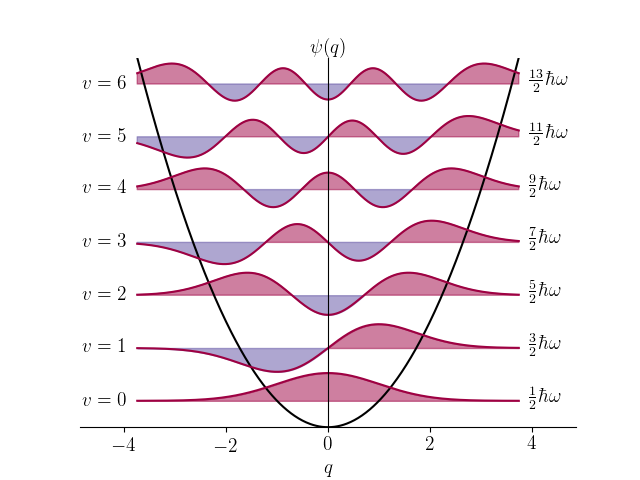

In [ ]:
# Hamiltonian matrix method to solve harmonic oscillator 15/02/2021
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
hbar=1
m=1
omega=1
N = 2014
a = 20.0
x = np.linspace(-a/2.,a/2.,N)
h = x[1]-x[0] # Should be equal to 2*np.pi/(N-1)
V = .5*m*omega*x*x
# V[N/2]=2/h   # This would add a "delta" spike in the center.
Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V) 
En,psiT = np.linalg.eigh(H) # This computes the eigen values and eigenvectors
psi = np.transpose(psiT) 
# The psi now contain the wave functions ordered so that psi[n] if the n-th eigen state.
plt.figure(figsize=(12,6))
plt.plot(x,psi[1],label='$\psi_1(x)$')
plt.plot(x,psi[2],label='$\psi_2(x)$')
plt.xlabel('x')
plt.ylabel('$\psi_n(x)$')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Check the normalization of the wave function arrays.
notok=False
for n in range(len(psi)):
    # s = np.sum(psi[n]*psi[n])
    s = np.linalg.norm(psi[n])  # This does the same as the line above.
    if np.abs(s - 1) > 0.00001: # Check if it is different from one.
        print("Wave function {} is not normalized to 1 but {}".format(n,s))
        notok=True

if not notok:
    print("All the $\psi_n(x)$ are normalized.")

fig2 = plt.figure(figsize=[12,7])
plt.title('Harmonic Oscillator')
plt.ylabel('$\psi(x)$')
plt.xlabel('$x$')
plt.plot([0,0],[-6,V[0]],color="blue")
plt.plot([-a/2.,a/2.],[0,0],color="blue")
plt.plot(x,0.1*V,color="grey",label="V(x) scaled by 0.1")
plt.ylim((-.8,1.))
plt.xlim((-6.,6.))
for i in range(0,5):
    if psi[i][int(N/8)] < 0:
        plt.plot(x,-psi[i]/np.sqrt(h),label="$E_{}$={:3.1f}".format(i,En[i]))
    else:
        plt.plot(x,psi[i]/np.sqrt(h),label="$E_{}$={:3.1f}".format(i,En[i]))

plt.title("Solution to harmonic oscillator")
plt.legend()
plt.savefig("Harmonic_Oscillator_WaveFunctions.pdf")
plt.show()

We want to now plot the initial wave function. We could try to shift the already calculated $\psi_0(x)$ array, but it is better to compute the function from a formula. The *main reason* for making this plot is to make sure the *normalization* of the function is correct. We would want the *same normalization* as our $\psi_n(x)$ arrays, so we need to muliply the function by $\sqrt{\Delta x}$, which we then divide out again when we plot. Doing this makes sure that the $c_n$ factors we compute later are correct and with the same normalization.

In [ ]:
fig2 = plt.figure(figsize=[10,7])
plt.title('Harmonic Oscillator and displaced ground state.')
plt.ylabel('$\psi(x)$')
plt.xlabel('$x$')
plt.plot([0,0],[-6,V[0]],color="blue")
plt.plot([-a/2.,a/2.],[0,0],color="blue")
plt.plot(x,0.1*V,color="grey",label="V(x) scaled by 0.1")
plt.ylim((-.1,1.))
plt.xlim((-5.,8.))
a0=5.
alpha = (m*omega/(np.pi*hbar))**0.25
psi0 = np.sqrt(h)*alpha*np.exp(-(x-a0)**2*m*omega/(2*hbar))  # This is the formula for the displaced state.
n0 = np.linalg.norm(psi0)
print("Check the normalization of psi0: ",n0)
plt.plot(x,psi0/np.sqrt(h),label="Displaced state $\Psi(x,0)$")
plt.plot(x,-psi[0]/np.sqrt(h),label="Ground state $\psi_0(x)$")
plt.legend()
plt.savefig("Displaced_state.pdf")
plt.show()

We can now compute the $c_n$ factors as a simple sum of the product of the initial wave and the $\psi_n(x)$ eigen states. There are many ways to accomplish this, looping over the $N$ eigen states. The way I do this below is particularly efficient, creating a new Numpy array of the $c_n$ factors. The line commented out does the calculation using list comprehension. The second line does this as a matrix multiplication. 

We now compute the energy of this initial state, so we can plot the line on our graph. This was not part of the homework assignment, but it is nice to be able to draw this. We compute the energy as: . We also compute the energy as $E=\int \Psi^*(x,t=0)  \hat{\mathrm{H}} \Psi(x,t-0)$, and compare. 

Once we have the $c_n$ we can sum them to make sure the normalization is indeed correct: $\sum |c_n|^2 =1$.

We can also use them to calculate the expactation value of the energy of the state: $<E>=\sum |c_n|^2 E_n$, which we can check against an algebraic computation:
$$ <E> = <T> + <V> = \frac{1}{2}\hbar\omega + \frac{1}{2}m\omega^2 |x_0|^2 = \frac{1}{2} + \frac{1}{2} 5^2 = 13$$
And finally we can also compute it directly from the Hamiltonian:
$$<E> = <\Psi(x,0)| \hat{\mathrm{H}} | \Psi(x,0)> = \int \Psi^*(x,0)H \Psi(x,0) dx$$. 

In [ ]:
# cn=np.array([np.sum(psi[i]*psi0) for i in range(N)],dtype='float')
cn = psi.dot(psi0)
print(cn[0:18])
print("Check sum: {:6.4f}".format(np.sum(cn*cn)))
E = np.sum(np.conjugate(cn)*cn*En)
print ("<E> = {:9.4f}".format(E))
E_check = np.sum( np.conjugate(psi0)*H.dot(psi0)) 
print("Check E=",E_check)

We now want to compute:
$$\Psi(x,t)=\sum_{n=1}^{n=\infty} c_n \psi_n(x) e^{-i(n+\frac{1}{2})\omega t}$$
For a particular time $t$ we thus want an array of numbers representing $\Psi$ at that time. A technical detail here is that we want to sum all the $n$ values for a particular $x_i$ of the product $c_n*\psi_n*\phi(t)$. Our wavefunctions are arranged in such a way that this would be a sum over the columns instead of over the rows (which is what we did when checking the normalization). We can circumvent this problem by using the original transposed version, psiT, of the wavefunctions. Below are three different implementation of this function, the first one is a bit more straight forward but slow, the second one is a bit faster (about a factor of 2.5), the third is fastest.

At this point you should start to worry about numerical accuracy. It turns out that for this particular situation the method we are using is accurate enough, and the solution is *stable*, that is, there are no diverging terms in the calculation. This will not be true for all situations where you solve the Schrödinger equation using matrix inversion (i.e. finding the eigen vectors). In many situations, including scattering, you will need to use more sophisticated ways of obtaining solutions.

In [ ]:
# This version creates an array of zeros, to which it then sequentially adds each of the terms in the sum.
# Note that we use the global psi array.
def psi_xt(t,cn):
    out = np.zeros(N,dtype='complex128')
    for n in range(N): 
        out += cn[n]*psi[n]*np.exp(-1j*(n+0.5)*omega*t)
    return(out)

# This version uses np.sum to accomplish the same thing as the function above.
def psi_xt2(t,cn):
    n = np.arange(len(cn)) 
    times = np.exp(-1j*(n+0.5)*omega*t)
    out = psiT.dot(cn*times)
    return(out)

# This version uses np.sum and now also the previously calculated energyes.
# This way, psi_xt3 will work even if the potential is distorted and the energy levels are no longer (n+0.5)*hbar*omega
def psi_xt3(t,cn):
    out = psiT.dot(cn*np.exp(-1j*En*t/hbar))
    return(out)

In [ ]:
fig2 = plt.figure(figsize=[10,5])
plt.title('Harmonic Oscillator')
plt.ylabel('$\psi(x)$')
plt.xlabel('$x$')
plt.plot([0,0],[-6,V[0]],color="blue")
plt.plot([-a/2.,a/2.+1.],[0,0],color="blue")
plt.plot(x,0.05*V,color="grey",label="V(x) scaled by 0.05")
plt.plot([-a/2.,a/2.],[E*0.05,E*0.05],color="grey",linestyle="dashed",label="<E> scaled by 0.05")
plt.ylim((-.1,0.8))
# plt.plot(x,psi0/np.sqrt(h),color='#dddddd')
for t in [0.,np.pi/4.,np.pi/2.,3.*np.pi/4.,np.pi]: # np.linspace(0,np.pi,8):
    print(t)
    plt.plot(x,np.abs(psi_xt3(t,cn))**2/h,label="t={:5.3}$\pi$".format(t/np.pi))
plt.legend()
plt.savefig("Displaced_state_vs_time.pdf")
plt.show()

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML

fig3 = plt.figure(figsize=[10,7])
ax = fig3.add_subplot(111, autoscale_on=False, xlim=(-10, 10), ylim=(-0.1, 1.))
ax.grid()

line, = ax.plot([], [], lw=2,color='red')
time_template = 'time = {:9.2f}s'
time_text = ax.text(0.05, 0.93, '', transform=ax.transAxes)

def init():
    plt.title('Harmonic Oscillator')
    plt.ylabel('$\psi(x)$')
    plt.xlabel('$x$')
    plt.plot([0,0],[-6,V[0]],color="blue")
    plt.plot([-a/2.,a/2.],[0,0],color="blue")
    plt.plot(x,0.05*V,color="grey",label="V(x) scaled by 0.05")
    plt.plot([-a/2.,a/2.],[E*0.05,E*0.05],color="grey",linestyle="dashed",label="<E> scaled by 0.05")
    line.set_data([], [])
    time_text.set_text(time_template.format(0.))
    return line, time_text

def animate(t):
    #t = (float(i)/100.)*(4.*np.pi/omega)
    line.set_data(x,np.abs(psi_xt3(t,cn)/np.sqrt(h)))
    time_text.set_text(time_template.format(t))
    return line,  time_text
frame_rate = 30     # Frame rate in Hz. Make higher for smoother movie, but it takes longer to compute.
time_slowdown = 10  # Run time x times slower than normal. Since omega=1, we want this about 10.
ani = animation.FuncAnimation(fig3, animate, np.linspace(0,2*np.pi/omega,frame_rate*time_slowdown),
                              interval=1000./frame_rate, blit=True, init_func=init)
HTML(ani.to_html5_video())


In [ ]:
frame_rate = 30     # Frame rate in Hz. Make higher for smoother movie, but it takes longer to compute.
time_slowdown = 10  # Run time x times slower than normal. Since omega=1, we want this about 10.
ani = animation.FuncAnimation(fig3, animate, np.linspace(0,2*np.pi/omega,frame_rate*time_slowdown),
                              interval=1000./frame_rate, blit=True, init_func=init)
HTML(ani.to_jshtml())

In [ ]:
# Hamiltonian matrix method to solve anharmonic oscillator 15/02/2021
# 15/02/2021
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
hbar=1
m=1
omega=1
N = 2014
a = 10.0
x = np.linspace(-a/2.,a/2.,N)
h = x[1]-x[0] # Should be equal to 2*np.pi/(N-1)
V = .5*m*omega*x*x+.1*x**4
#V[int(N/2)]=2/h   # This would add a "delta" spike in the center.
Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V) 
En,psiT = np.linalg.eigh(H) # This computes the eigen values and eigenvectors
psi = np.transpose(psiT) 
# The psi now contain the wave functions ordered so that psi[n] if the n-th eigen state.
plt.figure(figsize=(12,6))
plt.plot(x,psi[1],label='$\psi_1(x)$')
plt.plot(x,psi[2],label='$\psi_2(x)$')
plt.xlabel('x')
plt.ylabel('$\psi_n(x)$')
plt.legend(loc='upper left')
plt.show()

In [ ]:
N=10
(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))

In [ ]:
# Hamiltonian matrix method to solve inside solution of infinite well 15/02/2021
# 15/02/2021
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
hbar=1
m=1
omega=1
N = 2014
a = 10.0
x = np.linspace(-a/2.,a/2.,N)
h = x[1]-x[0] # Should be equal to 2*np.pi/(N-1)
#V = .5*m*omega*x*x+.1*x**4
V = 0*x
#V[int(N/2)]=2/h   # This would add a "delta" spike in the center.
Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V) 
En,psiT = np.linalg.eigh(H) # This computes the eigen values and eigenvectors
psi = np.transpose(psiT) 
# The psi now contain the wave functions ordered so that psi[n] if the n-th eigen state.
plt.figure(figsize=(12,6))
plt.plot(x,psi[1],label='$\psi_1(x)$')
plt.plot(x,psi[2],label='$\psi_2(x)$')
plt.xlabel('x')
plt.ylabel('$\psi_n(x)$')
plt.legend(loc='upper left')
plt.show()

In [ ]:
En

In [ ]:
import matplotlib.pyplot as plt
def simp13dis(h,fx):
  n=len(fx)
  I=0
  for i in range(n):
    if i==0 or i==n:
      I+=fx[i]
    elif i%2!=0:
      I+=4*fx[i]
    else:
      I+=2*fx[i]
    I=I*h/3
  return I
# Normalisation of discrete wavefunction
def norm(psi,dx):
  N=len(psi)
  psi2=[psi[i]**2 for i in range(N)]
  psimod2=simp13dis(dx,psi2)
  normpsi=[psi[i]/psimod2**0.5 for i in range(N)]
  return normpsi
import matplotlib.pyplot as plt
# Solution of Schrodinger equation:
def wavefn(mhdx2,psi,vi,E):
  N=len(psi)
  psiE=[psi[i] for i in range(N)]
  P=[mhdx2*(vi[i]-E) for i in range(N)]

  for i in range(2,N):
    d=1-1/12*P[i]
    a=2*(1+5/12*P[i-1])
    b=-(1-1/12*P[i-2])
    psiE[i]=(a/d)*psiE[i-1]+(b/d)*psiE[i-2]
  return psiE
def NumerovSch(mhdx2,vi,psi0,psi1,psiN,nodes,mxItr):
  N=len(vi)-1
  Emx=max(vi)
  Emn=min(vi)
  psiIn=[0 for i in range(N+1)]
  psiIn[0],psiIn[1],psiIn[N]=psi0,psi1,psiN
  itr=0
  while abs(Emx-Emn)>1e-6 and itr<mxItr:
    E=.5*(Emx+Emn)
    psi=wavefn(mhdx2,psiIn,vi,E)
       
    # Node counting
    cnt=0
    for i in range(1,N-2):
      if psi[i]*psi[i+1]<0:
        cnt+=1
    if cnt>nodes:
      Emx=E
    elif cnt<nodes:
      Emn=E
    else:
      if psi[N-1]>psi[N]:
        Emn=E
      elif psi[N-1]<psi[N]:
        Emx=E
    itr+=1
  if itr<mxItr:
    return E,psi
  else:
    return None,None
def V(k,x):
  return .5*k*x*x
hbar,m=.1,1.0
dx=.01
mxItr=100
psi0,psiN=0,0
k=1
stln=['b','r','m','g','c','y']
x0,xN=[-1.2,-1.4,-1.5,-1.6,-1.7,-1.8],[1.2,1.4,1.5,1.6,1.7,1.8]
psi0,psiN=0,0
for nodes in range(4):
  N=int((xN[nodes]-x0[nodes])/dx)
  dx=(xN[nodes]-x0[nodes])/N
  mhdx2=2*m*dx**2/hbar**2
  x=[x0[nodes]+i*dx for i in range(N+1)]
  Vi=[V(k,x[i]) for i in range(N+1)]
  psi1=(-1)**nodes*1e-4
  E,psi=NumerovSch(mhdx2,Vi,psi0,psi1,psiN,nodes,mxItr)
  if E!=None:
    psi=norm(psi,dx)
    #plt.figure(figsize=(12,6))
    plt.plot(x,psi,stln[nodes],label=r'E=%.4f$\psi_%d(x)$'%(E,nodes))
    #plt.plot(x,Vi,'k--',label='Potential')
xax=[0 for i in range(N+1)] # x-axis
#plt.figure(figsize=(12,6))
plt.plot(x,xax,'k')
plt.plot(x,Vi,'k--',label='Potential')
plt.legend(loc='lower left')
plt.xlabel('x',size=20)
plt.ylabel('$\psi(x)$',size=30)
#plt.figure(figsize=(12,6))
plt.show()

# The harmonic oscillator wavefunctions:
The harmonic oscillator is often used as an approximate model for the behaviour of some quantum systems, for example the vibrations of a diatomic molecule. The Schrödinger equation for a particle of mass m moving in one dimension in a potential $ V(x)=\frac{1}{2}kx^2$ is
# $ −\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}+\frac{1}{2}kx^2ψ=E\psi.$
With the change of variable, $ q=(mk/\hbar^2)^{1/4}x $, this equation becomes
$-\frac{1}{2}\frac{d^2\psi}{dq^2}+\frac{1}{2}\psi=\frac{E\psi}{\hbar\omega}$
where $ω=\sqrt(k/m)$. This differential equation has an exact solution in terms of a quantum number $ v=0,1,2,⋯$
#$\psi(q)=N_vH_v(q)exp(−q^2/2)$
where $N_v=(\sqrtπ 2^vv!)^{−1/2}$ is a normalization constant and $H_v(q)$ is the Hermite polynomial of order v, defined by:
$H_v(q)=(−1)^ve^{q^2}\frac{d^v}{dq^v}(e^{−q^2})$.
The Hermite polynomials obey a useful recursion formula:
$H_{n+1}(q)=2qH_n(q)−2nH_{n−1}(q)$.
so given the first two: H0=1 and H1=2q, we can calculate all the others.

The following code plots the harmonic oscillator wavefunctions (PLOT_PROB = False) or probability densities (PLOT_PROB = True) for vibrational levels up to VMAX on the vibrational energy levels depicted within the potential, $V=q^2/2$.

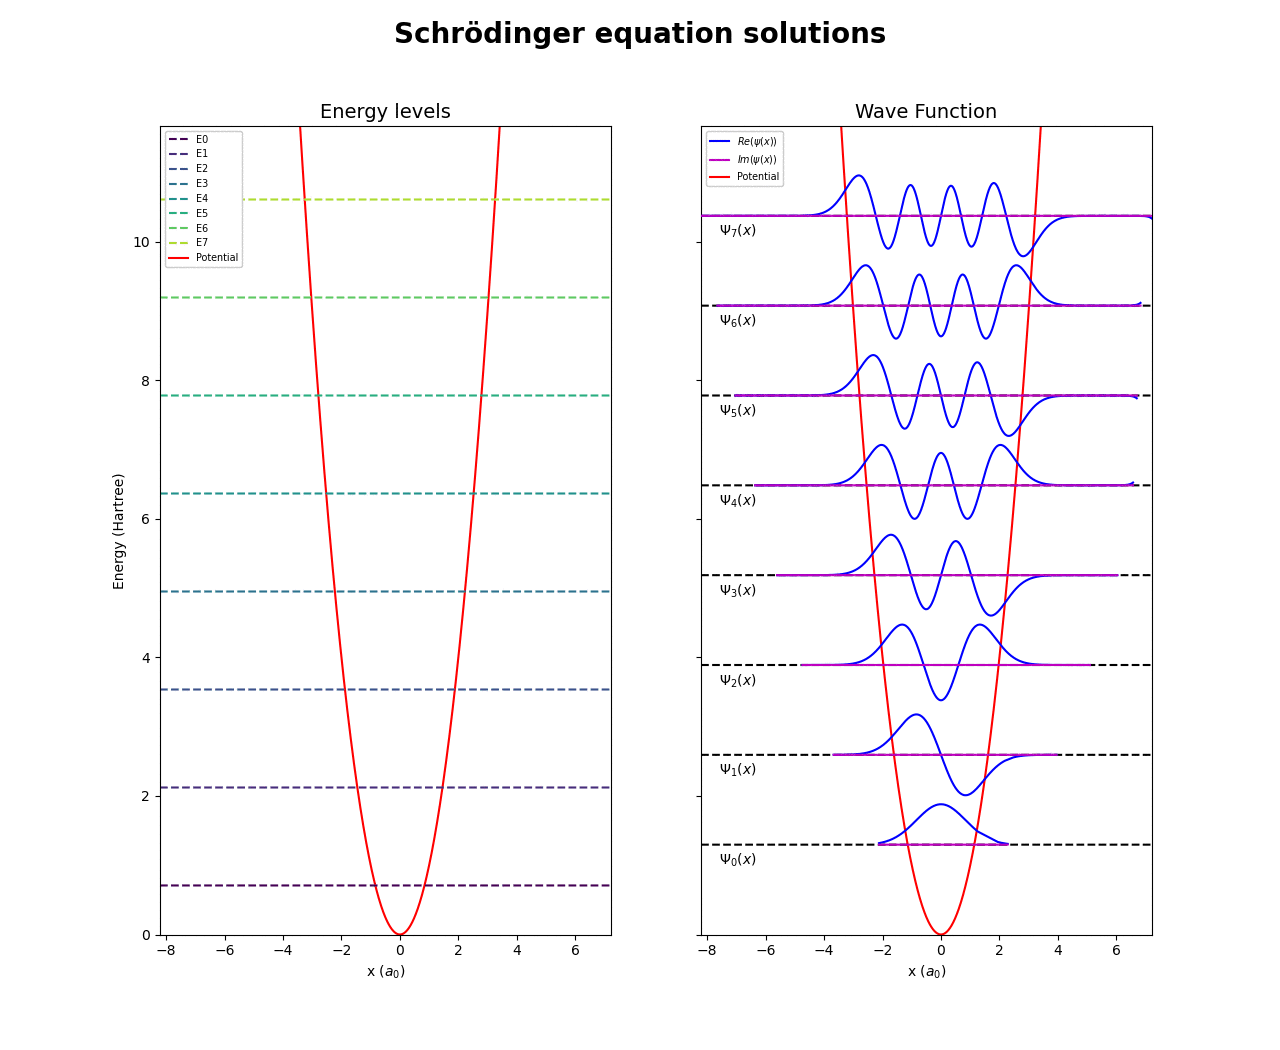

http://phys.ubbcluj.ro/~tbeu/INP/programs.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar

m= 1e-27
E= 1.5

def numerov_step(psi_1,psi_2,k1,k2,k3,h):
    #k1=k_(n-1), k2=k_n, k3=k_(n+1)
    #psi_1 = psi_(n-1) and psi_2=psi_n
    m = 2*(1-(5/12) * h**2 * k2**2)*psi_2
    n = (1+(1/12)*h**2*k1**2)*psi_1
    o = 1 + (1/12) *h**2 *k3**2
    return (m-n)/o

def numerov(N,x0,xE,a):
    x,dx = np.linspace(x0,xE,N+1,retstep=True)

    def V(x,a):
        #if (np.abs(x)<a):
          return .5*x**2
        #else:
          #  return 0

    k = np.zeros(N+1)
    for i in range(len(k)):
        k[i] = 2*m*(E-V(x[i],a))/hbar**2

    psi= np.zeros(N+1)
    psi[0]=0
    psi[1]=.10  
    psi[2]=1.0
    

    for j in np.arange(2,N):
        psi[j+1]= numerov_step(psi[j],psi[j+1],k[j-1],k[j],k[j+1],dx)

    return psi

x0 =-3
xE = 3
N =1000

psi=numerov(N,x0,xE,3)

x = np.linspace(x0,xE,N+1)
y=[psi[i] for i in range(len(x))]

plt.figure()
plt.plot(x,psi)
plt.show()

In [ ]:
import pylab as lab
import math

N = 60000 # iterations

h = 0.0001
h2 = pow(h,2)

epsilon = 3.5 # n+1/2

y = 0.0
k = 0.0
x = -1*(N-2)*h

k_minus_2 = epsilon + x-2*h # k_0
k_minus_1 = epsilon + x-h # k_1
a = 0.1
y_minus_2 = 0 # y_0
y_minus_1 = a # y_1

x_out = []
y_out = []

n=-1*N+2

while n<N-2:
  n+=1
  x += h;
  k = 2*epsilon - pow(x, 2)
  b = h2/12
  y = ( 2*(1-5*b*k_minus_1) * y_minus_1 - (1+b*k_minus_2) * y_minus_2 ) / (1 + b * k)

  # Save for plotting
  x_out.append(x)
  y_out.append(y)

  # Shift for next iteration
  y_minus_2 = y_minus_1
  y_minus_1 = y
  k_minus_2 = k_minus_1
  k_minus_1 = k


# Plot
lab.figure(1)
lab.plot(x_out, y_out, label="$\epsilon = "+repr(epsilon)+"$")
lab.xlabel("x")
lab.ylabel("y")
lab.title("Schroedinger Eqn in Harmonic Potential")
lab.legend(loc=1)
lab.show()
lab.grid()

In [ ]:
from scipy import *
from scipy import integrate
from scipy import optimize

def Schroed_deriv(y,r,l,En):
    "Given y=[u,u'] returns dy/dr=[u',u''] "
    (u,up) = y
    return array([up, (l*(l+1)/r**2-2/r-En)*u])

R = linspace(1e-10,20,500)
l=0
E0=-1.0

ur = integrate.odeint(Schroed_deriv, [0.0, 1.0], R, args=(l,E0))
from pylab import *
%matplotlib inline

plot(R,ur)
grid()
show()


In [ ]:
R = linspace(1e-10,20,500)
l=0
E0=-1.0
Rb=R[::-1] # invert the mesh

urb = integrate.odeint(Schroed_deriv, [0.0, -1e-5], Rb, args=(l,E0))
ur = urb[:,0][::-1] # we take u(r) and invert it in R.

norm=integrate.simps(ur**2,x=R)
ur *= 1./sqrt(norm)

In [ ]:
plot(R,ur)
grid()
show()
plot(R,ur)
xlim(0,0.01)
ylim(0,0.01)
show()

In [ ]:
# Subroutine 
def SolveSchroedinger(En,l,R):
    Rb=R[::-1]
    du0=-1e-5
    urb=integrate.odeint(Schroed_deriv, [0.0,du0], Rb, args=(l,En))
    ur=urb[:,0][::-1]
    norm=integrate.simps(ur**2,x=R)
    ur *= 1./sqrt(norm)
    return ur

l=1
En=-1./(2**2)  # 2p orbital

l=1
En = -0.25

Ri = linspace(1e-6,20,500)   # linear mesh already fails for this case
ui = SolveSchroedinger(En,l,Ri)


R = logspace(-5,2.,500)
ur = SolveSchroedinger(En,l,R)


#ylim([-0.1,0.1])
plot(R,ur,'g-')
#plot(Ri,ui,'s-')
xlim([0,20])

In [ ]:
def Shoot(En,R,l):
    Rb=R[::-1]
    du0=-1e-5
    ub=integrate.odeint(Schroed_deriv, [0.0,du0], Rb, args=(l,En))
    ur=ub[:,0][::-1]
    norm=integrate.simps(ur**2,x=R)
    ur *= 1./sqrt(norm)
    
    ur = ur/R**l
    
    f0 = ur[0]
    f1 = ur[1]
    f_at_0 = f0 + (f1-f0)*(0.0-R[0])/(R[1]-R[0])
    return f_at_0

In [ ]:
R = logspace(-5,2.2,500)
Shoot(-1./2**2,R,1)

In [ ]:
def FindBoundStates(R,l,nmax,Esearch):
    n=0
    Ebnd=[]
    u0 = Shoot(Esearch[0],R,l)
    for i in range(1,len(Esearch)):
        u1 = Shoot(Esearch[i],R,l)
        if u0*u1<0:
            Ebound = optimize.brentq(Shoot,Esearch[i-1],Esearch[i],xtol=1e-16,args=(R,l))
            Ebnd.append((l,Ebound))
            if len(Ebnd)>nmax: break
            n+=1
            print('Found bound state at E=%14.9f E_exact=%14.9f l=%d' % (Ebound, -1.0/(n+l)**2,l))
        u0=u1
    
    return Ebnd

Esearch = -1.2/arange(1,20,0.2)**2

R = logspace(-6,2.2,500)

nmax=7
Bnd=[]
for l in range(nmax-1):
    Bnd += FindBoundStates(R,l,nmax-l,Esearch)

In [ ]:
def cmpE(x,y):
    if abs(x[1]-y[1])>1e-4:
        return cmp(x[1],y[1])
    else:
        return cmp(x[0],y[0])


    

In [ ]:
Bnd

In [ ]:
Z=28 # like Ni
N=0
rho=zeros(len(R))
for (l,En) in Bnd:
    ur = SolveSchroedinger(En,l,R)
    dN = 2*(2*l+1)
    if N+dN<=Z:
        ferm=1.
    else:
        ferm=(Z-N)/float(dN)
    drho = ur**2 * ferm * dN/(4*pi*R**2)
    rho += drho
    N += dN
    print('adding state (%2d,%14.9f) with fermi=%4.2f and current N=%5.1f' % (l,En,ferm,N))
    if N>=Z: break

In [ ]:
from pylab import *
%matplotlib inline

plot(R,rho*(4*pi*R**2),label='charge density')
xlim([0,25])
show()

# Numerov algorithm
The general purpose integration routine is not the best method for solving the Schroedinger equation, which does not have first derivative terms.

Numerov algorithm is better fit for such equations, and its algorithm is summarized below.

The second order linear differential equation (DE) of the form

$ x′′(t)=f(t)x(t)+u(t) $
 
is a target of Numerov algorithm.

Due to a special structure of the DE, the fourth order error cancels and leads to sixth order algorithm using second order integration scheme.

If we expand x(t) to some higher power and take into account the time reversal symmetry of the equation, all odd term cancel

$x(h)=x(0)+hx′(0)+12h^2x′′(0)+\frac{1}{3!}h^3x^{(3)}(0)+\frac{1}{4!}h^4x^{(4)}(0)+\frac{1}{5!}h^5x^{(5)}(0)+...x(−h)=x(0)−hx′(0)+\frac{1}{2}h^2x′′(0)−\frac{1}{3!}h^3x^{(3)}(0)+\frac{1}{4!}h^4x^{(4)}(0)−\frac{1}{5!}h^5x^{(5)}(0)+... $
 
hence

$ x(h)+x(−h)=2x(0)+h^2(f(0)x(0)+u(0))+\frac{2}{4!}h^4x^{(4)}(0)+O(h6)$
 
If we are happy with  O(h4)  algorithm, we can neglect  x(4)  term and get the following recursion relation

$x_i+1−2x_i+x_i−1=h^2(f_ix_i+u_i)$.
 
But we know from the differential equation that

$x(4)=\frac{d^2x′′(t)}{dt^2}=\frac{d^2}{dt^2}(f(t)x(t)+u(t))$
 
which can be approximated by

$x(4)∼f_i+1x_i+1+ui+1−2fixi−2ui+fi−1xi−1+ui−1h2 $
 
Inserting the fourth order derivative into the above recursive equation (forth equation in his chapter), we get

$x_i+1−2x_i+x_i−1=h^2(f_ix_i+u_i)+h^2/12(f_i+1x_i+1+u_i+1−2f_ix_i−2u_i+f_i−1x_i−1+u_i−1)$
 
If we switch to a new variable  wi=xi(1−h212fi)−h212ui  we are left with the following equation

$wi+1−2wi+wi−1=h^2(f_ix_i+u_i)+O(h6)$
 
The variable  x  needs to be recomputed at each step with  $x_i=(w_i+h^2/12u_i)$$(1−\frac{h^2}{12}f_i)$

In [ ]:
# NUMEROV Solution Schrodinger Equation: Hydrogen Atom
from pylab import *
%matplotlib inline
#import weave
def Numerovc(f, x0_, dx, dh_):
    code_Numerov="""
    double h2 = dh*dh;
    double h12 = h2/12.;
    
    double w0 = x(0)*(1-h12*f(0));
    double w1 = x(1)*(1-h12*f(1));
    double xi = x(1);
    double fi = f(1);
    for (int i=2; i<f.size(); i++){
        double w2 = 2*w1-w0+h2*fi*xi;  // here fi=f1
        fi = f(i);                     // fi=f2
        xi = w2/(1-h12*fi);
        x(i)=xi;
        w0 = w1;
        w1 = w2;
    }
    """
    x = zeros(len(f))
    dh=float(dh_)
    x[0]=x0_
    x[1]=x0_+dh*dx
    #weave.inline(code_Numerov, ['f','dh','x'], type_converters=weave.converters.blitz, compiler = 'gcc')
    return x

def fSchrod(En, l, R):
    return l*(l+1.)/R**2-2./R-En

def ComputeSchrod(En,R,l):
    "Computes Schrod Eq." 
    f = fSchrod(En,l,R[::-1])
    ur = Numerovc(f,0.0,-1e-7,-R[1]+R[0])[::-1]
    norm = integrate.simps(ur**2,x=R)
    return ur*1/sqrt(abs(norm))

def Shoot(En,R,l):
    ur = ComputeSchrod(En,R,l)
    ur = ur/R**l
    f0 = ur[0]
    f1 = ur[1]
    f_at_0 = f0 + (f1-f0)*(0.0-R[0])/(R[1]-R[0])
    return f_at_0

def FindBoundStates(R,l,nmax,Esearch):
    n=0
    Ebnd=[]
    u0 = Shoot(Esearch[0],R,l)
    for i in range(1,len(Esearch)):
        u1 = Shoot(Esearch[i],R,l)
        if u0*u1<0:
            Ebound = optimize.brentq(Shoot,Esearch[i-1],Esearch[i],xtol=1e-16,args=(R,l))
            Ebnd.append((l,Ebound))
            if len(Ebnd)>nmax: break
            n+=1
            print('Found bound state at E=%14.9f E_exact=%14.9f l=%d' % (Ebound, -1.0/(n+l)**2,l))
        u0=u1
    
    return Ebnd

def cmpE(x,y):
    if abs(x[1]-y[1])>1e-4:
        return cmp(x[1],y[1])
    else:
        return cmp(x[0],y[0])

Esearch = -1.2/arange(1,20,0.2)**2

R = linspace(1e-8,100,2000)

nmax=5
Bnd=[]
for l in range(nmax-1):
    Bnd += FindBoundStates(R,l,nmax-l,Esearch)
    
#Bnd.sort(cmpE)

Z=28  # Like Ni ion

N=0
rho=zeros(len(R))
for (l,En) in Bnd:
    #ur = SolveSchroedinger(En,l,R)
    ur = ComputeSchrod(En,R,l)
    dN = 2*(2*l+1)
    if N+dN<=Z:
        ferm=1.
    else:
        ferm=(Z-N)/float(dN)
    drho = ur**2 * ferm * dN/(4*pi*R**2)
    rho += drho
    N += dN
    print('adding state', (l,En), 'with fermi=', ferm)
    plot(R, drho*(4*pi*R**2))
    if N>=Z: break
xlim([0,25])
show()

plot(R,rho*(4*pi*R**2),label='charge density')
xlim([0,25])
show()

# HYDROGEN ATOM: SCHRODINGER EQUATION

![alt text]( http://psi.phys.wits.ac.za/teaching/Connell/phys284/2005/lecture-03/lecture_03/img35.png)

# $ \hat {H} (r , \theta , \varphi ) \psi (r , \theta , \varphi ) = E \psi ( r , \theta , \varphi)  $



# $ \hat {V} (r) = - \dfrac {e^2}{4 \pi \epsilon _0 r } $


# $$\left \{ -\dfrac {\hbar ^2}{2 \mu r^2} \left [ \dfrac {\partial}{\partial r} \left (r^2 \dfrac {\partial}{\partial r} \right ) + \dfrac {1}{\sin \theta } \dfrac {\partial}{\partial \theta } \left ( \sin \theta \dfrac {\partial}{\partial \theta} \right ) + \dfrac {1}{\sin ^2 \theta} \dfrac {\partial ^2}{\partial \varphi ^2} \right ] - 
\dfrac {e^2}{4 \pi \epsilon _0 r } \right \} \psi (r , \theta , \varphi ) = E \psi (r , \theta , \varphi ) $$

# $\color{red} \psi (r , \theta , \varphi ) =\color{green} R (r) Y (\theta , \varphi ) $

#$   \bbox[pink]{\frac{1}{R}\frac{\rm d}{{\rm d}r}\left(r^2\frac{{\rm d}R}{{\rm d}r}\right)}+\bbox[lightblue]{\frac{1}{Y\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial Y}{\partial\theta}\right)+\frac{1}{Y\sin^2\theta}\frac{\partial^2Y}{\partial\phi^2}}+\bbox[pink]{\frac{2\mu r^2}{\hbar^2}\left(E+\frac{Ze^2}{4\pi\epsilon_0r}\right)}=0\qquad.
$

# Energy eigenvalues of Hydrogen atom:

![alt text]( http://psi.phys.wits.ac.za/teaching/Connell/phys284/2005/lecture-03/lecture_03/img75.png )

# NORMALIZATION CONDITION:

![alt text]( http://psi.phys.wits.ac.za/teaching/Connell/phys284/2005/lecture-03/lecture_03/img87.png)

![alt text](https://physicspython.files.wordpress.com/2020/06/hydrogen_featured.png?w=1024&h=633&crop=1)

In [ ]:
# CODE TO PLOT THE ABOVE FUNCTION
import numpy as np
from scipy import constants as const
from scipy import sparse as sparse
from scipy.sparse.linalg import eigs
from matplotlib import pyplot as plt
 
hbar = const.hbar
e = const.e
m_e = const.m_e
pi = const.pi
epsilon_0 = const.epsilon_0
joul_to_eV = e
def calculate_potential_term(r):
    potential = e**2 / (4.0 * pi * epsilon_0) / r
    potential_term = sparse.diags((potential))
    return potential_term
 
def calculate_angular_term(r):
    angular = l * (l + 1) / r**2
    angular_term = sparse.diags((angular))
    return angular_term
 
def calculate_laplace_three_point(r):
    h = r[1] - r[0]
     
    main_diag = -2.0 / h**2 * np.ones(N)     
    off_diag  =  1.0 / h**2 * np.ones(N - 1)
    laplace_term = sparse.diags([main_diag, off_diag, off_diag], (0, -1, 1))
    return laplace_term
     
def build_hamiltonian(r):
    laplace_term =   calculate_laplace_three_point(r)
    angular_term =   calculate_angular_term(r)
    potential_term = calculate_potential_term(r)
     
    hamiltonian = -hbar**2 / (2.0 * m_e) * (laplace_term - angular_term) - potential_term
 
    return hamiltonian
N = 2000
l = 0
r = np.linspace(2e-9, 0.0, N, endpoint=False)
hamiltonian = build_hamiltonian(r)
""" solve eigenproblem """
number_of_eigenvalues = 30
eigenvalues, eigenvectors = eigs(hamiltonian, k=number_of_eigenvalues, which='SM')
 
""" sort eigenvalue and eigenvectors """
eigenvectors = np.array([x for _, x in sorted(zip(eigenvalues, eigenvectors.T), key=lambda pair: pair[0])])
eigenvalues = np.sort(eigenvalues)
 
""" compute probability density for each eigenvector """
densities = [np.absolute(eigenvectors[i, :])**2 for i in range(len(eigenvalues))]
def plot(r, densities, eigenvalues):
    plt.xlabel('x ($\\mathrm{\AA}$)')
    plt.ylabel('probability density ($\\mathrm{\AA}^{-1}$)')
     
    energies = ['E = {: >5.2f} eV'.format(eigenvalues[i].real / e) for i in range(3)]
    plt.plot(r * 1e+10, densities[0], color='blue',  label=energies[0])
    plt.plot(r * 1e+10, densities[1], color='green', label=energies[1])
    plt.plot(r * 1e+10, densities[2], color='red',   label=energies[2])
     
    plt.legend()
    plt.show()
    return
 
""" plot results """
plot(r, densities, eigenvalues)


![alt text](https://chem.libretexts.org/@api/deki/files/41589/9b0ea297c83419c78eee347ed4c74dd2.jpg?revision=1)

## Spherical Harmonics

$l=0:~~~~~~Y_{0}^{0}(\theta,\varphi)={1\over 2}\sqrt{1\over \pi}$



$l=1~~~\begin{align}     Y_{1}^{-1}(\theta,\varphi) & = {1\over 2}\sqrt{3\over 2\pi}\cdot e^{-i\varphi}\cdot\sin\theta\quad                                  = {1\over 2}\sqrt{3\over 2\pi}\cdot{(x-iy)\over r} \\    Y_{1}^{0}(\theta,\varphi) & = {1\over 2}\sqrt{3\over \pi}\cdot\cos\theta\quad \quad                                 = {1\over 2}\sqrt{3\over \pi}\cdot{z\over r} \\    Y_{1}^{1}(\theta,\varphi) & = {-1\over 2}\sqrt{3\over 2\pi}\cdot e^{i\varphi}\cdot\sin\theta\quad                                  = {-1\over 2}\sqrt{3\over 2\pi}\cdot{(x+iy)\over r}   \end{align}$

#  l = 0
\begin{align}Y_{00} & = s = Y_0^0 = \frac{1}{2} \sqrt{\frac{1}{\pi}}\end{align}

$
$l = 1
\begin{align}  Y_{1,-1} & = p_y =  i \sqrt{\frac{1}{2}} \left( Y_1^{- 1} + Y_1^1 \right) = \sqrt{\frac{3}{4 \pi}} \cdot \frac{y}{r}  \\  Y_{10} & = p_z = Y_1^0 = \sqrt{\frac{3}{4 \pi}} \cdot \frac{z}{r} \\  Y_{11} & = p_x = \sqrt{\frac{1}{2}} \left( Y_1^{- 1} - Y_1^1 \right) = \sqrt{\frac{3}{4 \pi}} \cdot \frac{x}{r} \end{align} $
$
l = 2
\begin{align}Y_{2,-2} & = d_{xy} = i \sqrt{\frac{1}{2}} \left( Y_2^{- 2} - Y_2^2\right) = \frac{1}{2} \sqrt{\frac{15}{\pi}} \cdot \frac{x y}{r^2}  \\Y_{2,-1} & = d_{yz} = i \sqrt{\frac{1}{2}} \left( Y_2^{- 1} + Y_2^1 \right) = \frac{1}{2} \sqrt{\frac{15}{\pi}} \cdot \frac{y z}{r^2} \\Y_{20} & = d_{z^2} = Y_2^0 = \frac{1}{4} \sqrt{\frac{5}{\pi}} \cdot \frac{- x^2 - y^2 + 2 z^2}{r^2}  \\Y_{21} & = d_{xz} = \sqrt{\frac{1}{2}} \left( Y_2^{- 1} - Y_2^1 \right) = \frac{1}{2} \sqrt{\frac{15}{\pi}} \cdot \frac{z x}{r^2} \\Y_{22} & = d_{x^2-y^2} = \sqrt{\frac{1}{2}} \left( Y_2^{- 2} + Y_2^2 \right) = \frac{1}{4} \sqrt{\frac{15}{\pi}} \cdot \frac{x^2 - y^2 }{r^2}\end{align} $
$
l = 3
\begin{align}Y_{3,-3} & = f_{y(3x^2-y^2)} = i \sqrt{\frac{1}{2}} \left( Y_3^{- 3} + Y_3^3 \right) = \frac{1}{4} \sqrt{\frac{35}{2 \pi}} \cdot \frac{\left( 3 x^2 - y^2 \right) y}{r^3} \\Y_{3,-2} & = f_{xyz} = i \sqrt{\frac{1}{2}} \left( Y_3^{- 2} - Y_3^2 \right) = \frac{1}{2} \sqrt{\frac{105}{\pi}} \cdot \frac{xy z}{r^3} \\Y_{3,-1} & = f_{yz^2} = i \sqrt{\frac{1}{2}} \left( Y_3^{- 1} + Y_3^1 \right) = \frac{1}{4} \sqrt{\frac{21}{2 \pi}} \cdot \frac{y (4 z^2 - x^2 - y^2)}{r^3} \\Y_{30} & = f_{z^3} = Y_3^0 = \frac{1}{4} \sqrt{\frac{7}{\pi}} \cdot \frac{z (2 z^2 - 3 x^2 - 3 y^2)}{r^3} \\Y_{31} & = f_{xz^2} = \sqrt{\frac{1}{2}} \left( Y_3^{- 1} - Y_3^1 \right) = \frac{1}{4} \sqrt{\frac{21}{2 \pi}} \cdot \frac{x (4 z^2 - x^2 - y^2)}{r^3} \\Y_{32} & = f_{z(x^2-y^2)} = \sqrt{\frac{1}{2}} \left( Y_3^{- 2} + Y_3^2 \right) = \frac{1}{4} \sqrt{\frac{105}{\pi}} \cdot \frac{\left( x^2 - y^2 \right) z}{r^3} \\Y_{33} & = f_{x(x^2-3y^2)} = \sqrt{\frac{1}{2}} \left( Y_3^{- 3} - Y_3^3 \right) = \frac{1}{4} \sqrt{\frac{35}{2 \pi}} \cdot \frac{\left( x^2 - 3 y^2 \right) x}{r^3}\end{align}$
$
l = 4
\begin{align}Y_{4,-4} & = g_{xy(x^2-y^2)} = i \sqrt{\frac{1}{2}} \left( Y_4^{- 4} - Y_4^4 \right) = \frac{3}{4} \sqrt{\frac{35}{\pi}} \cdot \frac{xy \left( x^2 - y^2 \right)}{r^4} \\Y_{4,-3} & = g_{zy^3} = i \sqrt{\frac{1}{2}} \left( Y_4^{- 3} + Y_4^3 \right) = \frac{3}{4} \sqrt{\frac{35}{2 \pi}} \cdot \frac{(3 x^2 - y^2) yz}{r^4} \\Y_{4,-2} & = g_{z^2xy} = i \sqrt{\frac{1}{2}} \left( Y_4^{- 2} - Y_4^2 \right) = \frac{3}{4} \sqrt{\frac{5}{\pi}} \cdot \frac{xy \cdot (7 z^2 - r^2)}{r^4} \\Y_{4,-1} & = g_{z^3y} = i \sqrt{\frac{1}{2}} \left( Y_4^{- 1} + Y_4^1\right) = \frac{3}{4} \sqrt{\frac{5}{2 \pi}} \cdot \frac{yz \cdot (7 z^2 - 3 r^2)}{r^4} \\Y_{40} & = g_{z^4} = Y_4^0 = \frac{3}{16} \sqrt{\frac{1}{\pi}} \cdot \frac{(35 z^4 - 30 z^2 r^2 + 3 r^4)}{r^4} \\Y_{41} & = g_{z^3x} = \sqrt{\frac{1}{2}} \left( Y_4^{- 1} - Y_4^1 \right) = \frac{3}{4} \sqrt{\frac{5}{2 \pi}} \cdot \frac{xz \cdot (7 z^2 - 3 r^2)}{r^4} \\Y_{42} & = g_{z^2xy} = \sqrt{\frac{1}{2}} \left( Y_4^{- 2} + Y_4^2 \right) = \frac{3}{8} \sqrt{\frac{5}{\pi}} \cdot \frac{(x^2 - y^2) \cdot (7 z^2 - r^2)}{r^4} \\Y_{43} & = g_{zx^3} = \sqrt{\frac{1}{2}} \left( Y_4^{- 3} - Y_4^3 \right) = \frac{3}{4} \sqrt{\frac{35}{2 \pi}} \cdot \frac{(x^2 - 3 y^2) xz}{r^4} \\Y_{44} & = g_{x^4+y^4} = \sqrt{\frac{1}{2}} \left( Y_4^{- 4} + Y_4^4 \right) = \frac{3}{16} \sqrt{\frac{35}{\pi}} \cdot \frac{x^2 \left( x^2 - 3 y^2 \right) - y^2 \left( 3 x^2 - y^2 \right)}{r^4}\end{align} $
 

In [ ]:
! pip install ipyvolume

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import scipy.integrate as integrate

# Increase resolution for retina display
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Load interactive widgets
import ipywidgets as widgets

import ipyvolume as ipv


In [ ]:
# Import special functions 
import scipy.special as spe
def psi_R(r,n=1,l=0):

    coeff = np.sqrt((2.0/n)**3 * spe.factorial(n-l-1) /(2.0*n*spe.factorial(n+l)))
    
    laguerre = spe.assoc_laguerre(2.0*r/n,n-l-1,2*l+1)
    
    return coeff * np.exp(-r/n) * (2.0*r/n)**l * laguerre
r = np.linspace(0,100,1000)

R = psi_R(r,n=5,l=1)

plt.plot(r, R**2, lw=3)

plt.xlabel('$r [a_0]$',fontsize=20)

plt.ylabel('$R_{nl}(r)$', fontsize=20)

plt.grid('True')



In [ ]:
nmax=10

@widgets.interact(n = np.arange(1,nmax,1), l = np.arange(0,nmax-1,1))

def plot_radial(n=1,l=0):
    
    r =    np.linspace(0,250,10000)
    
    psi2 = psi_R(r,n,l)**2 * (r**2)
    
    plt.plot(r, psi2, lw=2, color='red')
    

    ''' Styling the plot'''
    
    plt.xlabel('$r [a_0]$')

    plt.ylabel('$R_{nl}(r)$')
    
    rmax = n**2*(1+0.5*(1-l*(l+1)/n**2))
    
    plt.xlim([0, 2*rmax])


In [ ]:
def psi_ang(phi,theta,l=0,m=0):
    
    sphHarm = spe.sph_harm(m,l,phi,theta)
    
    return sphHarm.real
phi, theta = np.linspace(0, np.pi, 100), np.linspace(0, 2*np.pi, 100)

phi, theta = np.meshgrid(phi, theta)

Ylm = psi_ang(theta,phi,l=2,m=0)
x = np.sin(phi) * np.cos(theta) * abs(Ylm)
y = np.sin(phi) * np.sin(theta) * abs(Ylm)
z = np.cos(phi) * abs(Ylm)
'''Set up the 3D Canvas'''

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

''' Normalize color bar to [0,1] scale'''

fcolors = (Ylm - Ylm.min())/(Ylm.max() - Ylm.min())

'''Make 3D plot of real part of spherical harmonic'''

ax.plot_surface(x, y, z, facecolors=cm.seismic(fcolors), alpha=0.3)


''' Project 3D plot onto 2D planes'''

cset = ax.contour(x, y, z,20, zdir='z',offset = -1, cmap='summer')
cset = ax.contour(x, y, z,20, zdir='y',offset =  1, cmap='winter' )
cset = ax.contour(x, y, z,20, zdir='x',offset = -1, cmap='autumn')


''' Set axes limit to keep aspect ratio 1:1:1 '''

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)




In [ ]:
def HFunc(r,theta,phi,n,l,m):
    '''
    Hydrogen wavefunction // a_0 = 1

    INPUT
        r: Radial coordinate
        theta: Polar coordinate
        phi: Azimuthal coordinate
        n: Principle quantum number
        l: Angular momentum quantum number
        m: Magnetic quantum number

    OUTPUT
        Value of wavefunction
    '''


    return psi_R(r,n,l) * psi_ang(phi,theta,l,m)
    nmax = 10
lmax = nmax-1

@widgets.interact(n=np.arange(1,nmax,1), l = np.arange(0,nmax-1,1), m=np.arange(-lmax,lmax+1,1))

def psi_xz_plot(n=1,l=0,m=0):

    plt.figure(figsize=(10,8))
    
    
    limit = 4*(n+l) 
    
    x_1d = np.linspace(-limit,limit,500)
    z_1d = np.linspace(-limit,limit,500)
    
    x,z = np.meshgrid(x_1d,z_1d)
    y   = 0
    
    r     = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arctan2(np.sqrt(x**2+y**2), z )
    phi   = np.arctan2(y, x)

    
    psi_nlm = HFunc(r,theta,phi,n,l,m)
    
    #plt.pcolormesh(x, z, psi_nlm, cmap='inferno')  # Try cmap = inferno, rainbow, autumn, summer, 
    
    plt.contourf(x, z,  psi_nlm, 20, cmap='seismic', alpha=0.6)  # Classic orbitals
    
    plt.colorbar()
    
    plt.title(f"$n,l,m={n,l,m}$",fontsize=20)
    plt.xlabel('X',fontsize=20)
    plt.ylabel('Z',fontsize=20)



In [ ]:
import ipyvolume as ipv
#Variables to adjust
maxi = 60
resolution = 160

base = np.linspace(-maxi, maxi, resolution)[:,np.newaxis,np.newaxis]
x2 = np.tile(base, (1,resolution,resolution))
y2 = np.swapaxes(x2,0,1)
z2 = np.swapaxes(x2,0,2)

total = np.concatenate((x2[np.newaxis,:],y2[np.newaxis,:],z2[np.newaxis,:]), axis=0)

r2 = np.linalg.norm(total, axis=0)
#Alternative theta calculation
#theta3 = np.abs(np.arctan2(np.linalg.norm(total[:2], axis=0),-total[2]))
np.seterr(all='ignore')
phi2 = np.arctan(np.divide(total[2],np.linalg.norm(total[:2], axis=0))) + np.pi/2
theta2 = np.arctan2(total[1],total[0])
ipv.figure()

psi = HFunc(r2,theta2,phi2,2,1,1)

ipv.volshow(r2**2 * np.sin(phi2)*psi**2)

ipv.show()



## CRANK-NICOLSON METHOD: SCHRODINGER TIME DEPENDENT EQUATION

Since at this point we know everything about the Crank-Nicolson scheme, it is time to get our hands dirty. In this post, the third on the series on how to numerically solve 1D parabolic partial differential equations, I want to show a Python implementation of a Crank-Nicolson scheme for solving a heat diffusion problem.

While Phython is certainly not the best choice for scientific computing, in terms of performance and optimization, it is a good language for rapid prototyping and scripting (and in many cases even for complex production-level code).

For a problem of this type, Python is more than sufficient at doing the job. For more complicated problems involving multiple dimensions, more coupled equations and many extra terms, other languages are typically preferred (Fortran, C, C++,…), often with the inclusion of parallel programming using the Message Passing Interface (MPI) paradigm.

The problem that I am going to present is the one proposed in the excellent book “Numerical Solution of Partial Differential Equations” by G.D. Smith (Oxford University Press),



\begin{eqnarray}
\frac{\partial u}{\partial t}  \ \ & = & \ \frac{\partial^2 u}{\partial x^2}, \ \ & 0\leq x \leq 1   \nonumber \\
u(t,0) & = & u(t,1)=0 &  \ \ \ \ \ \ \forall t\nonumber\\
u(0,x) & = & 2x   &  \mathrm{if} \ \ x\leq 0.5 \nonumber\\
u(0,x) & = & 2(1-x)  & \mathrm{if} \ \ x> 0.5   \nonumber
\end{eqnarray}

\begin{equation}
A\textbf{u}_{j+1} = B\textbf{u}_{j} + \textbf{b}_{j},
\end{equation}





In [ ]:
import scipy as sp
import numpy as np
from scipy import integrate, sparse, linalg
import scipy.sparse.linalg
import pylab as pl

nx = 8000
dx = 0.0025
dt = 0.00002
niter = 20
nonlin = 0.0
gridx = np.zeros(nx)
igridx = np.array(range(nx))
psi = np.zeros(nx)
pot = np.zeros(nx)
depth = 0.01

# Set up grid, potential, and initial state
gridx = dx*(igridx - nx/2)
pot = depth*gridx*gridx
psi = np.pi**(-1/4)*np.exp(-0.5*gridx*gridx)

# Normalize Psi
#psi /= sp.integrate.simps(psi*psi, dx=dx)

# Plot parameters
xlimit = [gridx[0], gridx[-1]]
ylimit = [0, 2*psi[int(nx/2)]]

# Set up diagonal coefficients
Adiag = np.empty(nx)
Asup = np.empty(nx)
Asub = np.empty(nx)
bdiag = np.empty(nx)
bsup = np.empty(nx)
bsub = np.empty(nx)
Adiag.fill(1 - dt/dx**2)
Asup.fill(dt/(2*dx**2))
Asub.fill(dt/(2*dx**2))
bdiag.fill(1 + dt/dx**2)
bsup.fill(-dt/(2*dx**2))
bsub.fill(-dt/(2*dx**2))

# Construct tridiagonal matrix
A = sp.sparse.spdiags([Adiag, Asup, Asub], [0, 1, -1], nx, nx)
b = sp.sparse.spdiags([bdiag, bsup, bsub], [0, 1, -1], nx, nx)

# Loop through time
for t in range(0, niter) :
    # Calculate effect of potential and nonlinearity
    psi *= np.exp(-dt*(pot + nonlin*psi*psi))

    # Calculate spacial derivatives
    psi = sp.sparse.linalg.bicg(A, b*psi)[0]

    # Normalize Psi
    psi /= sp.integrate.simps(psi*psi, dx=dx)

    # Output figures
pl.plot(gridx, psi)
pl.plot(gridx, psi*psi)
pl.plot(gridx, pot)
pl.xlim(xlimit)
pl.ylim(ylimit)
#pl.savefig('outputla/fig' + str(t))
#pl.clf()
plt.grid()
plt.show()

In [ ]:
import numpy as np
N=100 # the number of grid points
a=0
b=np.pi
x,h = np.linspace(a,b,N,retstep = True)
y=np.sin(x)*np.sinh(x)
plt.plot(x,y)
plt.grid()

In [ ]:
L=4
tau=.2
y = 0.01 * np.exp(-(x-L/2)**2 / 0.02)
ynew = np.zeros_like(y)
j = 0
t = 0
tmax = 2
plt.figure(1) # Open the figure window
# the loop that steps the solution along
while t < tmax:
    j = j+1
    t = t + tau
# Use leapfrog and the boundary conditions to load
# ynew with y at the next time step using y and yold
# update yold and y for next timestep
# remember to use np.copy
# make plots every 50 time steps
    if j % 50 == 0:
       #plt.clf() # clear the figure window
       plt.plot(x,y,'b-')
       plt.xlabel('x')
       plt.ylabel('y')
       plt.title('time={:1.3f}'.format(t))
       plt.ylim([-0.03,0.03])
       plt.xlim([0,1])
       plt.draw() # Draw the plot
       plt.pause(1) # Give the computer time to draw
       plt.show()


In [ ]:
# Tools for sparse matrices
import scipy.sparse as sparse
import scipy.sparse.linalg

# Numerical tools
from numpy import *

# Plotting library
from matplotlib.pyplot import *

"""Physical constants"""
_E0p = 938.27        # Rest energy for a proton [MeV]
_hbarc = 0.1973      # [MeV pm]
_c = 3.0e2           # Spees of light [pm / as]

def Psi0( x ):
    '''
    Initial state for a travelling gaussian wave packet.
    '''
    x0 = -0.100 # [pm]
    a = 0.0050 # [pm]
    l = 200000.0 # [1 / pm]

    A = ( 1. / ( 2 * pi * a**2 ) )**0.25
    K1 = exp( - ( x - x0 )**2 / ( 4. * a**2 ) )
    K2 = exp( 1j * l * x )

    return A * K1 * K2

def deltaPotential( x, height=75 ):
    """
    A potential spike or delta potential in the center.

    @param height Defines the height of the barrier / spike. This should be
    chosen to be high "enough".
    """
    # Declare new empty array with same length as x
    potential = zeros( len( x ) )

    # Middle point has high potential
    potential[ 0.5*len(potential) ] = height

    return potential

if __name__ == '__main__':
    nx = 1001 # Number of points in x direction
    dx = 0.001 # Distance between x points [pm]

    # Use zero as center, same amount of points each side
    a = - 0.5 * nx * dx
    b = 0.5 * nx * dx
    x = linspace( a, b, nx )

    # Time parameters
    T = 0.005 # How long to run simulation [as]
    dt = 1e-5 # The time step [as]
    t = 0
    time_steps = int( T / dt ) # Number of time steps

    # Constants - save time by calculating outside of loop
    k1 = - ( 1j * _hbarc * _c) / (2. * _E0p )
    k2 = ( 1j * _c ) / _hbarc

    # Create the initial state Psi
    Psi = Psi0(x)

    # Create the matrix containing central differences. It it used to
    # approximate the second derivative.
    data = ones((3, nx))
    data[1] = -2*data[1]
    diags = [-1,0,1]
    D2 = k1 / dx**2 * sparse.spdiags(data,diags,nx,nx)

    # Identity Matrix
    I = sparse.identity(nx)

    # Create the diagonal matrix containing the potential.
    V_data = deltaPotential(x)
    V_diags = [0]
    V = k2 * sparse.spdiags(V_data, V_diags, nx, nx)

    # Put mmatplotlib in interactive mode for animation
    ion()

    # Setup the figure before starting animation
    fig = figure() # Create window
    ax = fig.add_subplot(111) # Add axes
    line, = ax.plot( x, abs(Psi)**2, label='$|\Psi(x,t)|^2$' ) # Fetch the line object

    # Also draw a green line illustrating the potential
    ax.plot( x, V_data, label='$V(x)$' )

    # Add other properties to the plot to make it elegant
    fig.suptitle("Solution of Schrodinger's equation with delta potential") # Title of plot
    ax.grid('on') # Square grid lines in plot
    ax.set_xlabel('$x$ [pm]') # X label of axes
    ax.set_ylabel('$|\Psi(x, t)|^2$ [1/pm] and $V(x)$ [MeV]') # Y label of axes
    ax.legend(loc='best') # Adds labels of the lines to the window
    draw() # Draws first window

    # Time loop
    while t < T:
        """
        For each iteration: Solve the system of linear equations:
        (I - k/2*D2) u_new = (I + k/2*D2)*u_old
        """
        # Set the elements of the equation
    	A = I - dt*.5*(D2 + V)
    	b = (I + dt*.5 * (D2 + V)) * Psi

        # Calculate the new Psi
    	  Psi = sparse.linalg.spsolve(A,b)

        # Update time
    	  t += dt

    	# Plot this new state
    	  line.set_ydata( abs(Psi)**2 ) # Update the y values of the Psi line
        draw() # Update the plot

    # Turn off interactive mode
    ioff()

    # Add show so that windows do not automatically close
    show()

In [ ]:
# Create a single Gaussian wave packet and follow its evolution as it
# crosses the computational domain and reflects off the boundaries.

import sys
import getopt
import numpy as np
import matplotlib.pyplot as plt

# Physics:

HBAR	= 1.0
M	= 1.0
DELX    = 2.5

XBAR    = -30.0
PBAR    = 5.0		# wave packet energy is PBAR**2 / 2M

# Range and time span:

XMIN    = -40.0
XMAX    = 40.0
TMAX    = 10.0

# Numerics:

J       = 1001
DX      = (XMAX-XMIN)/(J-1.0)
DT      = 0.001
ALPHA   = HBAR*DT/(2*M*DX**2)
DTPLOT  = 0.1
which   = 0

I       = 1j		# physicist's square root of -1!

def wavepacket(x, xb, pb):
    return np.exp(-(x-xb)**2/(4*DELX**2) + I*pb*x/HBAR) \
               / (2*np.pi*DELX**2)**0.25

def initialize(x):
    return wavepacket(x, XBAR, PBAR)

def tridiag(a, b, c, r):
    n = len(r)
    u = np.zeros(n, dtype=complex)
    gam = np.zeros(n, dtype=complex)
    bet = b[0]
    u[0] = r[0]/bet

    for j in range(1,n):
	     gam[j] = c[j-1]/bet
	     bet = b[j] - a[j]*gam[j]
	     u[j] = (r[j]-a[j]*u[j-1])/bet

    for j in range(n-2,-1,-1):
	       u[j] -= gam[j+1]*u[j+1]

    return u

def cn_step(a, b, c, r, u):
    r[1:-1] = 0.5*I*ALPHA*(u[:-2]+u[2:]) + (1-I*ALPHA)*u[1:-1]
    return tridiag(a, b, c, r)	# tridiag is fast enough in 1D...

def display_data(x, u, t):
    if t > 0.0: plt.cla()
    title = 'time = '+'%.2f'%(t)
    plt.title(title)
    plt.xlabel('x')
    if which == 0:
        plt.ylim(0.0, 0.25)
        plt.ylabel('$|\psi|^2$')
        plt.plot(x, np.abs(u)**2)
    else:
        plt.ylim(-0.5, 0.5)
        plt.ylabel('$|\psi|$')
        plt.plot(x, np.abs(u))
        plt.plot(x, np.real(u))
        plt.plot(x, np.imag(u))
    plt.pause(0.001)

def prob(u, dx):		# 1-d trapezoid
    pp = np.abs(u)**2
    return dx*(0.5*pp[0]+np.sum(pp[1:-1])+0.5*pp[-1])
    
def main(argv):
    global J, DX, ALPHA

    dt = DT
    if len(sys.argv) > 1: dt = float(sys.argv[1])
    if len(sys.argv) > 2: J = int(sys.argv[2])
    DX = (XMAX-XMIN)/(J-1.0)
    ALPHA = HBAR*dt/(2*M*DX**2)

    dtplot = DTPLOT
    if dtplot < dt: dtplot = dt
    tplot = dtplot

    x = np.linspace(XMIN, XMAX, J)
    u = initialize(x)
    t = 0.0

    int0 = prob(u, DX)
    u /= int0**0.5
    
    display_data(x, u, t)
    
    a = -0.5*I*ALPHA*np.ones(J)
    b = (1+I*ALPHA)*np.ones(J)
    c = a.copy()
    r = np.zeros(J, dtype=complex)

    # Boundary conditions:

    b[0] = 1.0
    c[0] = 0.0		# BC b[0]*u[0] + c[0]*u[1]] = r[0]
    r[0] = 0.0
    a[-1] = 0.0
    b[-1] = 1.0		# BC b[-1]*u[-1] + a[-1]*u[-2] = r[-1]
    r[-1] = 0.0

    # Note that the vectors a, b, and c are constant for fixed time step.

    int0 = prob(u, DX)
    print('initial integral =', int0)
    
    while t < TMAX-0.5*dt:
        u = cn_step(a, b, c, r, u)
        t += dt
        if t > tplot-0.5*dt:
            display_data(x, u, t)
            tplot += dtplot

    int1 = prob(u, DX)
    print('final integral =', int1) # 'error =', int1/int0-1.0)
    
    plt.show()

if __name__ == "__main__" :
    main(sys.argv)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

tfinal=1000 # Total simulation time
dt=0.001#time step
M=np.round(tfinal/dt)
time_steps=M.astype(int)# number of time steps

b=10.0# final x
a=-10.0# initial x
N=512# num of pieces

dx=(b-a)/N # x-space step size
dk=2*np.pi/(b-a)
n=np.linspace(-N/2,N/2 -1,N) 

x=n*dx
k=n*dk
t=0

alpha=0.0005
beta=0.0001
acoef=(alpha-beta*np.cos(t))/(2*alpha**0.5)
bcoef=(alpha-beta*np.cos(t))**0.5 / (2*alpha**0.5)
V=0.5*(acoef*x**4 -bcoef*x**2)

u0=np.exp(-(x+4.72)**2 /2)*(1/np.pi)**0.25
u=u0

for i in range(1,time_steps):
    u=np.exp(-1j*dt*V/2)*u
    c=np.fft.fftshift(np.fft.fft(u))
    c=np.exp(-1j*dt*k**2 /2)*c
    u=np.fft.ifft(np.fft.fftshift(c))
    u=np.exp(-1j*dt*V/2)*u
    t=t+dt

plt.plot(x,u*np.conjugate(u),'r--')
plt.xlim(-10,10)
plt.ylim(0,0.6)
plt.show

In [ ]:
plt.figure(1)
for n in range(len(wplot)):
   w = wplot[n]
g = l3.steadySol(f,h,w,T,u)
plt.clf() # Clear the previous plot
plt.plot(x,g)
plt.title('$\omega={:1.2e}$'.format(w))
plt.xlabel('x')
plt.ylim([-0.05, 0.05]) # prevent auto-scaling
plt.draw() # Request to draw the plot now
plt.pause(0.1) # Give th

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import matplotlib

matplotlib.rc('font', size=18)
matplotlib.rc('font', family='Arial')

#definition of numerical parameters
N = 51 #number of grid points
dt = 5.e-4 #time step
L = float(1) #size of grid
nsteps = 620 #number of time steps
dx = L/(N-1) #grid spacing
nplot = 20 #number of timesteps before plotting

r = dt/dx**2 #assuming heat diffusion coefficient == 1

#initialize matrices A, B and b array
A = np.zeros((N-2,N-2))
B = np.zeros((N-2,N-2))
b = np.zeros((N-2))
#define matrices A, B and b array
for i in range(N-2):
    if i==0:
        A[i,:] = [2+2*r if j==0 else (-r) if j==1 else 0 for j in range(N-2)]
        B[i,:] = [2-2*r if j==0 else r if j==1 else 0 for j in range(N-2)]
        b[i] = 0. #boundary condition at i=1
    elif i==N-3:
        A[i,:] = [-r if j==N-4 else 2+2*r if j==N-3 else 0 for j in range(N-2)]
        B[i,:] = [r if j==N-4 else 2-2*r if j==N-3 else 0 for j in range(N-2)]
        b[i] = 0. #boundary condition at i=N
    else:
        A[i,:] = [-r if j==i-1 or j==i+1 else 2+2*r if j==i else 0 for j in range(N-2)]
        B[i,:] = [r if j==i-1 or j==i+1 else 2-2*r if j==i else 0 for j in range(N-2)]

#initialize grid
x = np.linspace(0,1,N)
#initial condition
u = np.asarray([2*xx if xx<=0.5 else 2*(1-xx) for xx in x])
#evaluate right hand side at t=0
bb = B.dot(u[1:-1]) + b

fig = plt.figure()
plt.plot(x,u,linewidth=2)
filename = 'foo000.jpg';
#fig.set_tight_layout(True,"h_pad=1.0");
plt.tight_layout(pad=3.0)
plt.xlabel("x")
plt.ylabel("u")
plt.title("t = 0")
plt.savefig(filename,format="jpg")
plt.clf()

c = 0
for j in range(nsteps):
    print(j)
    #find solution inside domain
    u[1:-1] = np.linalg.solve(A,bb)
    #update right hand side
    bb = B.dot(u[1:-1]) + b
    if(j%nplot==0): #plot results every nplot timesteps
        plt.plot(x,u,linewidth=2)
        plt.ylim([0,1])
        filename = 'foo' + str(c+1).zfill(3) + '.jpg';
        plt.xlabel("x")
        plt.ylabel("u")
        plt.title("t = %2.2f"%(dt*(j+1)))
        plt.savefig(filename,format="jpg")
        plt.clf()
        c += 1

#os.system("ffmpeg -y -i 'foo%03d.jpg' heat_equation.m4v")
#os.system("rm -f *.jpg")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def CN(pr,psiR,psiI,V,dx,dt,mxItr,tol):
  hbar,m=pr
  Nx=len(psiR)
  al=hbar*dt/(4*m*dx**2)
  be=dt/(2*hbar)
  psiR0=[0 for i in range(Nx)]
  psiI0=[0 for i in range(Nx)]
  gam=[2*al+be*V[i]  for i in range(Nx)]
  for i in range(1,Nx-1):
    psiR0[i]=psiR[i]-al*(psiI[i-1]+psiI[i+1]+gam[i]*psiI[i])
    psiI0[i]=psiI[i]-al*(psiR[i-1]+psiR[i+1]+gam[i]*psiR[i])
  for it in range(1,mxItr-1):
    err=0
    for i in range(1,Nx-1):
      psi1=psiR0[i]-al*(psiI[i-1]+psiI[i+1]+gam[i]*psiI[i])
      psi2=psiI0[i]-al*(psiR[i-1]+psiR[i+1]+gam[i]*psiR[i])
      errf=abs(psi1**2+psi2**2-psiR[i]**2-psiI[i]**2)
      if errf>err:
        err=errf
      psiR[i]=psi1
      psiI[i]=psi2
    if err<tol:
      break
  if it<mxItr:
    return psiR,psiI
  else:
    print('Function not Converging')
    return None,None
# Normalization
def normalize(psiR,psiI,dx):
  Nx=len(psiR)
  psi2=[psiR[i]**2+psiI[i]**2 for i in range(Nx)]
  psiNorm=0.5*(psi2[0]+psi2[Nx-1])
  for i in range(1,Nx-1):
    psiNorm+=psi2[i]
  psiNorm*=dx
  psiR=[psiR[i]/psiNorm for i in range(Nx)]
  psiI=[psiI[i]/psiNorm for i in range(Nx)]
  return psiR,psiI
def CN_TDSE(pr,wvpk,prWV,Pot,prPt,X0,XN,Nx,ts,T,tps):
  hbar,m=pr
  dx=(XN-X0)/(Nx-1)
  X=[X0+i*dx for i in range(Nx)]
  sig,k0=prWV[1],prWV[2]
  E=(hbar**2/(2*m))*(k0**2+.5/sig**2)
  psi=[wvpk(prWV,x) for x in X]
  psiR=[psi[i].real for i in range(Nx)]
  psiI=[psi[i].imag for i in range(Nx)]
  psiR,psiI=normalize(psiR,psiI,dx)
  V=Pot(prPt,Nx)
  Vmx=max(max(V),abs(min(V)))
  dt=hbar/(hbar**2/(m*dx**2)+Vmx/2)
  Xmx,Xmn,Ymx=max(X),min(X),1.5*max(psiR)
  if Vmx!=0:
    Efac=Ymx/(2*Vmx)
    V_plot=[V[i]*Efac for i in range(Nx)]
  print('Energy of the particle=',E,'Scaled Energy=',E*Efac)
  mxItr,tol=100,1e-5
  t,it=0,0
  while t<T:
    if it%ts==0:
      plt.axis([Xmn,Xmx,-Ymx,Ymx])
      if Efac!=0:
        plt.plot(X,V_plot,':k')
        plt.axhline(E*Efac,color='g',label='E')
        plt.fill_between(X,V_plot,facecolor='lightgrey')
      plt.plot(X,psiR,'b',label=r'$\psi(x,t)  $')
      plt.plot(X,[psiR[i]**2+psiI[i]**2 for i in range(Nx)],'k',label=r'$\psi(x,t)^2$')
      plt.text(.8*Xmx,.9*Ymx,'t=%.2f'%t)
      plt.legend(loc='lower left',prop={'size':12})
      plt.xlabel('x')
      plt.pause(tps)
      plt.clf()
    psiR,psiI=CN(pr,psiR,psiI,V,dx,dt,mxItr,tol)
    it+=1
    t+=dt
  plt.show()
  return None
from math import*
def Pot(V0,Nx):
  V=[V0 for i in range(Nx)]
  return V
def gauss(pr,x):
    x0,sig,k0=pr
    a=1/((2*pi)**.5*sig)**.5
    b=-1/(4*sig**2)
    gs=a*exp(b*(x-x0)**2)
    if gs<1e-10:
       gs=0
    psi=gs*complex(cos(k0*x),sin(k0*x))
    return psi
hbar,m=1,1
X0,XN,Nx=-20,40,200
sig=(XN-X0)/40
x0,k0=X0+15*sig,pi
V0=7
pr=[hbar,m]
prWV=[x0,sig,k0]
ts,T,tps=1,10,.05
CN_TDSE(pr,gauss,prWV,Pot,V0,X0,XN,Nx,ts,T,tps)







        




In [ ]:
# KRONIG-PENNY MODEL
#!/usr/bin/python

''' This script is used to analyze the energy levels predicted by the Kronig-
    Penney model of electron band structure for a periodic potential.  The end
	result of this program are plots of the E-K bands of the potential.
	
	/Kronig-Penney Model Potential/
	                          U
                              ^
                 b            |             a
              <---->          |          <----->
	----+     +----+     +----+     +----+     +----+     +---- Uo
        |     |    |     |    |     |    |     |    |     |
...     |     |    |     |    |     |    |     |    |     |    ...
        |     |    |     |    |     |    |     |    |     |
---------------------------------------------------------------> x
                      x = -b  |   x = a
                              |
	
	*** NOTE ***
	If 'Uo' is negative (instead of having ridges, there are pits), then the
	resulting energy banding is the same and can be obtained by swapping 'a'
	with 'b' and by shifting all energy values down by the magnitude of 'Uo'.
'''

In [ ]:
# KRONIG-PENNY MODEL
#!/usr/bin/python

''' This script is used to analyze the energy levels predicted by the Kronig-
    Penney model of electron band structure for a periodic potential.  The end
	result of this program are plots of the E-K bands of the potential.
	
	/Kronig-Penney Model Potential/
	                          U
                              ^
                 b            |             a
              <---->          |          <----->
	----+     +----+     +----+     +----+     +----+     +---- Uo
        |     |    |     |    |     |    |     |    |     |
...     |     |    |     |    |     |    |     |    |     |    ...
        |     |    |     |    |     |    |     |    |     |
---------------------------------------------------------------> x
                      x = -b  |   x = a
                              |
	
	*** NOTE ***
	If 'Uo' is negative (instead of having ridges, there are pits), then the
	resulting energy banding is the same and can be obtained by swapping 'a'
	with 'b' and by shifting all energy values down by the magnitude of 'Uo'.
'''

from numpy import *
from matplotlib.pyplot import *

#------------------------------------------------------------------------------
# Physical Constants
#------------------------------------------------------------------------------
_c = 2.998e17			# Speed of light in nm/s
_m = 0.511e6/_c**2		# Electron mass in eV/c^2
_hbar = 6.583e-16		# h/(2*pi) in eV*s
_Uo = _hbar**2/(2*_m)	# If Uo = _Uo then u = 1

#------------------------------------------------------------------------------
# Model Parameters
# (units: a,b = nm, Uo,dE = eV)
#------------------------------------------------------------------------------
Uo = _Uo
a = pi
b = pi
Emax = 4*Uo
dE = 0.00001*Emax
gap_tol = 1.000001*dE

# Display model parameters
print("----------------------------------------------------------------------")
print("Model Parameters")
print("Uo (eV):", Uo)
print("a (nm):", a)
print("b (nm):", b)
print("dE (eV):", dE)
print("Energy gap tolerance (eV):", gap_tol)

#------------------------------------------------------------------------------
# Function definitions
#------------------------------------------------------------------------------
def f_bound(E, Uo, a, b):
	u = sqrt(2*_m*Uo)/_hbar
	xi = E/Uo
	alpha = a*u*sqrt(xi)
	beta = b*u*sqrt(1 - xi)
	C = (1 - 2*xi)/(2*sqrt(xi*(1 - xi)))
	return cos(alpha)*cosh(beta) + C*sin(alpha)*sinh(beta)

def f_free(E, Uo, a, b):
	u = sqrt(2*_m*Uo)/_hbar
	xi = E/Uo
	alpha = a*u*sqrt(xi)
	beta = b*u*sqrt(xi - 1)
	C = (1 - 2*xi)/(2*sqrt(xi*(xi - 1)))
	return cos(alpha)*cos(beta) + C*sin(alpha)*sin(beta)

def f_top(Uo, a, b):
	u = sqrt(2*_m*Uo)/_hbar
	alpha = a*u
	C = -0.5*b*u
	return cos(alpha) + C*sin(alpha)

def f_bot(Uo, a, b):
	u = sqrt(2*_m*Uo)/_hbar
	beta = b*u
	C = 0.5*a*u
	return cosh(beta) + C*sinh(beta)

def mass_eff(k,E):
	return ((_hbar*_c)**2)/(polyfit(k,E,2)[0])


#==============================================================================
# Perform Calculations - The main part of the script
#==============================================================================

# Assign initial values of E
if Uo > 0:
	E = arange(0,Emax,dE)
elif Uo < 0:
	print("Uo must be greater than 0!")
	exit()
else:
	print("Uo cannont equal zero!")
	exit()


# Calculate the energy bands
f = []
E_bands = []
f_bands = []
for En in E:
	if En == 0:
		fn = f_bot(Uo, a, b)
		f.append(fn)
		if abs(fn) <= 1:
			E_bands.append(En)
			f_bands.append(fn)
	elif En < Uo:
		fn = f_bound(En, Uo, a, b)
		f.append(fn)
		if abs(fn) <= 1:
			E_bands.append(En)
			f_bands.append(fn)
	elif En == Uo:
		fn = f_top(Uo, a, b)
		f.append(fn)
		if abs(fn) <= 1:
			E_bands.append(En)
			f_bands.append(fn)
	elif En > Uo:
		fn = f_free(En, Uo, a, b)
		f.append(fn)
		if abs(fn) <= 1:
			E_bands.append(En)
			f_bands.append(fn)
f = array(f)				# f as a function of E
E = array(E)				# Emin to Emax by dE 
xi = E/Uo					# Emin/Uo to Emax/Uo by dE/Uo
E_bands = array(E_bands)	# Allowed Energies
f_bands = array(f_bands)	# Allowed values of f
xi_bands = E_bands/Uo		# Normalized allowed energies
K = arccos(f_bands)/(a+b)	# K values corresponding to energies
Kext = zeros(K.shape)		# Extended K values


# Find Band Gaps And Effective Mass At Band Ends

E_gaps = []					# Array of tuples containing band gaps
							# (Bottom Energy, Top Energy, Gap Width)

gap_idx = []				# Index of the bottom edge of every band

n = 0
for i in range(1,E_bands.size):
	chgE = E_bands[i] - E_bands[i-1]
	
	if chgE > gap_tol:
		E_gaps.append((E_bands[i-1], E_bands[i], chgE))
		gap_idx.append(i)
		n += 1 

	if n != 0:
		if n%2:
			Kext[i] = (n + 1)*pi/(a+b) - K[i]
		else:
			Kext[i] = n*pi/(a+b) + K[i]
	else:
		Kext[i] = K[i]
del n

# Normalized E_gaps
xi_gaps = [(gap[0]/Uo, gap[1]/Uo, gap[2]/Uo) for gap in E_gaps]

# Maximum value of K
Kmax = max(Kext)

# Energies of a free particle over the range -Kmax to Kmax
fakeK = arange(-Kmax,Kmax,0.001*Kmax)
E_empty = (_hbar*fakeK)**2/(2*_m)

# Calculate the effective masses at each band edge
effMass_gnd = mass_eff(Kext[0:3],E_bands[0:3]) # Ground State Effective Mass

effMass = []				# Array of tuples of effective masses for bands
							# [(mass at bottom, mass at top), (..),...]
							#  ----------"Band 1"-----------, ... 
mbot = effMass_gnd
mtop = 0
for i in gap_idx:
	mtop = mass_eff(Kext[i-3:i],E_bands[i-3:i])
	effMass.append((mbot,mtop))
	mbot = mass_eff(Kext[i:i+3],E_bands[i:i+3])
del mbot, mtop
#==============================================================================


#------------------------------------------------------------------------------
# Display Ground State Energy, Energy Gaps, & Effective masses at band ends
#------------------------------------------------------------------------------
print("----------------------------------------------------------------------")
print("Ground State Energy (E/Uo):", E_bands[0]/Uo)
print("Energy Gaps (E/Uo)")
print("[Gap #]  (Lower Energy, Upper Energy, Energy Gap)")
for i in range(0,len(E_gaps)):
	print("[{0:2d}] ".format(i+1), xi_gaps[i])
print("----------------------------------------------------------------------")
print("Ground State Energy (eV):", E_bands[0])
print("Energy Gaps (eV)")
print("[Gap #]  (Lower Energy, Upper Energy, Energy Gap)")
for i in range(0,len(E_gaps)):
	print("[{0:2d}] ".format(i+1), E_gaps[i])
print("----------------------------------------------------------------------")
print("Ground State Effective mass (MeV):", effMass_gnd/1e6)
print("Effective Mass At Band Edges (MeV)")
print("[Band #]  (Mass At Bottom, Mass At Top)")
for i in range(0,len(effMass)):
	print("[{0:2d}] ".format(i+1), (effMass[i][0]/1e6, effMass[i][1]/1e6))

#------------------------------------------------------------------------------
# Display Pretty Figures
#------------------------------------------------------------------------------
# Graphical Solution
'''
f1 = figure(1)
plot(xi, f, 'b',
	 xi, zeros(xi.shape), 'k',
	 xi, ones(xi.shape), 'r',
	 xi, -1*ones(xi.shape),'r',
	 figure=f1)
grid(True)
ylim([-4,4])
xlabel("E/Uo")
ylabel("f(E)")
'''

# Normalized E-K Plots
f2 = figure(2)
plot(-1*K*(a+b)/pi, xi_bands, 'b', K*(a+b)/pi, xi_bands, 'b',
	 -1*Kext*(a+b)/pi, xi_bands, 'r', Kext*(a+b)/pi, xi_bands, 'r',
	 fakeK*(a+b)/pi, E_empty/Uo, 'g--',
	 figure=f2)
grid(True)
xlim([-1.1*Kmax*(a+b)/pi,1.1*Kmax*(a+b)/pi])
ylim([0,Emax/Uo])
xlabel("K*(a + b)/Pi")
ylabel("E/Uo")
title("EK Plots")

'''
# E-K Plots
f3 = figure(3)
plot(-1*K, E_bands, 'b', K, E_bands, 'b',
	 -1*Kext, E_bands, 'r', Kext, E_bands, 'r',
	 fakeK, E_empty, 'g--',
	 figure=f3)
grid(True)
xlim([-1.1*Kmax, 1.1*Kmax])
ylim([0,Emax])
xlabel("K  (1/nm)")
ylabel("E  (eV)")
title("EK Plots")
'''

show()



In [ ]:
# Graphical Solution

f1 = figure(1)
plot(xi, f, 'b',
	 xi, zeros(xi.shape), 'k',
	 xi, ones(xi.shape), 'r',
	 xi, -1*ones(xi.shape),'r',
	 figure=f1)
grid(True)
ylim([-4,4])
xlabel("E/Uo")
ylabel("f(E)")


In [ ]:
# Normalized E-K Plots
f2 = figure(2)
plot(-1*K*(a+b)/pi, xi_bands, 'b', K*(a+b)/pi, xi_bands, 'b',
	 -1*Kext*(a+b)/pi, xi_bands, 'r', Kext*(a+b)/pi, xi_bands, 'r',
	 fakeK*(a+b)/pi, E_empty/Uo, 'g--',
	 figure=f2)
grid(True)
xlim([-1.1*Kmax*(a+b)/pi,1.1*Kmax*(a+b)/pi])
ylim([0,Emax/Uo])
xlabel("K*(a + b)/Pi")
ylabel("E/Uo")
title("EK Plots")

In [ ]:

# E-K Plots
f3 = figure(3)
plot(-1*K, E_bands, 'b', K, E_bands, 'b',
	 -1*Kext, E_bands, 'r', Kext, E_bands, 'r',
	 fakeK, E_empty, 'g--',
	 figure=f3)
grid(True)
xlim([-1.1*Kmax, 1.1*Kmax])
ylim([0,Emax])
xlabel("K  (1/nm)")
ylabel("E  (eV)")
title("EK Plots")


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(X, Y, Z, colors='black');



In [ ]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

In [ ]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');

In [ ]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='YlGnBu')

In [ ]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='Greens')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [ ]:
# DOUBLE PENDULAM
import matplotlib
matplotlib.use('TKAgg') # 'tkAgg' if Qt not present 
import matplotlib.pyplot as plt 
import scipy as sp
import matplotlib.animation as animation
  
class Pendulum:
    def __init__(self, theta1, theta2, dt):
        self.theta1 = theta1
        self.theta2 = theta2
          
        self.p1 = 0.0
        self.p2 = 0.0
          
        self.dt = dt
          
        self.g = 9.81
        self.length = 1.0
          
        self.trajectory = [self.polar_to_cartesian()]
  
    def polar_to_cartesian(self):
        x1 =  self.length * sp.sin(self.theta1)        
        y1 = -self.length * sp.cos(self.theta1)
          
        x2 = x1 + self.length * sp.sin(self.theta2)
        y2 = y1 - self.length * sp.cos(self.theta2)
         
        print(self.theta1, self.theta2)
        return sp.array([[0.0, 0.0], [x1, y1], [x2, y2]])
      
    def evolve(self):
        theta1 = self.theta1
        theta2 = self.theta2
        p1 = self.p1
        p2 = self.p2
        g = self.g
        l = self.length
         
        expr1 = sp.cos(theta1 - theta2)
        expr2 = sp.sin(theta1 - theta2)
        expr3 = (1 + expr2**2)
        expr4 = p1 * p2 * expr2 / expr3
        expr5 = (p1**2 + 2 * p2**2 - p1 * p2 * expr1) \
        * sp.sin(2 * (theta1 - theta2)) / 2 / expr3**2
        expr6 = expr4 - expr5
         
        self.theta1 += self.dt * (p1 - p2 * expr1) / expr3
        self.theta2 += self.dt * (2 * p2 - p1 * expr1) / expr3
        self.p1 += self.dt * (-2 * g * l * sp.sin(theta1) - expr6)
        self.p2 += self.dt * (    -g * l * sp.sin(theta2) + expr6)
         
        new_position = self.polar_to_cartesian()
        self.trajectory.append(new_position)
        print(new_position)
        return new_position
 
 
class Animator:
    def __init__(self, pendulum, draw_trace=False):
        self.pendulum = pendulum
        self.draw_trace = draw_trace
        self.time = 0.0
  
        # set up the figure
        self.fig, self.ax = plt.subplots()
        self.ax.set_ylim(-2.5, 2.5)
        self.ax.set_xlim(-2.5, 2.5)
  
        # prepare a text window for the timer
        self.time_text = self.ax.text(0.05, 0.95, '', 
            horizontalalignment='left', 
            verticalalignment='top', 
            transform=self.ax.transAxes)
  
        # initialize by plotting the last position of the trajectory
        self.line, = self.ax.plot(
            self.pendulum.trajectory[-1][:, 0], 
            self.pendulum.trajectory[-1][:, 1], 
            marker='o')
          
        # trace the whole trajectory of the second pendulum mass
        if self.draw_trace:
            self.trace, = self.ax.plot(
                [a[2, 0] for a in self.pendulum.trajectory],
                [a[2, 1] for a in self.pendulum.trajectory])
     
    def advance_time_step(self):
        while True:
            self.time += self.pendulum.dt
            yield self.pendulum.evolve()
             
    def update(self, data):
        self.time_text.set_text('Elapsed time: {:6.2f} s'.format(self.time))
         
        self.line.set_ydata(data[:, 1])
        self.line.set_xdata(data[:, 0])
         
        if self.draw_trace:
            self.trace.set_xdata([a[2, 0] for a in self.pendulum.trajectory])
            self.trace.set_ydata([a[2, 1] for a in self.pendulum.trajectory])
        return self.line,
     
    def animate(self):
        self.animation = animation.FuncAnimation(self.fig, self.update,
                         self.advance_time_step, interval=25, blit=False)
 
pendulum = Pendulum(theta1=sp.pi, theta2=sp.pi - 0.01, dt=0.01)
animator = Animator(pendulum=pendulum, draw_trace=True)
animator.animate()
plt.show()

In [ ]:
# QUANTUM TUNNELING
import matplotlib
import numpy as np
#matplotlib.use('TKAgg')
import matplotlib.pyplot as plt 
from scipy.sparse import linalg as ln
from scipy import sparse as sparse
import matplotlib.animation as animation
 
class Wave_Packet:
    def __init__(self, n_points, dt, sigma0=5.0, k0=1.0, x0=-150.0, x_begin=-200.0,
                 x_end=200.0, barrier_height=1.0, barrier_width=3.0):
 
        self.n_points = n_points
        self.sigma0 = sigma0
        self.k0 = k0
        self.x0 = x0
        self.dt = dt
        self.prob = np.zeros(n_points)
        self.barrier_width = barrier_width
        self.barrier_height = barrier_height
         
        """ 1) Space discretization """
        self.x, self.dx = np.linspace(x_begin, x_end, n_points, retstep=True)        
 
        """ 2) Initialization of the wave function to Gaussian wave packet """
        norm = (2.0 * np.pi * sigma0**2)**(-0.25)
        self.psi = np.exp(-(self.x - x0)**2 / (4.0 * sigma0**2))
        self.psi *= np.exp(1.0 * k0 * self.x)
        self.psi *= (2.0 * np.pi * sigma0**2)**(-0.25)
 
        """ 3) Setting up the potential barrier """
        self.potential = np.array(
            [barrier_height if 0.0 < x < barrier_width else 0.0 for x in self.x])
 
        """ 4) Creating the Hamiltonian """
        h_diag = np.ones(n_points) / self.dx**2 + self.potential
        h_non_diag = np.ones(n_points - 1) * (-0.5 / self.dx**2)
        hamiltonian = sparse.diags([h_diag, h_non_diag, h_non_diag], [0, 1, -1])
         
        """ 5) Computing the Crank-Nicolson time evolution matrix """
        implicit = (sparse.eye(self.n_points) - dt / 2.0j * hamiltonian).tocsc()
        explicit = (sparse.eye(self.n_points) + dt / 2.0j * hamiltonian).tocsc() 
        self.evolution_matrix = ln.inv(implicit).dot(explicit).tocsr()
 
    def evolve(self):
        self.psi = self.evolution_matrix.dot(self.psi)
        self.prob = abs(self.psi)**2
 
        norm = sum(self.prob)
        self.prob /= norm
        self.psi /= norm**0.5
 
        return self.prob
 
class Animator:
    def __init__(self, wave_packet):
        self.time = 0.0
        self.wave_packet = wave_packet
        self.fig, self.ax = plt.subplots()
        plt.plot(self.wave_packet.x, self.wave_packet.potential * 0.1, color='r')
         
        self.time_text = self.ax.text(0.05, 0.95, '', horizontalalignment='left',
            verticalalignment='top', transform=self.ax.transAxes)
        self.line, = self.ax.plot(self.wave_packet.x, self.wave_packet.evolve())
        self.ax.set_ylim(0, 0.2)
        self.ax.set_xlabel('Position (a$_0$)')
        self.ax.set_ylabel('Probability density (a$_0$)')
 
    def update(self, data):
        self.line.set_ydata(data)
        return self.line,
     
    def time_step(self):
        while True:
            self.time += self.wave_packet.dt
            self.time_text.set_text(
                'Elapsed time: {:6.2f} fs'.format(self.time * 2.419e-2))
           
            yield self.wave_packet.evolve()
     
    def animate(self):
        self.ani = animation.FuncAnimation(
            self.fig, self.update, self.time_step, interval=5, blit=False)
       
        
 
 
wave_packet = Wave_Packet(n_points=500, dt=0.5, barrier_width=10, barrier_height=1)
animator = Animator(wave_packet)
animator.animate()
plt.show()

from IPython.display import HTML
ani=Animator(wave_packet).animate()
ani

In [ ]:
from __future__ import print_function
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def D_wrap(A, dX):
	d = A - np.roll(A, 1)
	d = 0.5 * (d + np.roll(d, -1))
	return d

#doesn't wrap over, faster
def D_nowrap(A, dX):
	d = A[1:] - A[:-1]
	d = np.concatenate(([d[0]], d, [d[-1]]))
	d = 0.5 * (d[1:] + d[:-1])
	return d

D = D_nowrap	#select diff function

N = 400		#number of points
size = 10	#x in [-size, size]
dX = 2.*size/N	#x step
dt = 0.0005		#time step

X = np.linspace(-size, size, N)

x0 = -5
A = np.exp(-4*(X-x0)*((X-x0)+1500j))	#initial wave function
A = np.array(A, dtype=np.complex)

#V = np.zeros(N)
V = 0.5*(np.abs(X - 2) < 0.5)		#potential

fig, ax = plt.subplots()
line, = ax.plot(X, A)
ax.set_ylim([0, 1])

ax.plot(X, V)

def animate(i):
	global A

	for i in range(1000):	#don't show every time step
		A += dt*(1j*D(D(A, dX), dX) - 1j * V * A)	#schrodinger equation

	print(np.sum(np.abs(A**2)))	#print norm

	line.set_ydata(np.abs(A**2))

	return line,


ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), interval=25, blit=True)
plt.show()
ani

In [ ]:
import numpy as np
from matplotlib import pyplot as pl
from matplotlib import animation
from scipy.fftpack import fft,ifft


class Schrodinger(object):
    """
    Class which implements a numerical solution of the time-dependent
    Schrodinger equation for an arbitrary potential
    """
    def __init__(self, x, psi_x0, V_x,
                 k0 = None, hbar=1, m=1, t0=0.0):
        """
        Parameters
        ----------
        x : array_like, float
            length-N array of evenly spaced spatial coordinates
        psi_x0 : array_like, complex
            length-N array of the initial wave function at time t0
        V_x : array_like, float
             length-N array giving the potential at each x
        k0 : float
            the minimum value of k.  Note that, because of the workings of the
            fast fourier transform, the momentum wave-number will be defined
            in the range
              k0 < k < 2*pi / dx
            where dx = x[1]-x[0].  If you expect nonzero momentum outside this
            range, you must modify the inputs accordingly.  If not specified,
            k0 will be calculated such that the range is [-k0,k0]
        hbar : float
            value of planck's constant (default = 1)
        m : float
            particle mass (default = 1)
        t0 : float
            initial tile (default = 0)
        """
        # Validation of array inputs
        self.x, psi_x0, self.V_x = map(np.asarray, (x, psi_x0, V_x))
        N = self.x.size
        assert self.x.shape == (N,)
        assert psi_x0.shape == (N,)
        assert self.V_x.shape == (N,)

        # Set internal parameters
        self.hbar = hbar
        self.m = m
        self.t = t0
        self.dt_ = None
        self.N = len(x)
        self.dx = self.x[1] - self.x[0]
        self.dk = 2 * np.pi / (self.N * self.dx)

        # set momentum scale
        if k0 == None:
            self.k0 = -0.5 * self.N * self.dk
        else:
            self.k0 = k0
        self.k = self.k0 + self.dk * np.arange(self.N)

        self.psi_x = psi_x0
        self.compute_k_from_x()

        # variables which hold steps in evolution of the
        self.x_evolve_half = None
        self.x_evolve = None
        self.k_evolve = None

        # attributes used for dynamic plotting
        self.psi_x_line = None
        self.psi_k_line = None
        self.V_x_line = None

    def _set_psi_x(self, psi_x):
        self.psi_mod_x = (psi_x * np.exp(-1j * self.k[0] * self.x)
                          * self.dx / np.sqrt(2 * np.pi))

    def _get_psi_x(self):
        return (self.psi_mod_x * np.exp(1j * self.k[0] * self.x)
                * np.sqrt(2 * np.pi) / self.dx)

    def _set_psi_k(self, psi_k):
        self.psi_mod_k = psi_k * np.exp(1j * self.x[0]
                                        * self.dk * np.arange(self.N))

    def _get_psi_k(self):
        return self.psi_mod_k * np.exp(-1j * self.x[0] * 
                                        self.dk * np.arange(self.N))
    
    def _get_dt(self):
        return self.dt_

    def _set_dt(self, dt):
        if dt != self.dt_:
            self.dt_ = dt
            self.x_evolve_half = np.exp(-0.5 * 1j * self.V_x
                                         / self.hbar * dt )
            self.x_evolve = self.x_evolve_half * self.x_evolve_half
            self.k_evolve = np.exp(-0.5 * 1j * self.hbar /
                                    self.m * (self.k * self.k) * dt)
    
    psi_x = property(_get_psi_x, _set_psi_x)
    psi_k = property(_get_psi_k, _set_psi_k)
    dt = property(_get_dt, _set_dt)

    def compute_k_from_x(self):
        self.psi_mod_k = fft(self.psi_mod_x)

    def compute_x_from_k(self):
        self.psi_mod_x = ifft(self.psi_mod_k)

    def time_step(self, dt, Nsteps = 1):
        """
        Perform a series of time-steps via the time-dependent
        Schrodinger Equation.

        Parameters
        ----------
        dt : float
            the small time interval over which to integrate
        Nsteps : float, optional
            the number of intervals to compute.  The total change
            in time at the end of this method will be dt * Nsteps.
            default is N = 1
        """
        self.dt = dt

        if Nsteps > 0:
            self.psi_mod_x *= self.x_evolve_half

        for i in range(Nsteps - 1):
            self.compute_k_from_x()
            self.psi_mod_k *= self.k_evolve
            self.compute_x_from_k()
            self.psi_mod_x *= self.x_evolve

        self.compute_k_from_x()
        self.psi_mod_k *= self.k_evolve

        self.compute_x_from_k()
        self.psi_mod_x *= self.x_evolve_half

        self.compute_k_from_x()

        self.t += dt * Nsteps


######################################################################
# Helper functions for gaussian wave-packets

def gauss_x(x, a, x0, k0):
    """
    a gaussian wave packet of width a, centered at x0, with momentum k0
    """ 
    return ((a * np.sqrt(np.pi)) ** (-0.5)
            * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

def gauss_k(k,a,x0,k0):
    """
    analytical fourier transform of gauss_x(x), above
    """
    return ((a / np.sqrt(np.pi))**0.5
            * np.exp(-0.5 * (a * (k - k0)) ** 2 - 1j * (k - k0) * x0))


######################################################################
# Utility functions for running the animation

def theta(x):
    """
    theta function :
      returns 0 if x<=0, and 1 if x>0
    """
    x = np.asarray(x)
    y = np.zeros(x.shape)
    y[x > 0] = 1.0
    return y

def square_barrier(x, width, height):
    return height * (theta(x) - theta(x - width))

######################################################################
# Create the animation

# specify time steps and duration
dt = 0.01
N_steps = 50
t_max = 120
frames = int(t_max / float(N_steps * dt))

# specify constants
hbar = 1.0   # planck's constant
m = 1.9      # particle mass

# specify range in x coordinate
N = 2 ** 11
dx = 0.1
x = dx * (np.arange(N) - 0.5 * N)

# specify potential
V0 = 1.5
L = hbar / np.sqrt(2 * m * V0)
a = 3 * L
x0 = -60 * L
V_x = square_barrier(x, a, V0)
V_x[x < -98] = 1E6
V_x[x > 98] = 1E6

# specify initial momentum and quantities derived from it
p0 = np.sqrt(2 * m * 0.2 * V0)
dp2 = p0 * p0 * 1./80
d = hbar / np.sqrt(2 * dp2)

k0 = p0 / hbar
v0 = p0 / m
psi_x0 = gauss_x(x, d, x0, k0)

# define the Schrodinger object which performs the calculations
S = Schrodinger(x=x,
                psi_x0=psi_x0,
                V_x=V_x,
                hbar=hbar,
                m=m,
                k0=-28)

######################################################################
# Set up plot
fig = pl.figure()

# plotting limits
xlim = (-100, 100)
klim = (-5, 5)

# top axes show the x-space data
ymin = 0
ymax = V0
ax1 = fig.add_subplot(211, xlim=xlim,
                      ylim=(ymin - 0.2 * (ymax - ymin),
                            ymax + 0.2 * (ymax - ymin)))
psi_x_line, = ax1.plot([], [], c='r', label=r'$|\psi(x)|$')
V_x_line, = ax1.plot([], [], c='k', label=r'$V(x)$')
center_line = ax1.axvline(0, c='k', ls=':',
                          label = r"$x_0 + v_0t$")

title = ax1.set_title("")
ax1.legend(prop=dict(size=12))
ax1.set_xlabel('$x$')
ax1.set_ylabel(r'$|\psi(x)|$')

# bottom axes show the k-space data
ymin = abs(S.psi_k).min()
ymax = abs(S.psi_k).max()
ax2 = fig.add_subplot(212, xlim=klim,
                      ylim=(ymin - 0.2 * (ymax - ymin),
                            ymax + 0.2 * (ymax - ymin)))
psi_k_line, = ax2.plot([], [], c='r', label=r'$|\psi(k)|$')

p0_line1 = ax2.axvline(-p0 / hbar, c='k', ls=':', label=r'$\pm p_0$')
p0_line2 = ax2.axvline(p0 / hbar, c='k', ls=':')
mV_line = ax2.axvline(np.sqrt(2 * V0) / hbar, c='k', ls='--',
                      label=r'$\sqrt{2mV_0}$')
ax2.legend(prop=dict(size=12))
ax2.set_xlabel('$k$')
ax2.set_ylabel(r'$|\psi(k)|$')

V_x_line.set_data(S.x, S.V_x)

######################################################################
# Animate plot
def init():
    psi_x_line.set_data([], [])
    V_x_line.set_data([], [])
    center_line.set_data([], [])

    psi_k_line.set_data([], [])
    title.set_text("")
    return (psi_x_line, V_x_line, center_line, psi_k_line, title)

def animate(i):
    S.time_step(dt, N_steps)
    psi_x_line.set_data(S.x, 4 * abs(S.psi_x))
    V_x_line.set_data(S.x, S.V_x)
    center_line.set_data(2 * [x0 + S.t * p0 / m], [0, 1])

    psi_k_line.set_data(S.k, abs(S.psi_k))
    title.set_text("t = %.2f" % S.t)
    return (psi_x_line, V_x_line, center_line, psi_k_line, title)

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=30, blit=True)


# uncomment the following line to save the video in mp4 format.  This
# requires either mencoder or ffmpeg to be installed on your system

anim.save('schrodinger_barrier.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

pl.show()


# Double Finite Square Well
The double finite square well is an interesting problem because it shows, in a very rudamentary way, how you can get binding between two atoms simply because they share a particle. The idea is that the overall energy of the system wants to trend to the minimum.

We follow the now familiar recipe to get the energy levels of a quantum system.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scl
hbar=1
m=1
N = 4096
x_min = -50.0
x_max = 50
x = np.linspace(x_min,x_max,N)
# We want to store step size, this is the reliable way:
h = x[1]-x[0] # Should be equal to 2*np.pi/(N-1)
a=2.
b=2*a
V0 = -1.
#
#
V=np.zeros(N)
for i in range(N):
    if x[i] > -a -b/2. and x[i]< -b/2.:
        V[i]= V0
    elif x[i] > b/2. and x[i] < b/2. + a :
        V[i]= V0

Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V) 
E,psiT = np.linalg.eigh(H) # This computes the eigen values and eigenvectors
psi = np.transpose(psiT)   # We take the transpose of psiT to the wavefunction vectors can accessed as psi[n]
#


In [ ]:
fig = plt.figure(figsize=(7,3))
ax1 = fig.add_subplot(111)
ax1.set_xlabel("x")
ax1.set_ylabel("$\psi_n(x)$")
for i in range(2):
    if E[i]<0:                 # Only plot the bound states. The scattering states are not reliably computed.
        if psi[i][int(N/2)+10] < 0:   # Flip the wavefunctions if it is negative at large x, so plots are more consistent.
            ax1.plot(x,-psi[i]/np.sqrt(h),label="$E_{}$={:>8.3f}".format(i,E[i]))
        else:
            ax1.plot(x,psi[i]/np.sqrt(h),label="$E_{}$={:>8.3f}".format(i,E[i]))

            plt.title("Solutions to the Finite Square Well")

# Plot the potential as well, on a separate y axis
ax2 = ax1.twinx()
ax2.set_ylabel("Energy")                            # To get separate energy scale
ax2.plot(x,V,color="Gray",label="V(x)")
ax1.set_xlim((-a-b-5,a+b+5))
legendh1,labels1 = ax1.get_legend_handles_labels()  # For putting all legends in one box.
legendh2,labels2 = ax2.get_legend_handles_labels()
plt.legend(legendh1+legendh2,labels1+labels2,loc="lower right")
plt.savefig("Double_Finite_Square_Well_WaveFunctions1.pdf")
plt.show()

In [ ]:
# Change of barrier width


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
E_dw=[]
psi_dw=[]
b_arr = [0.,0.25*a,0.5*a,0.75*a,1.*a,1.25*a,1.5*a,1.75*a,2.*a,2.5*a,3.*a,4.*a,5.*a]
for b in b_arr:
    V0 = -1.
    V=np.zeros(N)
    for i in range(N):
        if x[i] > -a -b/2. and x[i]< -b/2.:
            V[i]= V0
        elif x[i] > b/2. and x[i] < b/2. + a :
            V[i]= V0
    Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
    H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V) 
    E,psiT = np.linalg.eigh(H) # This computes the eigen values and eigenvectors
    psi = np.transpose(psiT)   # We take the transpose of psiT to the wavefunction vectors can accessed as psi[n]

    E_dw.append(E)
    psi_dw.append(psi)
    


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
E_0=[E_dw[i][0] for i in range(len(b_arr))]
E_1=[E_dw[i][1] for i in range(len(b_arr))]
plt.plot(b_arr,E_0,label="$E_1$ Ground state")
plt.plot(b_arr,E_1,label="$E_2$ 1st excited")
plt.legend()
plt.savefig("Double_Finite_Well_E")
plt.show()

# Hyperbolic Partial Differential Equation:

## $ \frac{\partial^2\psi}{\partial t^2}=c^2\frac{\partial^2\psi}{\partial x^2}$

In [ ]:
!pip install gekko

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import*
from mpl_toolkits.mplot3d.axes3d import Axes3D

tf = .0005
npt = 100
xf = 2*np.pi
npx = 100
time = np.linspace(0,tf,npt)
xpos = np.linspace(0,xf,npx)

m = GEKKO()
m.time = time

def phi(x):
    phi = np.cos(x)
    return phi

def psi(x):
    psi = np.sin(2*x)
    return psi

x0 = phi(xpos)
v0 = psi(xpos)
dx = xpos[1]-xpos[0]
a = 18996.06
c = m.Const(value = a)
dx = m.Const(value = dx)
u = [m.Var(value = x0[i]) for i in range(npx)]
v = [m.Var(value = v0[i]) for i in range(npx)]
[m.Equation(u[i].dt()==v[i]) for i in range(npx)]
m.Equation(v[0].dt()==c**2 * \
           (u[1] - 2.0*u[0] + u[npx-1])/dx**2 )
[m.Equation(v[i+1].dt()== \
            c**2 * (u[i+2] - 2.0*u[i+1] + u[i])/dx**2) \
            for i in range(npx-2) ]
m.Equation(v[npx-1].dt()== c**2 * \
           (u[npx-2] - 2.0*u[npx-1] + u[0])/dx**2 )
m.options.imode = 4
m.options.solver = 1
m.options.nodes = 3

m.solve()

# re-arrange results for plotting
for i in range(npx):
    if i ==0:
        ustor = np.array([u[i]])
        tstor = np.array([m.time])
    else:
        ustor = np.vstack([ustor,u[i]])
        tstor = np.vstack([tstor,m.time])
for i in range(npt):
    if i == 0:
        xstor = xpos
    else:
        xstor = np.vstack([xstor,xpos])
xstor = xstor.T
t = tstor
ustor = np.array(ustor)

fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.set_xlabel('Distance (ft)', fontsize = 12)
ax.set_ylabel('Time (seconds)', fontsize = 12)
ax.set_zlabel('Position (ft)', fontsize = 12)
ax.set_zlim((-1,1))
p = ax.plot_wireframe(xstor,tstor,ustor,\
                      rstride=1,cstride=1)
fig.savefig('wave_3d.png', Transparent=True)

plt.figure()
plt.contour(xstor, tstor, ustor, 150)
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Time')
plt.savefig('wave_contour.png', Transparent=True)
plt.show()


In [ ]:
# Solving wave equation by explicit method
def PDE(U0,U1,v0,c,hx,ht):
  

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.fftpack import diff as psdiff

N = 100 #no. of mesh points
L = 1.0
x = np.linspace(0, L, N) #mesh points xi, 0 < xi < 1
h = x[1] - x[0]

k = -1.0
def odefunc(u, t):
    ux = np.zeros(x.shape)
    u[0] = 1 # boundary condition
    for i in range(1,N-1):
        ux[i] = float(u[i+1] - u[i-1])/(2*h) 
    #   ux[i] = float(u[i] - u[i-1])/h 
    dudt = -ux
    return dudt

init = np.zeros(x.shape, np.float) #initial condition
tspan = np.linspace(0.0, 2.0, N)
sol = odeint(odefunc, init, tspan, mxstep=5000)

for i in range(0, len(tspan), 2):
    plt.plot(x, sol[N-1], label='t={0:1.2f}'.format(tspan[i]))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('t')
plt.ylabel('u(x,t)')

plt.subplots_adjust(top=0.89, right=0.77)
plt.savefig('pde.png')

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, tspan)
ax.plot_surface(SX, ST, sol, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.view_init(elev=15, azim=-100) # adjust view so it is easy to see
plt.savefig('pde-3d.png')

## Heat Conduction equation

Heat Equation
The heat equation in one dimension is a parabolic PDE. The one dimensional transient heat equation is contains a partial derivative with respect to time and a second partial derivative with respect to distance.
$\rho c_p \frac{\partial T}{\partial t} = \frac{\partial}{\partial t} \left( k \frac{\partial T}{\partial t} \right) + \dot Q$
with 
ρ
 as density, 
c
p
 as heat capacity, 
T
 as the temperature, 
k
 as the thermal conductivity, and 
.
Q
 as the heat input rate. The heat equation is discretized in space to give a set of Ordinary Differential Equations (ODEs) in time.

Heated Rod (Left Boundary Condition)

The following simulation is for a heated rod (10 cm) with the left side temperature step to 100 oC. The heat transfers to the right by conduction and away from the rod by convection. The temperature at the tip is the lowest temperature because of heat lost by convection to the surrounding air.



In [ ]:
# The parabolic PDE equation describes the evolution of temperature
#  for the interior region of the rod. This model is modified to make
#  one end of the rod fixed and the other temperature at the end of the
#  rod calculated.
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

# Steel rod temperature profile
# Diameter = 3 cm
# Length = 10 cm
seg      = 100              # number of segments
T_melt   = 1426             # melting temperature of H13 steel
pi       = 3.14159          # pi
d        = 3 / 100          # rod diameter (m)
L        = 10 / 100         # rod length (m)
L_seg    = L / seg          # length of a segment (m)
A        = pi * d**2 / 4    # rod cross-sectional area (m)
As       = pi * d * L_seg   # surface heat transfer area (m^2)
heff     = 5.8              # heat transfer coeff (W/(m^2*K))
keff     = 28.6             # thermal conductivity in H13 steel (W/m-K)
rho      = 7760             # density of H13 rod steel (kg/m^3)
cp       = 460              # heat capacity of H13 steel (J/kg-K)
Ts       = 23               # temperature of the surroundings (°C)
c2k      = 273.15           # Celcius to Kelvin

m = GEKKO()  # create GEKKO model

tf = 3000
nt = int(tf/30) + 1
m.time = np.linspace(0,tf,nt)
Th = m.MV(ub=T_melt)        # heater temperature (°C)    
Th.value = np.ones(nt) * 23 # start at room temperature
Th.value[10:] = 100         # step at 300 sec

T = [m.Var(23) for i in range(seg)] # temperature of the segments (°C)

# Energy balance for the rod (segments)
# accumulation =
#    (heat gained from upper segment)
#  - (heat lost to lower segment)
#  - (heat lost to surroundings)
# Units check
# kg/m^3 * m^2 * m * J/kg-K * K/sec =
#     W/m-K   * m^2 *  K / m
#  -  W/m-K   * m^2 *  K / m
#  -  W/m^2-K * m^2 *  K

# first segment
m.Equation(rho*A*L_seg*cp*T[0].dt() == \
               keff*A*(Th-T[0])/L_seg \
             - keff*A*(T[0]-T[1])/L_seg \
             - heff*As*(T[0]-Ts))
# middle segments
m.Equations([rho*A*L_seg*cp*T[i].dt() == \
               keff*A*(T[i-1]-T[i])/L_seg \
             - keff*A*(T[i]-T[i+1])/L_seg \
             - heff*As*(T[i]-Ts) for i in range(1,seg-1)])
# last segment
m.Equation(rho*A*L_seg*cp*T[seg-1].dt() == \
             keff*A*(T[seg-2]-T[seg-1])/L_seg \
           - heff*(As+A)*(T[seg-1]-Ts))

# simulation
m.options.IMODE = 4
m.solve()

# plot results
plt.figure()
tm = m.time / 60.0
plt.plot(tm,Th.value,'r-',label=r'$T_{heater}\,(^oC)$')
plt.plot(tm,T[5].value,'k--',label=r'$T_5\,(^oC)$')
plt.plot(tm,T[15].value,'k:',label=r'$T_{15}\,(^oC)$')
plt.plot(tm,T[25].value,'k:',label=r'$T_{25}\,(^oC)$')
plt.plot(tm,T[45].value,'k-.',label=r'$T_{45}\,(^oC)$')
plt.plot(tm,T[-1].value,'b-',label=r'$T_{tip}\,(^oC)$')
plt.ylabel(r'$T\,(^oC$)')
plt.xlabel('Time (min)')
plt.xlim([0,50])
plt.legend(loc=4)
plt.show()

In [ ]:
# The parabolic PDE equation describes the evolution of temperature
#  for the interior region of the rod. This model is modified to make
#  one end of the device fixed and the other temperature at the end of the
#  device calculated.
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Steel temperature profile
# Diameter = 3 cm
# Length = 10 cm
seg      = 100              # number of segments
T_melt   = 1426             # melting temperature of H13 steel
pi       = 3.14159          # pi
d        = 3 / 100          # diameter (m)
L        = 10 / 100         # length (m)
L_seg    = L / seg          # length of a segment (m)
A        = pi * d**2 / 4    # cross-sectional area (m)
As       = pi * d * L_seg   # surface heat transfer area (m^2)
heff     = 5.8              # heat transfer coeff (W/(m^2*K))
keff     = 28.6             # thermal conductivity in H13 steel (W/m-K)
rho      = 7760             # density of H13 steel (kg/m^3)
cp       = 460              # heat capacity of H13 steel (J/kg-K)
Ts       = 23               # temperature of the surroundings (°C)

m = GEKKO()  # create GEKKO model

tf = 3000
nt = int(tf/30) + 1
dist = np.linspace(0,L,seg+2)
m.time = np.linspace(0,tf,nt)
T1 = m.MV(ub=T_melt)        # temperature 1 (°C)    
T1.value = np.ones(nt) * 23 # start at room temperature
T1.value[10:] = 80         # step at 300 sec

T = [m.Var(23) for i in range(seg)] # temperature of the segments (°C)

T2 = m.MV(ub=T_melt)        # temperature 2 (°C)    
T2.value = np.ones(nt) * 23 # start at room temperature
T2.value[50:] = 100         # step at 300 sec

# Energy balance for the segments
# accumulation =
#    (heat gained from upper segment)
#  - (heat lost to lower segment)
#  - (heat lost to surroundings)
# Units check
# kg/m^3 * m^2 * m * J/kg-K * K/sec =
#     W/m-K   * m^2 *  K / m
#  -  W/m-K   * m^2 *  K / m
#  -  W/m^2-K * m^2 *  K

# first segment
m.Equation(rho*A*L_seg*cp*T[0].dt() == \
               keff*A*(T1-T[0])/L_seg \
             - keff*A*(T[0]-T[1])/L_seg \
             - heff*As*(T[0]-Ts))
# middle segments
m.Equations([rho*A*L_seg*cp*T[i].dt() == \
               keff*A*(T[i-1]-T[i])/L_seg \
             - keff*A*(T[i]-T[i+1])/L_seg \
             - heff*As*(T[i]-Ts) for i in range(1,seg-1)])
# last segment
m.Equation(rho*A*L_seg*cp*T[-1].dt() == \
               keff*A*(T[-2]-T[-1])/L_seg \
             - keff*A*(T[-1]-T2)/L_seg \
             - heff*As*(T[-1]-Ts))

# simulation
m.options.IMODE = 4
m.solve()

# plot results
plt.figure()
tm = m.time / 60.0
plt.plot(tm,T1.value,'k-',linewidth=2,label=r'$T_{left}\,(^oC)$')
plt.plot(tm,T[5].value,':',color='yellow',label=r'$T_{5}\,(^oC)$')
plt.plot(tm,T[15].value,'--',color='red',label=r'$T_{15}\,(^oC)$')
plt.plot(tm,T[25].value,'--',color='green',label=r'$T_{50}\,(^oC)$')
plt.plot(tm,T[45].value,'-.',color='gray',label=r'$T_{85}\,(^oC)$')
plt.plot(tm,T[95].value,'-',color='orange',label=r'$T_{95}\,(^oC)$')
plt.plot(tm,T2.value,'b-',linewidth=2,label=r'$T_{right}\,(^oC)$')
plt.ylabel(r'$T\,(^oC$)')
plt.xlabel('Time (min)')
plt.xlim([0,50])
plt.legend(loc=4)
plt.savefig('heat.png')

# create animation as heat.mp4
fig = plt.figure(figsize=(5,4))
fig.set_dpi(300)
ax1 = fig.add_subplot(1,1,1)

# store results in d
d = np.empty((seg+2,len(m.time)))
d[0] = np.array(T1.value)
for i in range(seg):
    d[i+1] = np.array(T[i].value)
d[-1] = np.array(T2.value)
d = d.T

k = 0
def animate(i):
    global k
    k = min(len(m.time)-1,k)
    ax1.clear()
    plt.plot(dist*100,d[k],color='red',label=r'Temperature ($^oC$)')
    plt.text(1,100,'Elapsed time '+str(round(m.time[k]/60,2))+' min')
    plt.grid(True)
    plt.ylim([20,110])
    plt.xlim([0,L*100])
    plt.ylabel(r'T ($^oC$)')
    plt.xlabel(r'Distance (cm)')
    plt.legend(loc=1)
    k += 1

anim = animation.FuncAnimation(fig,animate,frames=len(m.time),interval=20)
# requires ffmpeg to save mp4 file
#  available from https://ffmpeg.zeranoe.com/builds/
#  add ffmpeg.exe to path such as C:\ffmpeg\bin\ in
#  environment variables
try:
    anim.save('heat.mp4',fps=10)
except:
    print('requires ffmpeg to save mp4 file')
    plt.show()

## SYMPY
https://docs.sympy.org/latest/tutorial/calculus.html

In [ ]:
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)
diff(cos(x), x)

In [ ]:
from numpy import linspace, zeros, asarray
import matplotlib.pyplot as plt

def ode_FE(f, U_0, dt, T):
    N_t = int(round(float(T)/dt))
    # Ensure that any list/tuple returned from f_ is wrapped as array
    f_ = lambda u, t: asarray(f(u, t))
    u = zeros((N_t+1, len(U_0)))
    t = linspace(0, N_t*dt, len(u))
    u[0] = U_0
    for n in range(N_t):
        u[n+1] = u[n] + dt*f_(u[n], t[n])
    return u, t

"""Verify the implementation of the diffusion equation."""


from numpy import linspace, zeros, abs

def rhs(u, t):
    N = len(u) - 1
    rhs = zeros(N+1)
    rhs[0] = dsdt(t)
    for i in range(1, N):
        rhs[i] = (beta/dx**2)*(u[i+1] - 2*u[i] + u[i-1]) + \
                 f(x[i], t)
    rhs[N] = (beta/dx**2)*(2*u[N-1] + 2*dx*dudx(t) -
                           2*u[N]) + f(x[N], t)
    return rhs

def u_exact(x, t):
    return (3*t + 2)*(x - L)

def dudx(t):
    return (3*t + 2)

def s(t):
    return u_exact(0, t)

def dsdt(t):
    return 3*(-L)

def f(x, t):
    return 3*(x-L)


def verify_sympy_ForwardEuler():
    import sympy as sp
    beta, x, t, dx, dt, L = sp.symbols('beta x t dx dt L')
    u = lambda x, t: (3*t + 2)*(x - L)**2
    f = lambda x, t, beta, L: 3*(x-L)**2 - (3*t + 2)*2*beta
    s = lambda t: (3*t + 2)*L**2
    N = 4
    rhs = [None]*(N+1)
    rhs[0] = sp.diff(s(t), t)
    for i in range(1, N):
        rhs[i] = (beta/dx**2)*(u(x+dx,t) - 2*u(x,t) + u(x-dx,t)) + \
                 f(x, t, beta, L)
    rhs[N] = (beta/dx**2)*(u(x-dx,t) + 2*dx*(3*t+2) -
                           2*u(x,t) + u(x-dx,t)) + f(x, t, beta, L)
    for i in range(len(rhs)):
        rhs[i] = sp.simplify(sp.expand(rhs[i])).subs(x, i*dx)
        print(rhs[i])
        lhs = (u(x, t+dt) - u(x,t))/dt  # Forward Euler difference
        lhs = sp.simplify(sp.expand(lhs.subs(x, i*dx)))
        print(lhs)
        print(sp.simplify(lhs - rhs[i]))
        print('---')

def test_diffusion_exact_linear():
    global beta, dx, L, x  # needed in rhs
    L = 1.5
    beta = 0.5
    N = 4
    x = linspace(0, L, N+1)
    dx = x[1] - x[0]
    u = zeros(N+1)

    U_0 = zeros(N+1)
    U_0[0] = s(0)
    U_0[1:] = u_exact(x[1:], 0)
    dt = 0.1
    print(dt)

    u, t = ode_FE(rhs, U_0, dt, T=1.2)

    tol = 1E-12
    for i in range(0, u.shape[0]):
        diff = abs(u_exact(x, t[i]) - u[i,:]).max()
        assert diff < tol, 'diff=%.16g' % diff
        print('diff=%g at t=%g' % (diff, t[i]))


if __name__ == '__main__':
    test_diffusion_exact_linear()
    verify_sympy_ForwardEuler()


## Application: heat conduction in a rod

Let us return to the case with heat conduction in a rod (120)-(123). Assume that the rod is 50 cm long and made of aluminum alloy 6082. The β parameter equals κ/(ϱc), where κ is the heat conduction coefficient, ϱ is the density, and c is the heat capacity. We can find proper values for these physical quantities in the case of aluminum alloy 6082: ϱ=2.7⋅103 kg/m3, κ=200WmK, c=900JKkg. This results in β=κ/(ϱc)=8.2⋅10−5 m2/s. Preliminary simulations show that we are close to a constant steady state temperature after 1 h, i.e., T=3600 s.

The rhs function from the previous section can be reused, only the functions s, dsdt, g, and dudx must be changed (see file rod_FE.py):

In [ ]:
"""Temperature evolution in a rod, computed by a ForwardEuler method."""

from numpy import linspace, zeros, linspace
import time

def rhs(u, t):
    N = len(u) - 1
    rhs = zeros(N+1)
    rhs[0] = dsdt(t)
    for i in range(1, N):
        rhs[i] = (beta/dx**2)*(u[i+1] - 2*u[i] + u[i-1]) + \
                 g(x[i], t)
    i = N
    rhs[i] = (beta/dx**2)*(2*u[i-1] + 2*dx*dudx(t) -
                           2*u[i]) + g(x[N], t)
    return rhs

def dudx(t):
    return 0

def s(t):
    return 323

def dsdt(t):
    return 0

def g(x, t):
    return 0


L = 0.5
beta = 8.2E-5
N = 40
x = linspace(0, L, N+1)
dx = x[1] - x[0]
u = zeros(N+1)

U_0 = zeros(N+1)
U_0[0] = s(0)
U_0[1:] = 283
dt = dx**2/(2*beta)
#print('stability limit:', dt)
#dt = 0.00034375

t0 = time.clock()

u, t = ode_FE(rhs, U_0, dt, T=1*60*60)
t1 = time.clock()
#print('CPU time: %.1fs' % (t1 - t0))

# Make movie
import os
os.system('rm tmp_*.png')
import matplotlib.pyplot as plt
plt.ion()
y = u[0,:]
lines = plt.plot(x, y)
plt.axis([x[0], x[-1], 273, s(0)+10])
plt.xlabel('x')
plt.ylabel('u(x,t)')
counter = 0
# Plot each of the first 100 frames, then increase speed by 10x
change_speed = 100
for i in range(0, u.shape[0]):
    #print(t[i])
    plot = True if i <= change_speed else i % 10 == 0
    lines[0].set_ydata(u[i,:])
    if i > change_speed:
        plt.legend(['t=%.0f 10x' % t[i]])
    else:
        plt.legend(['t=%.0f' % t[i]])
    plt.draw()
    if plot:
        plt.savefig('tmp_%04d.png' % counter)
        counter += 1
    time.sleep(0.2)

## Numerical Python
http://people.bu.edu/andasari/courses/numericalpython/python.html

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


class beamWarming1:
    
    def __init__(self, N, tmax):
        self.N = N # number of nodes
        self.tmax = tmax
        self.xmin = 0
        self.xmax = 1
        self.dt = 0.009 # timestep
        self.v = 1 # velocity
        self.xc = 0.25
        self.initializeDomain()
        self.initializeU()
        self.initializeParams()
        
        
    def initializeDomain(self):
        self.dx = (self.xmax - self.xmin)/self.N
        self.x = np.arange(self.xmin-self.dx, self.xmax+(2*self.dx), self.dx)
        
        
    def initializeU(self):
        u0 = np.exp(-200*(self.x-self.xc)**2)
        self.u = u0.copy()
        self.unp1 = u0.copy()
        
        
    def initializeParams(self):
        self.nsteps = round(self.tmax/self.dt)
        self.alpha1 = self.v*self.dt/(2*self.dx)
        self.alpha2 = self.v**2*self.dt**2/(2*self.dx**2)
        
        
    def solve_and_plot(self):
        tc = 0
        
        for i in range(self.nsteps):
            plt.clf()
            
            # The Beam-Warming scheme, Eq. (18.25)
            for j in range(self.N+3):
                self.unp1[j] = self.u[j] - self.alpha1*(3*self.u[j] - 4*self.u[j-1] + self.u[j-2]) + \
                self.alpha2*(self.u[j] - 2*self.u[j-1] + self.u[j-2])
                
            self.u = self.unp1.copy()
            
            # Periodic boundary conditions
            self.u[0] = self.u[self.N+1]
            self.u[1] = self.u[self.N+2]
            
            uexact = np.exp(-200*(self.x-self.xc-self.v*tc)**2)
            
            plt.plot(self.x, uexact, 'r', label="Exact solution")
            plt.plot(self.x, self.u, 'bo-', label="Beam-Warming")
            plt.axis((self.xmin-0.15, self.xmax+0.15, -0.2, 1.4))
            plt.grid(True)
            plt.xlabel("Distance (x)")
            plt.ylabel("u")
            plt.legend(loc=1, fontsize=12)
            plt.suptitle("Time = %1.3f" % (tc+self.dt))
            plt.pause(0.01)
            tc += self.dt
            

def main():
    sim = beamWarming1(100, 1.5)
    sim.solve_and_plot()
    plt.show()
    
if __name__ == "__main__":
    main()

#N = 100  
#tmax = 2.5 # maximum value of t




In [ ]:

import matplotlib.pyplot as plt
import numpy as np


def feval(funcName, *args):
    return eval(funcName)(*args)


def RKF45(func, yinit, x_range, h):
    m = len(yinit)
    n = int((x_range[-1] - x_range[0])/h)
    
    x = x_range[0]
    y = yinit
    
    xsol = np.empty(0)
    xsol = np.append(xsol, x)

    ysol = np.empty(0)
    ysol = np.append(ysol, y)

    for i in range(n):
        k1 = feval(func, x, y)

        yp2 = y + k1*(h/5)

        k2 = feval(func, x+h/5, yp2)

        yp3 = y + k1*(3*h/40) + k2*(9*h/40)

        k3 = feval(func, x+(3*h/10), yp3)

        yp4 = y + k1*(3*h/10) - k2*(9*h/10) + k3*(6*h/5)

        k4 = feval(func, x+(3*h/5), yp4)

        yp5 = y - k1*(11*h/54) + k2*(5*h/2) - k3*(70*h/27) + k4*(35*h/27)

        k5 = feval(func, x+h, yp5)

        yp6 = y + k1*(1631*h/55296) + k2*(175*h/512) + k3*(575*h/13824) + k4*(44275*h/110592) + k5*(253*h/4096)

        k6 = feval(func, x+(7*h/8), yp6)

        for j in range(m):
            y[j] = y[j] + h*(37*k1[j]/378 + 250*k3[j]/621 + 125*k4[j]/594 + 512*k6[j]/1771)

        x = x + h
        xsol = np.append(xsol, x)

        for r in range(len(y)):
            ysol = np.append(ysol, y[r])  

    return [xsol, ysol]


def myFunc(x, y):
    dy = np.zeros((len(y)))
    dy[0] = np.exp(-2*x) - 2*y[0]
    return dy

# -----------------------

h = 0.2
x = np.array([0.0, 2.0])
yinit = np.array([1.0/10])


[ts, ys] = RKF45('myFunc', yinit, x, h)


dt = int((x[-1]-x[0])/h)
t = [x[0]+i*h for i in range(dt+1)] 
yexact = []
for i in range(dt+1):
    ye = (1.0 / 10) * np.exp(-2 * t[i]) + t[i] * np.exp(-2 * t[i])
    yexact.append(ye)


y_diff = ys - yexact
print("max diff =", np.max(abs(y_diff)))


plt.plot(ts, ys, 'rs')
plt.plot(t, yexact, 'b')
plt.xlim(x[0], x[1])
plt.legend(["RKF45", "Exact solution"], loc=1)
plt.xlabel('x', fontsize=17)
plt.ylabel('y', fontsize=17)
plt.tight_layout()
plt.show()

# Uncomment the following to print the figure:
#plt.savefig('Fig_ex2_RK4_h0p1.png', dpi=600)



In [ ]:

import matplotlib.pyplot as plt
import numpy as np


def feval(funcName, *args):
    return eval(funcName)(*args)


def RK4thOrder(func, yinit, x_range, h):
    m = len(yinit)
    n = int((x_range[-1] - x_range[0])/h)
    
    x = x_range[0]
    y = yinit
    
    xsol = np.empty(0)
    xsol = np.append(xsol, x)

    ysol = np.empty(0)
    ysol = np.append(ysol, y)

    for i in range(n):
        k1 = feval(func, x, y)

        yp2 = y + k1*(h/2)

        k2 = feval(func, x+h/2, yp2)

        yp3 = y + k2*(h/2)

        k3 = feval(func, x+h/2, yp3)

        yp4 = y + k3*h

        k4 = feval(func, x+h, yp4)

        for j in range(m):
            y[j] = y[j] + (h/6)*(k1[j] + 2*k2[j] + 2*k3[j] + k4[j])

        x = x + h
        xsol = np.append(xsol, x)

        for r in range(len(y)):
            ysol = np.append(ysol, y[r])  

    return [xsol, ysol]


def myFunc(x, y):
    dy = np.zeros((len(y)))
    dy[0] = np.exp(-2*x) - 2*y[0]
    return dy

# -----------------------

h = 0.2
x = np.array([0.0, 2.0])
yinit = np.array([1.0/10])


[ts, ys] = RK4thOrder('myFunc', yinit, x, h)


dt = int((x[-1]-x[0])/h)
t = [x[0]+i*h for i in range(dt+1)] 
yexact = []
for i in range(dt+1):
    ye = (1.0/10)*np.exp(-2*t[i]) + t[i]*np.exp(-2*t[i])
    yexact.append(ye)


diff = ys - yexact
print("Maximum difference =", np.max(abs(diff)))

plt.plot(ts, ys, 'r')
plt.plot(t, yexact, 'b')
plt.xlim(x[0], x[1])
plt.legend(["4th Order RK", "Exact solution"], loc=1)
plt.xlabel('x', fontsize=17)
plt.ylabel('y', fontsize=17)
plt.tight_layout()
plt.show()

# Uncomment the following to print the figure:
#plt.savefig('Fig_ex2_RK4_h0p1.png', dpi=600)



In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.display import HTML


class WaveEquationFD:
    
    def __init__(self, N, D, Mx, My):
        self.N = N
        self.D = D
        self.Mx = Mx
        self.My = My
        self.tend = 6
        self.xmin = 0
        self.xmax = 2
        self.ymin = 0
        self.ymax = 2
        self.initialization()
        self.eqnApprox()
        
        
    def initialization(self):
        self.dx = (self.xmax - self.xmin)/self.Mx
        self.dy = (self.ymax - self.ymin)/self.My
        
        self.x = np.arange(self.xmin, self.xmax+self.dx, self.dx)
        self.y = np.arange(self.ymin, self.ymax+self.dy, self.dy)
        
        #----- Initial condition -----#
        self.u0 = lambda r, s: 0.1*np.sin(np.pi*r)*np.sin(np.pi*s/2)
        
        #----- Initial velocity -----#
        self.v0 = lambda a, b: 0
        
        #----- Boundary conditions -----#
        self.bxyt = lambda left, right, time: 0
        
        self.dt = (self.tend - 0)/self.N
        self.t = np.arange(0, self.tend+self.dt/2, self.dt)
        
        # Assertion for the condition of r < 1, for stability
        r = 4*self.D*self.dt**2/(self.dx**2+self.dy**2);
        assert r < 1, "r is bigger than 1!"

            
    def eqnApprox(self):
        #----- Approximation equation properties -----#
        self.rx = self.D*self.dt**2/self.dx**2
        self.ry = self.D*self.dt**2/self.dy**2
        self.rxy1 = 1 - self.rx - self.ry 
        self.rxy2 = self.rxy1*2

        #----- Initialization matrix u for solution -----#
        self.u = np.zeros((self.Mx+1, self.My+1))
        self.ut = np.zeros((self.Mx+1, self.My+1))
        self.u_1 = self.u.copy()
        
        #----- Fills initial condition and initial velocity -----#
        for j in range(1, self.Mx):
            for i in range(1, self.My):
                self.u[i,j] = self.u0(self.x[i], self.y[j])
                self.ut[i,j] = self.v0(self.x[i], self.y[j])
        
    
    def solve_and_animate(self):

        u_2 = np.zeros((self.Mx+1, self.My+1))
        
        xx, yy = np.meshgrid(self.x, self.y)
        
        fig = plt.figure()        
        ax = fig.add_subplot(111, projection='3d')
        
        wframe = None
        
        k = 0
        nsteps = self.N
        
        while k < nsteps:
            if wframe:
                ax.collections.remove(wframe)
                
            self.t = k*self.dt
            
            #----- Fills in boundary condition along y-axis (vertical, columns 0 and Mx) -----#
            for i in range(self.My+1):
                self.u[i, 0] = self.bxyt(self.x[0], self.y[i], self.t)
                self.u[i, self.Mx] = self.bxyt(self.x[self.Mx], self.y[i], self.t)
                
            for j in range(self.Mx+1):
                self.u[0, j] = self.bxyt(self.x[j], self.y[0], self.t)
                self.u[self.My, j] = self.bxyt(self.x[j], self.y[self.My], self.t)
                
            if k == 0:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = 0.5*(self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j])) \
                                + 0.5*(self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1])) \
                                + self.rxy1*self.u[i,j] + self.dt*self.ut[i,j]
            else:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j]) \
                            + self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1]) \
                            + self.rxy2*self.u[i,j] - u_2[i,j]
                            
            u_2 = self.u_1.copy()
            self.u_1 = self.u.copy()
            
            wframe = ax.plot_surface(xx, yy, self.u, cmap=cm.coolwarm, linewidth=2, 
                    antialiased=False)
            
            ax.set_xlim3d(0, 2.0)
            ax.set_ylim3d(0, 2.0)
            ax.set_zlim3d(-1.5, 1.5)
            
            ax.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
            ax.set_yticks([0, 0.5, 1.0, 1.5, 2.0])
            
            ax.set_xlabel("x")
            ax.set_ylabel("y")
            ax.set_zlabel("U")
            
            plt.pause(0.01)
            k += 0.5
    
    
def main():
    simulator = WaveEquationFD(200, 0.25, 50, 50)
    simulator.solve_and_animate()
    plt.show()
    
if __name__ == "__main__":
    main()
    

simulator=WaveEquationFD(200, 0.25, 50, 50)
ani=simulator.solve_and_animate()
ani.save(r'movie11,mp4',fps=10)

In [ ]:

"""
2D wave equation via FFT 

u_tt = u_xx + u_yy 

on [-1, 1]x[-1, 1], t > 0 and Dirichlet BC u=0
"""

import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


class WaveEquation:
    
    def __init__(self, N):
        self.N = N
        self.x0 = -1.0
        self.xf = 1.0
        self.y0 = -1.0
        self.yf = 1.0
        self.initialization()
        self.initCond()
        
        
    def initialization(self):
        k = np.arange(self.N + 1)
        self.x = np.cos(k*np.pi/self.N)
        self.y = self.x.copy()
        self.xx, self.yy = np.meshgrid(self.x, self.y)
        
        self.dt = 6/self.N**2
        self.plotgap = round((1/3)/self.dt)
        self.dt = (1/3)/self.plotgap
        
        
    def initCond(self):
        self.vv = np.exp(-40*((self.xx-0.4)**2 + self.yy**2))
        self.vvold = self.vv.copy()
        
        
    def solve_and_animate(self):

        fig = plt.figure()
        
        ax = fig.add_subplot(111, projection='3d')
        
        tc = 0
        nstep = round(3*self.plotgap+1)
        wframe = None
        
        while tc < nstep:
            if wframe:
                ax.collections.remove(wframe)
                
            xxx = np.arange(self.x0, self.xf+1/16, 1/16)
            yyy = np.arange(self.y0, self.yf+1/16, 1/16)
            vvv = interpolate.interp2d(self.x, self.y, self.vv, kind='cubic')
            Z = vvv(xxx, yyy)
            
            xxf, yyf = np.meshgrid(np.arange(self.x0,self.xf+1/16,1/16), np.arange(self.y0,self.yf+1/16,1/16))
                
            wframe = ax.plot_surface(xxf, yyf, Z, cmap=cm.coolwarm, linewidth=0, 
                    antialiased=False)
            
            ax.set_xlim3d(self.x0, self.xf)
            ax.set_ylim3d(self.y0, self.yf)
            ax.set_zlim3d(-0.15, 1)
            
            ax.set_xlabel("x")
            ax.set_ylabel("y")
            ax.set_zlabel("U")
            
            ax.set_xticks([-1.0, -0.5, 0.0, 0.5, 1.0])
            ax.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
            
            fig.suptitle("Time = %1.3f" % (tc/(3*self.plotgap-1)-self.dt))
            #plt.tight_layout()
            ax.view_init(elev=30., azim=-110)
            plt.pause(0.01)
                
            uxx = np.zeros((self.N+1, self.N+1))
            uyy = np.zeros((self.N+1, self.N+1))
            ii = np.arange(1, self.N)
            
            for i in range(1, self.N):
                v = self.vv[i,:]
                V = np.hstack((v, np.flipud(v[ii])))
                U = np.fft.fft(V)
                U = U.real
                
                r1 = np.arange(self.N)
                r2 = 1j*np.hstack((r1, 0, -r1[:0:-1]))*U
                W1 = np.fft.ifft(r2)
                W1 = W1.real
                s1 = np.arange(self.N+1)
                s2 = np.hstack((s1, -s1[self.N-1:0:-1]))
                s3 = -s2**2*U
                W2 = np.fft.ifft(s3)
                W2 = W2.real
                
                uxx[i,ii] = W2[ii]/(1-self.x[ii]**2) - self.x[ii]*W1[ii]/(1-self.x[ii]**2)**(3/2)
                
            for j in range(1, self.N):
                v = self.vv[:,j]
                V = np.hstack((v, np.flipud(v[ii])))
                U = np.fft.fft(V)
                U = U.real
                
                r1 = np.arange(self.N)
                r2 = 1j*np.hstack((r1, 0, -r1[:0:-1]))*U
                W1 = np.fft.ifft(r2)
                W1 = W1.real
                s1 = np.arange(self.N+1)
                s2 = np.hstack((s1, -s1[self.N-1:0:-1]))
                s3 = -s2**2*U
                W2 = np.fft.ifft(s3)
                W2 = W2.real
                
                uyy[ii,j] = W2[ii]/(1-self.y[ii]**2) - self.y[ii]*W1[ii]/(1-self.y[ii]**2)**(3/2)
                
            vvnew = 2*self.vv - self.vvold + self.dt**2*(uxx+uyy)
            self.vvold = self.vv.copy()
            self.vv = vvnew.copy()
            tc += 1
        
    
def main():
    simulator = WaveEquation(30)
    simulator.solve_and_animate()
    plt.show()

    
if __name__ == "__main__":
    main()

In [ ]:
# Animated surface plot

import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

class ADImethod:
    
    def __init__(self, M, maxt, D):
        self.M = M
        self.x0 = 0
        self.xf = 1
        self.y0 = 0
        self.yf = 1
        self.maxt = maxt
        self.dt = 0.01
        self.D = D
        self.h = 1/self.M
        self.r = self.D*self.dt/(2*self.h**2)
        self.generateGrid()
        self.lhsMatrixA()
        self.rhsMatrixA()

            
    def generateGrid(self):
        self.X, self.Y = np.meshgrid(np.linspace(self.x0, self.xf, self.M), np.linspace(self.y0, self.yf,self. M))
        ic01 = np.logical_and(self.X >= 1/4, self.X <= 3/4)
        ic02 = np.logical_and(self.Y >= 1/4, self.Y <= 3/4)
        ic0 = np.multiply(ic01, ic02)
        self.U = ic0*1

    
    def lhsMatrixA(self):
        maindiag = (1+2*self.r)*np.ones((1, self.M))
        offdiag = -self.r*np.ones((1, self.M-1))
        a = maindiag.shape[1]
        diagonals = [maindiag, offdiag, offdiag]
        Lx = sparse.diags(diagonals, [0, -1, 1], shape=(a, a)).toarray()
        Ix = sparse.identity(self.M).toarray()
        self.A = sparse.kron(Ix, Lx).toarray()
        
        pos1 = np.arange(0,self.M**2,self.M)
        
        for i in range(len(pos1)):
            self.A[pos1[i], pos1[i]] = 1 + self.r
            
        pos2 = np.arange(self.M-1, self.M**2, self.M)
        
        for j in range(len(pos2)):
            self.A[pos2[j], pos2[j]] = 1 + self.r
        
    
    def rhsMatrixA(self):
        maindiag = (1-self.r)*np.ones((1, self.M))
        offdiag = self.r*np.ones((1, self.M-1))
        a = maindiag.shape[1]
        diagonals = [maindiag, offdiag, offdiag]
        Rx = sparse.diags(diagonals, [0, -1, 1], shape=(a, a)).toarray()
        Ix = sparse.identity(self.M).toarray()
        self.A_rhs = sparse.kron(Rx, Ix).toarray()
        
        pos3 = np.arange(self.M, self.M**2-self.M)
        
        for k in range(len(pos3)):
            self.A_rhs[pos3[k], pos3[k]] = 1 - 2*self.r
            
            
    def solve_and_animate(self):
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.set_zlim(0, 1)
        tc = 0
        nstep = round(self.maxt/self.h)
        wframe = None
        while tc < nstep+1:
            if wframe:
                ax.collections.remove(wframe)
                
            b1 = np.flipud(self.U).reshape(self.M**2, 1)
            sol = np.linalg.solve(self.A, np.matmul(self.A_rhs, b1))
            self.U = np.flipud(sol).reshape(self.M, self.M)
            
            b2 = np.flipud(self.U).reshape(self.M**2, 1)
            sol = np.linalg.solve(self.A, np.matmul(self.A_rhs, b2))
            self.U = np.flipud(sol).reshape(self.M, self.M)
            
            wframe = ax.plot_surface(self.X, self.Y, self.U, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
            
            fig.suptitle("Time = %s" % tc)
            plt.pause(0.001)
            tc += 1
    


def main():
    simulator = ADImethod(50, 2.5, 0.01)
    simulator.solve_and_animate()
    plt.show()

if __name__ == "__main__":
    main()
    

http://people.bu.edu/andasari/courses/numericalpython/python.html

In [ ]:
def forwardDifference(f, x, h):
	return (f(x+h) - f(x))/h
	
def backwardDifference(f, x, h):
	return (f(x) - f(x-h))/h

def centralDifference(f, x, h):
	return (f(x+h) - f(x-h))/(2*h)

def myFunc(x):
	return 2*x**3 + 4*x**2 - 5*x

x = 1
h = 0.1

dydt_f = forwardDifference(myFunc, x, h)
dydt_b = backwardDifference(myFunc, x, h)
dydt_c = centralDifference(myFunc, x, h)
exact = 6*x**2 + 8*x - 5

print("Forward difference =", dydt_f)
print("Backward difference =", dydt_b)
print("Central difference =", dydt_c)
print("Exact value =", exact)

In [ ]:
def forwardDifference(f, x, h):
	return (f(x+h+h) - 2*f(x+h) + f(x))/h**2
	
def backwardDifference(f, x, h):
	return (f(x) - 2*f(x-h) + f(x-h-h))/h**2

def centralDifference(f, x, h):
	return (f(x+h) - 2*f(x) + f(x-h))/h**2

def myFunc(x):
	return 2*x**3 + 4*x**2 - 5*x

x = 1
h = 0.1

dydt_f = forwardDifference(myFunc, x, h)
dydt_b = backwardDifference(myFunc, x, h)
dydt_c = centralDifference(myFunc, x, h)
exact = 12*x + 8

print("Forward difference =", dydt_f)
print("Backward difference =", dydt_b)
print("Central difference =", dydt_c)
print("Exact value =", exact)


In [ ]:

import numpy as np


def forwardDiff(f, x, h, *fparams):
    return (f(x+h, *fparams) - f(x, *fparams))/h

def backwardDiff(f, x, h, *fparams):
    return (f(x, *fparams) - f(x-h, *fparams))/h

def centralDiff(f, x, h, *fparams):
    return (f(x+h, *fparams) - f(x-h, *fparams))/(2*h)
        

def y(t, mu, k):
    return mu*t + 1.3*k*t**2

def G(x, t, A, r, phi):
    return A*np.exp(-r*t**2)*np.sin(phi*x)


dydtf = forwardDiff(y, 0.1, 1e-9, 3, 9.81)	# f=y, x=0.1, h=1e-9,  
											# params[0]=mu=3, params[1]=k=9.81
dydtb = backwardDiff(y, 0.1, 1e-9, 3, 9.81)
dydtc = centralDiff(y, 0.1, 1e-9, 3, 9.81)
print("Forward difference dydt =", dydtf)
print("Backward difference dydt =", dydtb)
print("Central difference dydt =", dydtc)
print("--------------------")

dGdtf = forwardDiff(G, 0.5, 1e-9, 1, 1, 0.6, 100)	# f=G, x=0.5, h=1e-9, 
													# params[0]=t=0, 
													# params[1]=A=1,
													# params[2]=r=0.6, 
													# params[3]=phi=100 
dGdtb = backwardDiff(G, 0.5, 1e-9, 1, 1, 0.6, 100)
dGdtc = centralDiff(G, 0.5, 1e-9, 1, 1, 0.6, 100)
print("Forward difference dGdt =", dGdtf)
print("Backward difference dGdt =", dGdtb)
print("Central difference dGdt =", dGdtc)
print("--------------------")


In [ ]:
import numpy as np
import math

def feval(funcName, *args):
	'''
	This function is similar to "feval" in Matlab.
	Example: feval('cos', pi) = -1.
	'''
	return eval(funcName)(*args)


a = feval('np.cos', np.pi)
print("Cos(pi) =", a)

b = feval('math.log', 1000, 10)
print("Log10(1000) =", round(b))

def myFunc(x):
	return x**2

c1 = 9.0
c = feval('myFunc', c1)
print("If x =", str(c1), "then x^2 =", c)

In [ ]:
import matplotlib.pyplot as plt
import math

def feval(funcName, *args):
    return eval(funcName)(*args)


def mult(vector, scalar):
    newvector = [0]*len(vector)
    for i in range(len(vector)):
        newvector[i] = vector[i]*scalar
    return newvector


def backwardEuler(func, yinit, x_range, h):
    numOfODEs = len(yinit)
    sub_intervals = int((x_range[-1] - x_range[0])/h)

    x = x_range[0]
    y = yinit

    xsol = [x]
    ysol = [y[0]]

    for i in range(sub_intervals):
        yprime = feval(func, x+h, y)

        yp = mult(yprime, (1/(1+h)))

        for j in range(numOfODEs):
            y[j] = y[j] + h*yp[j]

        x += h
        xsol.append(x)

        for r in range(len(y)):
            ysol.append(y[r])  # Saves all new y's

    return [xsol, ysol]


def myFunc(x, y):
    '''
    We define our ODEs in this function.
    '''
    dy = [0] * len(y)
    dy[0] = 3 * (1 + x) - y[0]
    return dy


h = 0.2
x = [1.0, 2.0]
yinit = [4.0]


[ts, ys] = backwardEuler('myFunc', yinit, x, h)


# Calculates the exact solution, for comparison
dt = int((x[-1] - x[0]) / h)
t = [x[0]+i*h for i in range(dt+1)]
yexact = []
for i in range(dt+1):
    ye = 3 * t[i] + math.exp(1 - t[i])
    yexact.append(ye)


plt.plot(ts, ys, 'r')
plt.plot(t, yexact, 'b')
plt.xlim(x[0], x[1])
plt.legend(["Backward Euler method",
            "Exact solution"], loc=2)
plt.xlabel('x', fontsize=17)
plt.ylabel('y', fontsize=17)
plt.tight_layout()
plt.show()

# Uncomment the following to print the figure:
#plt.savefig('Fig1.png', dpi=600)

In [ ]:

import matplotlib.pyplot as plt
import numpy as np


def feval(funcName, *args):
    return eval(funcName)(*args)


def RK2A(func, yinit, x_range, h):
    m = len(yinit)
    n = int((x_range[-1] - x_range[0])/h)
    
    x = x_range[0]
    y = yinit
    
    xsol = np.empty(0)
    xsol = np.append(xsol, x)

    ysol = np.empty(0)
    ysol = np.append(ysol, y)

    for i in range(n):
        k1 = feval(func, x, y)

        ypredictor = y + k1 * h

        k2 = feval(func, x+h, ypredictor)

        for j in range(m):
            y[j] = y[j] + (h/2)*(k1[j] + k2[j])

        x = x + h
        xsol = np.append(xsol, x)

        for r in range(len(y)):
            ysol = np.append(ysol, y[r])  

    return [xsol, ysol]


def myFunc(x, y):
    dy = np.zeros((len(y)))
    dy[0] = np.exp(-2 * x) - 2 * y[0]
    return dy

# -----------------------

h = 0.2
x = np.array([0, 2])
yinit = np.array([1.0/10])


[ts, ys] = RK2A('myFunc', yinit, x, h)


dt = int((x[-1]-x[0])/h)
t = [x[0]+i*h for i in range(dt+1)]
yexact = []
for i in range(dt+1):
    ye = (1.0/10)*np.exp(-2*t[i]) + t[i]*np.exp(-2*t[i])
    yexact.append(ye)
plt.figure(figsize=(12,6))
plt.plot(ts, ys, 'r')
plt.plot(t, yexact, 'b')
plt.xlim(x[0], x[1])
plt.legend(["2nd Order RK, A=1/2 ", "Exact solution"], loc=1)
plt.xlabel('x', fontsize=17)
plt.ylabel('y', fontsize=17)
plt.tight_layout()
plt.show()

# Uncomment the following to print the figure:
#plt.savefig('Fig2.png', dpi=600)



In [ ]:

import numpy as np
from matplotlib import pyplot as pl
from matplotlib import animation
from scipy.fftpack import fft,ifft
from IPython.display import HTML


class Schrodinger(object):
    """
    Class which implements a numerical solution of the time-dependent
    Schrodinger equation for an arbitrary potential
    """
    def __init__(self, x, psi_x0, V_x,
                 k0 = None, hbar=1, m=1, t0=0.0):
       
        # Validation of array inputs
        self.x, psi_x0, self.V_x = map(np.asarray, (x, psi_x0, V_x))
        N = self.x.size
        assert self.x.shape == (N,)
        assert psi_x0.shape == (N,)
        assert self.V_x.shape == (N,)

        # Set internal parameters
        self.hbar = hbar
        self.m = m
        self.t = t0
        self.dt_ = None
        self.N = len(x)
        self.dx = self.x[1] - self.x[0]
        self.dk = 2 * np.pi / (self.N * self.dx)

        # set momentum scale
        if k0 == None:
            self.k0 = -0.5 * self.N * self.dk
        else:
            self.k0 = k0
        self.k = self.k0 + self.dk * np.arange(self.N)

        self.psi_x = psi_x0
        self.compute_k_from_x()

        # variables which hold steps in evolution of the
        self.x_evolve_half = None
        self.x_evolve = None
        self.k_evolve = None

        # attributes used for dynamic plotting
        self.psi_x_line = None
        self.psi_k_line = None
        self.V_x_line = None

    def _set_psi_x(self, psi_x):
        self.psi_mod_x = (psi_x * np.exp(-1j * self.k[0] * self.x)
                          * self.dx / np.sqrt(2 * np.pi))

    def _get_psi_x(self):
        return (self.psi_mod_x * np.exp(1j * self.k[0] * self.x)
                * np.sqrt(2 * np.pi) / self.dx)

    def _set_psi_k(self, psi_k):
        self.psi_mod_k = psi_k * np.exp(1j * self.x[0]
                                        * self.dk * np.arange(self.N))

    def _get_psi_k(self):
        return self.psi_mod_k * np.exp(-1j * self.x[0] * 
                                        self.dk * np.arange(self.N))
    
    def _get_dt(self):
        return self.dt_

    def _set_dt(self, dt):
        if dt != self.dt_:
            self.dt_ = dt
            self.x_evolve_half = np.exp(-0.5 * 1j * self.V_x
                                         / self.hbar * dt )
            self.x_evolve = self.x_evolve_half * self.x_evolve_half
            self.k_evolve = np.exp(-0.5 * 1j * self.hbar /
                                    self.m * (self.k * self.k) * dt)
    
    psi_x = property(_get_psi_x, _set_psi_x)
    psi_k = property(_get_psi_k, _set_psi_k)
    dt = property(_get_dt, _set_dt)

    def compute_k_from_x(self):
        self.psi_mod_k = fft(self.psi_mod_x)

    def compute_x_from_k(self):
        self.psi_mod_x = ifft(self.psi_mod_k)

    def time_step(self, dt, Nsteps = 1):
        
        self.dt = dt

        if Nsteps > 0:
            self.psi_mod_x *= self.x_evolve_half

        for i in range(Nsteps - 1):
            self.compute_k_from_x()
            self.psi_mod_k *= self.k_evolve
            self.compute_x_from_k()
            self.psi_mod_x *= self.x_evolve

        self.compute_k_from_x()
        self.psi_mod_k *= self.k_evolve

        self.compute_x_from_k()
        self.psi_mod_x *= self.x_evolve_half

        self.compute_k_from_x()

        self.t += dt * Nsteps


######################################################################
# Helper functions for gaussian wave-packets

def gauss_x(x, a, x0, k0):
    """
    a gaussian wave packet of width a, centered at x0, with momentum k0
    """ 
    return ((a * np.sqrt(np.pi)) ** (-0.5)
            * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

def gauss_k(k,a,x0,k0):
    """
    analytical fourier transform of gauss_x(x), above
    """
    return ((a / np.sqrt(np.pi))**0.5
            * np.exp(-0.5 * (a * (k - k0)) ** 2 - 1j * (k - k0) * x0))


######################################################################
# Utility functions for running the animation

def theta(x):
    """
    theta function :
      returns 0 if x<=0, and 1 if x>0
    """
    x = np.asarray(x)
    y = np.zeros(x.shape)
    y[x > 0] = 1.0
    return y

def square_barrier(x, width, height):
    return height * (theta(x) - theta(x - width))

######################################################################
# Create the animation

# specify time steps and duration
dt = 0.01
N_steps = 50
t_max = 120
frames = int(t_max / float(N_steps * dt))

# specify constants
hbar = 1.0   # planck's constant
m = 1.9      # particle mass

# specify range in x coordinate
N = 2 ** 11
dx = 0.1
x = dx * (np.arange(N) - 0.5 * N)

# specify potential
V0 = 1.5
L = hbar / np.sqrt(2 * m * V0)
a = 3 * L
x0 = -60 * L
V_x = square_barrier(x, a, V0)
V_x[x < -98] = 1E6
V_x[x > 98] = 1E6

# specify initial momentum and quantities derived from it
p0 = np.sqrt(2 * m * 0.2 * V0)
dp2 = p0 * p0 * 1./80
d = hbar / np.sqrt(2 * dp2)

k0 = p0 / hbar
v0 = p0 / m
psi_x0 = gauss_x(x, d, x0, k0)

# define the Schrodinger object which performs the calculations
S = Schrodinger(x=x,
                psi_x0=psi_x0,
                V_x=V_x,
                hbar=hbar,
                m=m,
                k0=-28)

######################################################################
# Set up plot
fig = pl.figure()

# plotting limits
xlim = (-100, 100)
klim = (-5, 5)

# top axes show the x-space data
ymin = 0
ymax = V0
ax1 = fig.add_subplot(211, xlim=xlim,
                      ylim=(ymin - 0.2 * (ymax - ymin),
                            ymax + 0.2 * (ymax - ymin)))
psi_x_line, = ax1.plot([], [], c='r', label=r'$|\psi(x)|$')
V_x_line, = ax1.plot([], [], c='k', label=r'$V(x)$')
center_line = ax1.axvline(0, c='k', ls=':',
                          label = r"$x_0 + v_0t$")

title = ax1.set_title("")
ax1.legend(prop=dict(size=12))
ax1.set_xlabel('$x$')
ax1.set_ylabel(r'$|\psi(x)|$')

# bottom axes show the k-space data
ymin = abs(S.psi_k).min()
ymax = abs(S.psi_k).max()
ax2 = fig.add_subplot(212, xlim=klim,
                      ylim=(ymin - 0.2 * (ymax - ymin),
                            ymax + 0.2 * (ymax - ymin)))
psi_k_line, = ax2.plot([], [], c='r', label=r'$|\psi(k)|$')

p0_line1 = ax2.axvline(-p0 / hbar, c='k', ls=':', label=r'$\pm p_0$')
p0_line2 = ax2.axvline(p0 / hbar, c='k', ls=':')
mV_line = ax2.axvline(np.sqrt(2 * V0) / hbar, c='k', ls='--',
                      label=r'$\sqrt{2mV_0}$')
ax2.legend(prop=dict(size=12))
ax2.set_xlabel('$k$')
ax2.set_ylabel(r'$|\psi(k)|$')

V_x_line.set_data(S.x, S.V_x)

######################################################################
# Animate plot
def init():
    psi_x_line.set_data([], [])
    V_x_line.set_data([], [])
    center_line.set_data([], [])

    psi_k_line.set_data([], [])
    title.set_text("")
    return (psi_x_line, V_x_line, center_line, psi_k_line, title)

def animate(i):
    S.time_step(dt, N_steps)
    psi_x_line.set_data(S.x, 4 * abs(S.psi_x))
    V_x_line.set_data(S.x, S.V_x)
    center_line.set_data(2 * [x0 + S.t * p0 / m], [0, 1])

    psi_k_line.set_data(S.k, abs(S.psi_k))
    title.set_text("t = %.2f" % S.t)
    return (psi_x_line, V_x_line, center_line, psi_k_line, title)


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=30, blit=True)



anim.save('schrodinger_barrier.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

pl.show()
HTML(anim.to_jshtml())



In [ ]:
# Infinite potential well wavefunction
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
#Constants
h = 6.626e-34
m = 9.11e-31
#Values for L and x
x_list = np.linspace(0,1,100)
L = 1
def psi(n,L,x):
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)
def psi_2(n,L,x):
    return np.square(psi(n,L,x))
plt.figure(figsize=(15,10))
plt.suptitle("Wave Functions", fontsize=18)
for n in range(1,4):
    #Empty lists for energy and psi wave
    psi_2_list = []
    psi_list = []
    for x in x_list:
        psi_2_list.append(psi_2(n,L,x))
        psi_list.append(psi(n,L,x))
    plt.subplot(3,2,2*n-1)
    plt.plot(x_list, psi_list)
    plt.xlabel("L", fontsize=13)
    plt.ylabel("Ψ", fontsize=13)
    plt.xticks(np.arange(0, 1, step=0.5))
    plt.title("n="+str(n), fontsize=16)
    plt.grid()
    plt.subplot(3,2,2*n)
    plt.plot(x_list, psi_2_list)
    plt.xlabel("L", fontsize=13)
    plt.ylabel("Ψ*Ψ", fontsize=13)
    plt.xticks(np.arange(0, 1, step=0.5))
    plt.title("n="+str(n), fontsize=16)
   
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [ ]:
# Schrodinger Equation Solver
import numpy as np
from matplotlib import pyplot as pl
from matplotlib import animation
from scipy.fftpack import fft,ifft


class Schrodinger(object):
    """
    Class which implements a numerical solution of the time-dependent
    Schrodinger equation for an arbitrary potential
    """
    def __init__(self, x, psi_x0, V_x,
                 k0 = None, hbar=1, m=1, t0=0.0):
        """
        Parameters
        ----------
        x : array_like, float
            length-N array of evenly spaced spatial coordinates
        psi_x0 : array_like, complex
            length-N array of the initial wave function at time t0
        V_x : array_like, float
             length-N array giving the potential at each x
        k0 : float
            the minimum value of k.  Note that, because of the workings of the
            fast fourier transform, the momentum wave-number will be defined
            in the range
              k0 < k < 2*pi / dx
            where dx = x[1]-x[0].  If you expect nonzero momentum outside this
            range, you must modify the inputs accordingly.  If not specified,
            k0 will be calculated such that the range is [-k0,k0]
        hbar : float
            value of planck's constant (default = 1)
        m : float
            particle mass (default = 1)
        t0 : float
            initial tile (default = 0)
        """
        # Validation of array inputs
        self.x, psi_x0, self.V_x = map(np.asarray, (x, psi_x0, V_x))
        N = self.x.size
        assert self.x.shape == (N,)
        assert psi_x0.shape == (N,)
        assert self.V_x.shape == (N,)

        # Set internal parameters
        self.hbar = hbar
        self.m = m
        self.t = t0
        self.dt_ = None
        self.N = len(x)
        self.dx = self.x[1] - self.x[0]
        self.dk = 2 * np.pi / (self.N * self.dx)

        # set momentum scale
        if k0 == None:
            self.k0 = -0.5 * self.N * self.dk
        else:
            self.k0 = k0
        self.k = self.k0 + self.dk * np.arange(self.N)

        self.psi_x = psi_x0
        self.compute_k_from_x()

        # variables which hold steps in evolution of the
        self.x_evolve_half = None
        self.x_evolve = None
        self.k_evolve = None

        # attributes used for dynamic plotting
        self.psi_x_line = None
        self.psi_k_line = None
        self.V_x_line = None

    def _set_psi_x(self, psi_x):
        self.psi_mod_x = (psi_x * np.exp(-1j * self.k[0] * self.x)
                          * self.dx / np.sqrt(2 * np.pi))

    def _get_psi_x(self):
        return (self.psi_mod_x * np.exp(1j * self.k[0] * self.x)
                * np.sqrt(2 * np.pi) / self.dx)

    def _set_psi_k(self, psi_k):
        self.psi_mod_k = psi_k * np.exp(1j * self.x[0]
                                        * self.dk * np.arange(self.N))

    def _get_psi_k(self):
        return self.psi_mod_k * np.exp(-1j * self.x[0] * 
                                        self.dk * np.arange(self.N))
    
    def _get_dt(self):
        return self.dt_

    def _set_dt(self, dt):
        if dt != self.dt_:
            self.dt_ = dt
            self.x_evolve_half = np.exp(-0.5 * 1j * self.V_x
                                         / self.hbar * dt )
            self.x_evolve = self.x_evolve_half * self.x_evolve_half
            self.k_evolve = np.exp(-0.5 * 1j * self.hbar /
                                    self.m * (self.k * self.k) * dt)
    
    psi_x = property(_get_psi_x, _set_psi_x)
    psi_k = property(_get_psi_k, _set_psi_k)
    dt = property(_get_dt, _set_dt)

    def compute_k_from_x(self):
        self.psi_mod_k = fft(self.psi_mod_x)

    def compute_x_from_k(self):
        self.psi_mod_x = ifft(self.psi_mod_k)

    def time_step(self, dt, Nsteps = 1):
        """
        Perform a series of time-steps via the time-dependent
        Schrodinger Equation.

        Parameters
        ----------
        dt : float
            the small time interval over which to integrate
        Nsteps : float, optional
            the number of intervals to compute.  The total change
            in time at the end of this method will be dt * Nsteps.
            default is N = 1
        """
        self.dt = dt

        if Nsteps > 0:
            self.psi_mod_x *= self.x_evolve_half

        for i in range(Nsteps - 1):
            self.compute_k_from_x()
            self.psi_mod_k *= self.k_evolve
            self.compute_x_from_k()
            self.psi_mod_x *= self.x_evolve

        self.compute_k_from_x()
        self.psi_mod_k *= self.k_evolve

        self.compute_x_from_k()
        self.psi_mod_x *= self.x_evolve_half

        self.compute_k_from_x()

        self.t += dt * Nsteps


######################################################################
# Helper functions for gaussian wave-packets

def gauss_x(x, a, x0, k0):
    """
    a gaussian wave packet of width a, centered at x0, with momentum k0
    """ 
    return ((a * np.sqrt(np.pi)) ** (-0.5)
            * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

def gauss_k(k,a,x0,k0):
    """
    analytical fourier transform of gauss_x(x), above
    """
    return ((a / np.sqrt(np.pi))**0.5
            * np.exp(-0.5 * (a * (k - k0)) ** 2 - 1j * (k - k0) * x0))


######################################################################
# Utility functions for running the animation

def theta(x):
    """
    theta function :
      returns 0 if x<=0, and 1 if x>0
    """
    x = np.asarray(x)
    y = np.zeros(x.shape)
    y[x > 0] = 1.0
    return y

def square_barrier(x, width, height):
    return height * (theta(x) - theta(x - width))

######################################################################
# Create the animation

# specify time steps and duration
dt = 0.01
N_steps = 50
t_max = 120
frames = int(t_max / float(N_steps * dt))

# specify constants
hbar = 1.0   # planck's constant
m = 1.9      # particle mass

# specify range in x coordinate
N = 2 ** 11
dx = 0.1
x = dx * (np.arange(N) - 0.5 * N)

# specify potential
V0 = 1.5
L = hbar / np.sqrt(2 * m * V0)
a = 3 * L
x0 = -60 * L
V_x = square_barrier(x, a, V0)
V_x[x < -98] = 1E6
V_x[x > 98] = 1E6

# specify initial momentum and quantities derived from it
p0 = np.sqrt(2 * m * 0.2 * V0)
dp2 = p0 * p0 * 1./80
d = hbar / np.sqrt(2 * dp2)

k0 = p0 / hbar
v0 = p0 / m
psi_x0 = gauss_x(x, d, x0, k0)

# define the Schrodinger object which performs the calculations
S = Schrodinger(x=x,
                psi_x0=psi_x0,
                V_x=V_x,
                hbar=hbar,
                m=m,
                k0=-28)

######################################################################
# Set up plot
fig = pl.figure()

# plotting limits
xlim = (-100, 100)
klim = (-5, 5)

# top axes show the x-space data
ymin = 0
ymax = V0
ax1 = fig.add_subplot(211, xlim=xlim,
                      ylim=(ymin - 0.2 * (ymax - ymin),
                            ymax + 0.2 * (ymax - ymin)))
psi_x_line, = ax1.plot([], [], c='r', label=r'$|\psi(x)|$')
V_x_line, = ax1.plot([], [], c='k', label=r'$V(x)$')
center_line = ax1.axvline(0, c='k', ls=':',
                          label = r"$x_0 + v_0t$")

title = ax1.set_title("")
ax1.legend(prop=dict(size=12))
ax1.set_xlabel('$x$')
ax1.set_ylabel(r'$|\psi(x)|$')

# bottom axes show the k-space data
ymin = abs(S.psi_k).min()
ymax = abs(S.psi_k).max()
ax2 = fig.add_subplot(212, xlim=klim,
                      ylim=(ymin - 0.2 * (ymax - ymin),
                            ymax + 0.2 * (ymax - ymin)))
psi_k_line, = ax2.plot([], [], c='r', label=r'$|\psi(k)|$')

p0_line1 = ax2.axvline(-p0 / hbar, c='k', ls=':', label=r'$\pm p_0$')
p0_line2 = ax2.axvline(p0 / hbar, c='k', ls=':')
mV_line = ax2.axvline(np.sqrt(2 * V0) / hbar, c='k', ls='--',
                      label=r'$\sqrt{2mV_0}$')
ax2.legend(prop=dict(size=12))
ax2.set_xlabel('$k$')
ax2.set_ylabel(r'$|\psi(k)|$')

V_x_line.set_data(S.x, S.V_x)

######################################################################
# Animate plot
def init():
    psi_x_line.set_data([], [])
    V_x_line.set_data([], [])
    center_line.set_data([], [])

    psi_k_line.set_data([], [])
    title.set_text("")
    return (psi_x_line, V_x_line, center_line, psi_k_line, title)

def animate(i):
    S.time_step(dt, N_steps)
    psi_x_line.set_data(S.x, 4 * abs(S.psi_x))
    V_x_line.set_data(S.x, S.V_x)
    center_line.set_data(2 * [x0 + S.t * p0 / m], [0, 1])

    psi_k_line.set_data(S.k, abs(S.psi_k))
    title.set_text("t = %.2f" % S.t)
    return (psi_x_line, V_x_line, center_line, psi_k_line, title)

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=30, blit=True)


# uncomment the following line to save the video in mp4 format.  This
# requires either mencoder or ffmpeg to be installed on your system

anim.save('schrodinger_barrier.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

pl.show()

In [ ]:
from pylab import *
from scipy.integrate import odeint
from scipy.optimize import brentq
 
def V(x):
    """
    Potential function in the finite square well. Width is L and value is global variable Vo
    """
    L = 1
    if abs(x) > L:
        return 0
    else:
        return Vo
 
def SE(psi, x):
    """
    Returns derivatives for the 1D schrodinger eq.
    Requires global value E to be set somewhere. State0 is first derivative of the
    wave function psi, and state1 is its second derivative.
    """
    state0 = psi[1]
    state1 = 2.0*(V(x) - E)*psi[0]
    return array([state0, state1])
 
def Wave_function(energy):
    """
    Calculates wave function psi for the given value
    of energy E and returns value at point b
    """
    global psi
    global E
    E = energy
    psi = odeint(SE, psi0, x)
    return psi[-1,0]
 
def find_all_zeroes(x,y):
    """
    Gives all zeroes in y = Psi(x)
    """
    all_zeroes = []
    s = sign(y)
    for i in range(len(y)-1):
        if s[i]+s[i+1] == 0:
            zero = brentq(Wave_function, x[i], x[i+1])
            all_zeroes.append(zero)
    return all_zeroes
 
def find_analytic_energies(en):
    """
    Calculates Energy values for the finite square well using analytical
    model (Griffiths, Introduction to Quantum Mechanics, 1st edition, page 62.)
    """
    z = sqrt(2*en)
    z0 = sqrt(2*Vo)
    z_zeroes = []
    f_sym = lambda z: tan(z)-sqrt((z0/z)**2-1)      # Formula 2.138, symmetrical case
    f_asym = lambda z: -1/tan(z)-sqrt((z0/z)**2-1)  # Formula 2.138, antisymmetrical case
 
    # first find the zeroes for the symmetrical case
    s = sign(f_sym(z))
    for i in range(len(s)-1):   # find zeroes of this crazy function
       if s[i]+s[i+1] == 0:
           zero = brentq(f_sym, z[i], z[i+1])
           z_zeroes.append(zero)
    print("Energies from the analyitical model are: ")
    print("Symmetrical case)")
    for i in range(0, len(z_zeroes),2):   # discard z=(2n-1)pi/2 solutions cause that's where tan(z) is discontinous
        print("%.4f" %(z_zeroes[i]**2/2))
    # Now for the asymmetrical
    z_zeroes = []
    s = sign(f_asym(z))
    for i in range(len(s)-1):   # find zeroes of this crazy function
       if s[i]+s[i+1] == 0:
           zero = brentq(f_asym, z[i], z[i+1])
           z_zeroes.append(zero)
    print ('Antisymmetrical case')
    for i in range(0, len(z_zeroes),2):   # discard z=npi solutions cause that's where ctg(z) is discontinous
        print("%.4f" %(z_zeroes[i]**2/2))
 
N = 1000                  # number of points to take
psi = np.zeros([N,2])     # Wave function values and its derivative (psi and psi')
psi0 = array([0,1])   # Wave function initial states
Vo = 20
E = 0.0                   # global variable Energy  needed for Sch.Eq, changed in function "Wave function"
b = 2                     # point outside of well where we need to check if the function diverges
x = linspace(-b, b, N)    # x-axis
 
def main():
    # main program        
 
    en = linspace(0, Vo, 100)   # vector of energies where we look for the stable states
 
    psi_b = []      # vector of wave function at x = b for all of the energies in en
    for e1 in en:
        psi_b.append(Wave_function(e1))     # for each energy e1 find the the psi(x) at x = b
    E_zeroes = find_all_zeroes(en, psi_b)   # now find the energies where psi(b) = 0 
 
    # Print energies for the bound states
    print("Energies for the bound states are: ")
    for E in E_zeroes:
        print("%.2f" %E)
    # Print energies of each bound state from the analytical model
    find_analytic_energies(en)   
 
    # Plot wave function values at b vs energy vector
    figure()
    plot(en/Vo,psi_b)
    title('Values of the $\Psi(b)$ vs. Energy')
    xlabel('Energy, $E/V_0$')
    ylabel('$\Psi(x = b)$', rotation='horizontal')
    for E in E_zeroes:
        plot(E/Vo, [0], 'go')
        annotate("E = %.2f"%E, xy = (E/Vo, 0), xytext=(E/Vo, 30))
    grid()
 
    # Plot the wavefunctions for first 4 eigenstates
    figure(2)
    for E in E_zeroes[0:4]:
        Wave_function(E)
        plot(x, psi[:,0], label="E = %.2f"%E)
    legend(loc="upper right")
    title('Wave function')
    xlabel('x, $x/L$')
    ylabel('$\Psi(x)$', rotation='horizontal', fontsize = 15)
    grid()
 
if __name__ == "__main__":
    main()


In [ ]:
import scipy as sp
import scipy.constants as spc
import scipy.integrate
import math
import numpy
from matplotlib import pyplot as plt
import datetime

#---------------------------
#        VARIABLES         -
#---------------------------

#equilibrium bond length in Angstrom
re = 0.96966

#effective mass in kg
amu = spc.physical_constants['atomic mass constant'][0]
mass = (1.*16./(1.+16.))*amu *2

#minimum x value for partice in a box calculation
xmin = -0.5+re

#maximum x value for particle in a box calculation
#there is no limit, but if xmax<xmin, the values will be swapped
#if xmax = xmin, then xmax will be set to xmin + 1
xmax = 1.5+re

#number of grid points at which to calculate integral
#must be an odd number. If an even number is given, 1 will be added.
#minimum number of grid points is 3
ngrid = 501

#number of PIB wavefunctions to include in basis set
#minimum is 1
nbasis = 100

#if you want to control the plot ranges, you can do so here
make_plots = True
plotymin = 0
plotymax = 0
plotxmin = 0
plotxmax = 0

#dissociation energy in cm-1
de = 37778.617

#force constant in N / m
fk = 774.7188418117737*0.75

#angular frequency in rad/s
omega = numpy.sqrt(fk/mass)

#output file for eigenvalues
outfile = "eigenvalues.txt"

#output PDF for energy spectrum
spectrumfile = "energy.pdf"

#output PDF for potential and eigenfunctions
potentialfile = "potential.pdf"


#--------------------------
#  POTENTIAL DEFINITIONS  -
#--------------------------

#definitions of potential functions
#particle in a box: no potential. Note: you need to manually set plotymin and plotymax above for proper graphing
def box(x):
	return 0

#purely harmonic potential
#energy in cm^-1
prefactor = 0.5 * fk * 1e-20/(spc.h*spc.c*100.0)
def harmonic(x):
	return prefactor*(x-re)*(x-re)

#anharmonic potential
#def anharmonic(x):
#	return 0.5*(x**2.) + 0.05*(x**4.)

#Morse potential
#energy in cm^-1
#alpha in A^-1
alpha = math.sqrt(fk/2.0/(de*spc.h*spc.c*100.0))*1e-10
def morse(x):
	return de*(1.-numpy.exp(-alpha*(x-re)))**2.

#double well potential (minima at x = +/-3)
#def doublewell(x):
#	return x**4.-18.*x**2. + 81.

#potential function used for this calculation
def V(x):
	return morse(x)

#------------------------
#   BEGIN CALCULATION   -
#------------------------


#verify that inputs are sane
if xmax==xmin:
	xmax = xmin+1.
elif xmax<xmin:
	xmin,xmax = xmax,xmin

L = xmax - xmin

#function to compute normalized PIB wavefunction
tl = numpy.sqrt(2./L)
pixl = numpy.pi/L
def pib(x,n,L):
	return tl*math.sin(n*x*pixl)

ngrid = max(ngrid,3)

if not ngrid%2:
	ngrid+=1

nbasis = max(1,nbasis)

#get current time
starttime = datetime.datetime.now()

#create grid
x = numpy.linspace(xmin,xmax,ngrid)

#create Hamiltonian matrix; fill with zeros
H = numpy.zeros((nbasis,nbasis))


#split Hamiltonian into kinetic energy and potential energy terms
#H = T + V
#V is defined above, and will be evaluated numerically

#Compute kinetic energy
#The Kinetic enery operator is T = -hbar^2/2m d^2/dx^2
#in the PIB basis, T|phi(i)> = hbar^2/2m n^2pi^2/L^2 |phi(i)>
#Therefore <phi(k)|T|phi(i)> = hbar^2/2m n^2pi^2/L^2 delta_{ki}
#Kinetic energy is diagonal
kepf = spc.hbar*spc.hbar*math.pi**2./(2.*mass*(L*1e-10)*(L*1e-10)*spc.h*spc.c*100)
for i in range(0,nbasis):
    H[i,i] += kepf*(i+1.)*(i+1.)

#now, add in potential energy matrix elements <phi(j)|V|phi(i)>
#that is, multiply the two functions by the potential at each grid point and integrate
for i in range(0,nbasis):
	for j in range(0,nbasis):
		if j >= i:
			y = numpy.zeros(ngrid)
			for k in range(0,ngrid):
				p = x[k]
				y[k] += pib(p-xmin,i+1.,L)*V(p)*pib(p-xmin,j+1.,L)
			H[i,j] += sp.integrate.simps(y,x)
		else:
			H[i,j] += H[j,i]


#Solve for eigenvalues and eigenvectors
evalues, evectors = sp.linalg.eigh(H)
evalues = evalues

#get ending time
endtime = datetime.datetime.now()

#------------------------
#    GENERATE OUTPUT    -
#------------------------

print("Results:")
print("-------------------------------------")
print("   v  Energy (cm-1)  Delta E (cm-1)  ")
print("-------------------------------------")
for i in range(min(40,len(evalues))):
    if i>0:
        deltae = evalues[i] - evalues[i-1]        
        print(" {:>3d}  {:>13.3f}  {:>14.3f}  ".format(i,evalues[i],deltae))
    else:
        print(" {:>3d}  {:>13.3f}          ------ ".format(i,evalues[i]))

with open(outfile,'w') as f:
	f.write(str('#pibsolver.py output\n'))
	f.write('#start time ' + starttime.isoformat(' ') + '\n')
	f.write('#end time ' + endtime.isoformat(' ') + '\n')
	f.write(str('#elapsed time ' + str(endtime-starttime) + '\n'))
	f.write(str('#xmin {:1.4f}\n').format(xmin))
	f.write(str('#xmax {:1.4f}\n').format(xmax))
	f.write(str('#grid size {0}\n').format(ngrid))
	f.write(str('#basis size {0}\n\n').format(nbasis))
	f.write(str('#eigenvalues\n'))
	f.write(str('{0:.5e}').format(evalues[0]))
	for i in range(1,nbasis):
		f.write(str('\t{0:.5e}').format(evalues[i]))
	f.write('\n\n#eigenvectors\n')
	for j in range(0,nbasis):
		f.write(str('{0:.5e}').format(evectors[j,0]))
		for i in range(1,nbasis):
			f.write(str('\t{0:.5e}').format(evectors[j,i]))
		f.write('\n')

if make_plots == True:
    #if this is run in interactive mode, make sure plot from previous run is closed
    plt.figure(1)
    plt.close()
    plt.figure(2)
    plt.close()

    
    plt.figure(1)
    #Make graph of eigenvalue spectrum
    title = "EV Spectrum, Min={:1.4f}, Max={:1.4f}, Grid={:3d}, Basis={:3d}".format(xmin,xmax,ngrid,nbasis)
    
    plt.plot(evalues,'ro')
    plt.xlabel('v')
    plt.ylabel(r'E (cm$^{-1}$)')
    plt.title(title)
    plt.savefig(spectrumfile)
    plt.show()
    
    #Make graph with potential and eigenfunctions
    plt.figure(2)
    title = "Wfns, Min={:1.4f}, Max={:1.4f}, Grid={:3d}, Basis={:3d}".format(xmin,xmax,ngrid,nbasis)
    vplot = numpy.zeros(x.size)
    for i in range(0,x.size):
        vplot[i] = V(x[i])
    plt.plot(x,vplot)
    
    if plotxmin == 0:
    	plotxmin = xmin
    if plotxmax == 0:
    	plotxmax = xmax
    if(plotxmin == plotxmax):
    	plotxmin, plotmax = xmin, xmax
    if(plotxmin > plotxmax):
    	plotxmin, plotxmax = plotxmax,plotxmin
    if plotymax == 0:
    	plotymax = 1.25*de
#          plotymax = evalues[10]
    if(plotymin > plotymax):
    	plotymin, plotymax = plotymax,plotymin
    sf = 1.0
    if len(evalues)>2:
        sf = (evalues[2]-evalues[0])/5.0
    for i in range(0,nbasis):
    	plt.plot([xmin,xmax],[evalues[i],evalues[i]],'k-')
    for i in range(0,nbasis):
    	ef = numpy.zeros(ngrid)
    	ef += evalues[i]
    	for j in range(0,nbasis):
    		for k in range(0,ngrid):
    			ef[k] += evectors[j,i]*pib(x[k]-xmin,j+1,L)*sf
    	plt.plot(x,ef)
    
    plt.plot([xmin,xmin],[plotymin,plotymax],'k-')
    plt.plot([xmax,xmax],[plotymin,plotymax],'k-')
    plt.axis([plotxmin,plotxmax,plotymin,plotymax])
    plt.title(title)
    plt.xlabel('$R$ (Angstrom)')
    plt.ylabel(r'V (cm$^{-1}$)')
    plt.savefig(potentialfile)
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#Probability of 1s
def prob_1s(x,y,z):
    r=np.sqrt(np.square(x)+np.square(y)+np.square(z))
    #Remember.. probability is psi squared!
    return np.square(np.exp(-r)/np.sqrt(np.pi))
#Random coordinates
x=np.linspace(0,1,30)
y=np.linspace(0,1,30)
z=np.linspace(0,1,30)
elements = []
probability = []
for ix in x:
    for iy in y:
        for iz in z:
            #Serialize into 1D object
            elements.append(str((ix,iy,iz)))
            probability.append(prob_1s(ix,iy,iz))
            
#Ensure sum of probability is 1
probability = probability/sum(probability)
#Getting electron coordinates based on probabiliy
coord = np.random.choice(elements, size=100000, replace=True, p=probability)
elem_mat = [i.split(',') for i in coord]
elem_mat = np.matrix(elem_mat)
x_coords = [float(i.item()[1:]) for i in elem_mat[:,0]] 
y_coords = [float(i.item()) for i in elem_mat[:,1]] 
z_coords = [float(i.item()[0:-1]) for i in elem_mat[:,2]]
#Plotting
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, alpha=0.05, s=2)
ax.set_title("Hydrogen 1s density")
plt.show()


In [ ]:
import matplotlib
#matplotlib.use("TkAgg")
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import style
import seaborn
import numpy as np
import pandas as pd
import warnings

######################################################################
#Ignore complex casting warning
warnings.filterwarnings('ignore')

class time_evolution:
    '''
    Class that take an approach at solving the Time-Dependent Schrodinger
    equation for an unbounded particle in an infinite square well and
    generates a gaussian wave function for the psi initial.
    '''
    def __init__(self, hbar, m, quantum_number, total_time, dt,
        L, x, n, a, l):
        self.hbar = hbar
        self.mass = m
        self.quantum_number = quantum_number
        self.total_time = total_time
        self.time_step = dt
        self.length = L
        self.x = x
        self.n = n
        self.a = a

        '''
        Parameters
        ----------
        x : array, float
            length-N array of evenly spaced spatial coordinates
        psi_x0 : array, complex
            Initial wave function at time t0 = 0
        psi_xt : array, complex
            Time-dependent Schrodinger equation
        hbar : scalar, float
            value of planck's constant
        m : scalar, float
            particle mass
        quantum_number : scalar, integer
            values of conserved quantities in a quantum system
        total_time : float
        Time_step : scalar, integer
        '''

    def gaussan_wave_packet(self,x,x0,l,a):
        A = (1/(4*a**2))**(1/4.0)
        self.psi_x0 = A*(np.exp((-(x - x0)**2)
            /(4*a**2))*np.exp(1j*l*x)).reshape(len(x),1)
        print("psi_x0: " + str(self.psi_x0.shape))


    def normalize(self):
        self.A = ( 1/(np.sqrt(np.trapz((np.conj(self.psi_x0[:,0])
            *self.psi_x0[:,0]), x[:,0]))))
        self.psi_x0_normalized = self.A*self.psi_x0
        print("Scalar A: " + str(A))
        print("Psi0 Normalized: " + str(self.psi_x0_normalized.shape))


    def phi_n(self):
        self.phi = ( np.sqrt( 2/L ) * np.sin( (n * np.pi * x) /L ) )
        print("Phi: " + str(self.phi.shape))


    def energy_eigenvalues(self):
        self.En = ((np.power(n,2)) * (np.pi**2)*(hbar**2))/(2*m*L**2)
        print("En: " + str(self.En.shape))


    def C_n(self):
        self.Cn = np.zeros((quantum_number,1),dtype=complex)
        for i in range(0,quantum_number):

            self.Cn[i,0] = np.trapz((np.conj(self.phi)
                * self.psi_x0_normalized)[:,i], x[:,0])

        self.Cn = self.Cn.reshape(1,500)
        print("Cn: " + str(self.Cn.shape))


    def schrodinger_equation(self, total_time):
        count = 0
        for j in range(0, total_time, dt):

            time = j
            self.psi_xt = np.zeros((len(x),1),dtype=complex).reshape(len(x),1)

            for k in range(0, quantum_number):

                self.psi_xt[:,0] = self.psi_xt[:,0] + (self.Cn[0,k]
                    * self.phi[:,k] * (np.exp((-1j * self.En[0,k] * time)/hbar)))

                count += 1

######################################################################
# plot

            style.use('seaborn-dark')

            plt.plot(x, np.real(self.psi_xt),'r',
                label='real' r'$\psi(x,t)$', linewidth = 0.75)
            plt.plot(x, np.imag(self.psi_xt),'b',
                label=r'$imag \psi(x,t)$', linewidth = 0.75)
            plt.plot(x, np.abs(self.psi_xt),'y',
                label=r'$|\psi(x,t)|$', linewidth = 0.75)

            x_min = min(self.x[:,0]-5)
            x_max = max(self.x[:,0]+5)
            psi_min = -A
            psi_max = A
            plt.xlim((x_min, x_max))
            plt.ylim((psi_min, psi_max))

            plt.legend(prop=dict(size=6))
            psi_x_line, = plt.plot([], [], c='r')
            V_x_line, = plt.plot([], [], c='k')
            left_wall_line = plt.axvline(0, c='k', linewidth=2)
            right_well_line = plt.axvline(x[-1], c='k', linewidth=2)

            plt.pause(0.01)
            plt.draw()
            plt.clf()
            plt.cla()

        print('The number of iterations: ' + str(count))


######################################################################
#Predefined parameters

quantum_number = 500
x = np.linspace(0,100,1000).astype(complex).reshape(1000,1)
n = np.arange(1,quantum_number+1).reshape(1,quantum_number)
x0 = 30
a = 5
l = 2
A = (1/(4*a**2))**(1/4.0)
m = 2#int(938000000)
hbar = 1#6.58211951*10**(-16)
total_time = 1*10**2
L = x[-1]
dt = 1

######################################################################
#Welcome statement

print('-'*100 + '\n' + 'Analytical solution to the Time-Dependent Schrodinger equation \n' +
'for an unbounded particle in an infinite square well \n \n' +
'author: Dr. Anathnath Ghosh \n' +
'email: anathnath.rivu@gmail.com \n')
print('Note: change frames in animate for length of recording')

########################################################################
#Inputs for customization

choose_custom = int(input('Enter 1 to run or enter any key to customize: '))

if choose_custom  == int(1):
    pass
else:
    quantum_number = int(input('Quantum number: '))
    length_of_well = int(input('Length of the well (nm): '))
    x0 = int(input('Center of wave packet (i.e. center of well): '))
    a = int(input('Enter the width of wave packet (sigma): '))
    l = int(input('Enter number of waves: '))
    total_time = int(input('Total run time: '))
    dt = int(input('Enter time step: '))
    dx = int(input('Enter length intervals: '))
    x = np.linspace(0,int(length_of_well),
        int(dx)).astype(complex).reshape(int(dx),1)

#########################################################################
#Run class

choose_run= int(input('Enter 1 to run for loop or any key to \n'
    'run animation for recording: '))

Schrodinger = time_evolution(hbar,m,quantum_number,total_time,dt,
L,x,n,a,l)

if choose_run  == int(1):

    Schrodinger.gaussan_wave_packet(x,x0,l,a)
    Schrodinger.normalize()
    Schrodinger.phi_n()
    Schrodinger.energy_eigenvalues()
    Schrodinger.C_n()
    Schrodinger.schrodinger_equation(total_time)

elif choose_run  == int(2):
######################################################################
# animate

    Schrodinger.gaussan_wave_packet(x,x0,l,a)
    Schrodinger.normalize()
    Schrodinger.phi_n()
    Schrodinger.energy_eigenvalues()
    Schrodinger.C_n()

    style.use('seaborn-dark')

    fig = plt.figure(figsize=(20,15))

    x_min = min(Schrodinger.x[:,0]-5)
    x_max = max(Schrodinger.x[:,0]+5)
    psi_min = A * (-1)
    psi_max = A
    xlim = ((x_min, x_max))
    ylim = ((psi_min, psi_max))

    ax = fig.add_subplot(111, xlim = xlim, ylim = ylim)

    psi_xt_real, = ax.plot([], [], c='r',
            label='real' r'$\psi(x,t)$', linewidth = 0.75)
    psi_xt_imag, = ax.plot([], [], c='b',
            label=r'$imag \psi(x,t)$', linewidth = 0.75)
    psi_xt_abs, = ax.plot([], [], c='y',
            label=r'$|\psi(x,t)|$', linewidth = 0.75)
    left_wall_line = ax.axvline(0, c='k', linewidth=1)
    right_well_line = ax.axvline(x[-1], c='k', linewidth=1)

    title = ax.set_title('', fontsize=20)
    ax.legend(prop=dict(size=15), loc='upper center', shadow=True, ncol=3)
    ax.set_xlabel('$x$', fontsize=20)
    ax.set_ylabel(r'$|\psi(x)|$', fontsize=20)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)

    i = np.zeros([])

    def init():
        psi_xt_real.set_data([], [])
        psi_xt_imag.set_data([], [])
        psi_xt_abs.set_data([], [])
        title.set_text('')
        return psi_xt_real,

    def animate(i):

        i = i/50
        time = np.linspace(0,1000,1000).astype(complex)
        psi_xt = np.zeros((len(x),1),dtype=complex).reshape(len(x),1)

        for k in range(0, quantum_number):

            psi_xt[:,0] = psi_xt[:,0] + (Schrodinger.Cn[0,k] *
                Schrodinger.phi[:,k] * (np.exp((-1j *
                    Schrodinger.En[0,k] * i)/hbar)))

            psi_xt_real.set_data(x, np.real(psi_xt))
            psi_xt_imag.set_data(x, np.imag(psi_xt))
            psi_xt_abs.set_data(x, np.abs(psi_xt))
            title.set_text('Time evolution: t = %.2f' %i)

        record = str(input('Do you want to record? Enter y or n: '))

        if record == 'y':

            animate = matplotlib.animation.FuncAnimation(fig, animate,
            init_func=init, frames=1000, interval=1, repeat=False)

            animate.save('animation.gif',
                writer='imagemagick', fps=60, dpi=80)
            animate.save('time_evolution.mp4', fps=120,
                extra_args=['-vcodec', 'libx264'])

        else:

            plt.show()
            plt.clf()

    if __name__ == '__main__':
        init()
        animate(i)


![alt text](https://github.com/timothypholmes/Infinite-square-well-Schrodinger-equation/blob/master/time_dependent_3000.gif?raw=true)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import genlaguerre
from scipy.integrate import simps

a = 5.29*10**-11
numValues = 20000

def R(n,l,r):
	'''Returns the radial wavefunction for each value of r where n is the principle quantum number and l is the angular momentum quantum number.'''
	y=np.zeros(numValues)
	#Generates an associated laguerre polynomial as a scipy.special.orthogonal.orthopoly1d
	Lag = genlaguerre(n-l-1, 2*l+1)
	#Loops through each power of r in the laguerre polynomial and adds to the total
	for i in range(len(Lag)+1):
		i = float(i)
		#The main equation (What its all about)
		y = y + (((r/(n*a))**(l))*(np.exp(-r/(a*n)))*Lag[int(i)]*(((2*r)/(a*n))**i))
	return y

#Approximates integral value and divides by the absolute value.
def normalise(x,y):#Doesnt normalise. Calculates integral, we want area under the graphs. Haven't looked at this in a while, needs checking.
	integral = simps(np.absolute(y),x)
	print(integral, "simps")
	print(type(integral))
	y = y/np.absolute(integral)
	return y

def plotPsi(r,psi):
	plt.subplot(311)
	plt.plot(r, psi)
	plt.grid(True)
	plt.xlabel("r/a (m)")
	plt.ylabel("Psi")

def plotPsiSquared(r,psi):
	psiSquared = psi**2
	psiSquared = normalise(r,psiSquared)
	
	plt.plot(r, psiSquared)
	plt.grid(True)
	plt.xlabel("r/a (m)")
	plt.ylabel("Psi^2")

def plotRadialDistribution(r,psi):
	radialDistribution = 4*np.pi*(r**2)*psi**2
	radialDistribution = normalise(r, radialDistribution)

	plt.plot(r, radialDistribution)
	plt.grid(True)
	plt.xlabel("r/a (m)")
	plt.ylabel("4*pi*(r^2)*Psi")

def plotAll(r,psi):
	plt.figure(1)
	plt.subplot(311)
	plotPsi(r,psi)
	plt.subplot(312)
	plotPsiSquared(r,psi)
	plt.subplot(313)
	plotRadialDistribution(r,psi)

def graphs(r, psi,choice):
	if choice == 1:
		plotPsi(r,psi)
	elif choice == 2:
		plotPsiSquared(r,psi)
	elif choice == 3:
		plotRadialDistribution(r,psi)
	else:
		plotAll(r,psi)

def main():
	numPsi = int(input("How many wavefunctions do you want to draw?"))
	#Note that the whole wavefunction should be drawn or the normalise function will not work correctly
	width = float(input("To what value of r (in units of a) do you want to plot?")) * a
	print("1: Plot the wavefunction")
	print("2: Plot the wavefunction squared (the probability density)")
	print("3: Plot the wavefunction squared times pi r^2 (the radial distribution function)")
	print("4: Plot all 3")
	choice = int(input("Choose an option:"))
	for i in range(numPsi):
		print("Wavefunction " + str(i+1))
		n = float(input("Enter n:"))
		l = float(input("Enter l:"))
		r = np.linspace(0,width, numValues)
		psi = R(n,l,r)

		#Converts r into units of a
		r = r/a
		psi = normalise(r, psi)
		
		graphs(r, psi,choice)
	plt.show()


if __name__ == '__main__':
    main()

In [ ]:
!pip install Schrodinger

In [ ]:
import numpy as np
from scipy import fftpack

#Class to obtain a solution of the Schrodinger equation for a given potential
class Schrodinger(object):
	
	#All parameters of the class are validated and initialised here
	def __init__(self, x, psi_x0, V_x, k0 = None, hbar = 1, m = 1, t0 = 0.0):

		#Validation of array inputs
		self.x, psi_x0, self.V_x = map(np.asarray, (x, psi_x0, V_x))
		N = self.x.size

		#Set internal parameters
		assert hbar > 0
		assert m > 0
		self.hbar = hbar
		self.m = m
		self.t = t0
		self.dt_ = None
		self.N = len(x)
		self.dx = self.x[1] - self.x[0]
		self.dk = 2 * np.pi / (self.N * self.dx)

		#Set momentum scale
		if k0 == None:
			self.k0 = -0.5 * self.N * self.dk
		else:
			assert k0 < 0
			self.k0 = k0
		self.k = self.k0 + self.dk * np.arange(self.N)

		self.psi_x = psi_x0
		self.compute_k_from_x()

		#Variables which hold steps in evolution
		self.x_evolve_half = None
		self.x_evolve = None
		self.k_evolve = None

	def _set_psi_x(self, psi_x):
		assert psi_x.shape == self.x.shape
		self.psi_mod_x = (psi_x * np.exp(-1j * self.k[0] * self.x) * self.dx / np.sqrt(2 * np.pi))
		self.psi_mod_x /= self.norm
		self.compute_k_from_x()

	def _get_psi_x(self):
		return (self.psi_mod_x * np.exp(1j * self.k[0] * self.x) * np.sqrt(2 * np.pi) / self.dx)

	def _set_psi_k(self, psi_k):
		assert psi_k.shape == self.x.shape
		self.psi_mod_k = psi_k * np.exp(1j * self.x[0] * self.dk * np.arange(self.N))
		self.compute_x_from_k()
		self.compute_k_from_x()

	def _get_psi_k(self):
		return self.psi_mod_k * np.exp(-1j * self.x[0] * self.dk * np.arange(self.N))

	def _get_dt(self):
		return self.dt_

	def _set_dt(self, dt):
		assert dt != 0
		if dt != self.dt_:
			self.dt_ = dt
			self.x_evolve_half = np.exp(-0.5 * 1j * self.V_x / self.hbar * self.dt)
			self.x_evolve = self.x_evolve_half * self.x_evolve_half
			self.k_evolve = np.exp(-0.5 * 1j * self.hbar / self.m * (self.k * self.k) * self.dt)

	def _get_norm(self):
		return self.wf_norm(self.psi_mod_x)

	psi_x = property(_get_psi_x, _set_psi_x)
	psi_k = property(_get_psi_k, _set_psi_k)
	norm = property(_get_norm)
	dt = property(_get_dt, _set_dt)

	#The Fourier transform
	def compute_k_from_x(self):
		self.psi_mod_k = fftpack.fft(self.psi_mod_x)
	#The inverse Fourier transform
	def compute_x_from_k(self):
		self.psi_mod_x = fftpack.ifft(self.psi_mod_k)

	#To calculate the norm of a wave function
	def wf_norm(self, wave_fn):
		assert wave_fn.shape == self.x.shape
		return np.sqrt((abs(wave_fn) ** 2).sum() * 2 * np.pi / self.dx)

	def solve(self, dt, Nsteps = 1, eps = 1e-3, max_iter = 1000):
		eps = abs(eps)
		assert eps > 0
		t0 = self.t
		old_psi = self.psi_x
		d_psi = 2 * eps
		num_iter = 0
		while (d_psi > eps) and (num_iter <= max_iter):
			num_iter += 1
			self.time_step(-1j * dt, Nsteps)
			d_psi = self.wf_norm(self.psi_x - old_psi)
			old_psi = 1. * self.psi_x
		self.t = t0

	#Discretization and solving for each time interval...
	def time_step(self, dt, Nsteps = 1):
		assert Nsteps >= 0
		self.dt = dt
		if Nsteps > 0:
			self.psi_mod_x *= self.x_evolve_half
			for num_iter in xrange(Nsteps - 1):
				self.compute_k_from_x()
				self.psi_mod_k *= self.k_evolve
				self.compute_x_from_k()
				self.psi_mod_x *= self.x_evolve
			self.compute_k_from_x()
			self.psi_mod_k *= self.k_evolve
			self.compute_x_from_k()
			self.psi_mod_x *= self.x_evolve_half
			self.compute_k_from_x()
			self.psi_mod_x /= self.norm
			self.compute_k_from_x()
			self.t += dt * Nsteps
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
#from schrod_class import Schrodinger

#Helper functions for Gaussian wave-packets
def gauss_x(x, a, x0, k0):
    #A Gaussian wave packet of width a, centered at x0, with momentum k0
    return ((a * np.sqrt(np.pi)) ** (-0.5) * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

def gauss_k(k, a, x0, k0):
    #Fourier transform of gauss_x(x)
    return ((a / np.sqrt(np.pi)) ** 0.5 * np.exp(-0.5 * (a * (k - k0)) ** 2 - 1j * (k - k0) * x0))

#Helper function to define the potential barrier
def theta(x):
    #Return 0 if x <= 0, and 1 if x > 0
    x = np.asarray(x)
    y = np.zeros(x.shape)
    y[x > 0] = 1.0
    return y

#The potential barrier
def square_barrier(x, width, height):
    return height * (theta(x) - theta(x - width))

#Create the animation
#Time steps and duration (to be used as parameters for the FFT and the animation)
dt = 0.01
N_steps = 50
t_max = 120
frames = int(t_max / float(N_steps * dt))

#Constants
hbar = 1.0            #Planck's constant
m = 1.9               #Particle mass

#Range of values of x
N = 2 ** 11
dx = 0.1
x = dx * (np.arange(N) - 0.5 * N)

#Potential specification
V0 = 1.5            #Barrier height
L = hbar / np.sqrt(2 * m * V0)
a = 3 * L           #Barrier width
x0 = -60 * L
V_x = square_barrier(x, a, V0)
V_x[x < -98] = 1E6
V_x[x > 98] = 1E6

#Specify initial momentum and quantities derived from it
p0 = np.sqrt(2 * m * 0.2 * V0)
dp2 = p0 * p0 * 1. / 80
d = hbar / np.sqrt(2 * dp2)

k0 = p0 / hbar
v0 = p0 / m
psi_x0 = gauss_x(x, d, x0, k0)

#Define the Schrodinger object which performs the calculations
S = Schrodinger(x = x, psi_x0 = psi_x0, V_x = V_x, hbar = hbar, m = m, k0 = -28)


#Setting up the plot...
fig = plt.figure()

#Axis limits
xlim = (-100, 100)
klim = (-5, 5)

#First plot (x-space) :
ymin = 0
ymax = V0
ax1 = fig.add_subplot(211, xlim = xlim, ylim = (ymin - 0.2 * (ymax - ymin), ymax + 0.2 * (ymax - ymin)))
psi_x_line, = ax1.plot([], [], c = 'r', label = r'$|\psi(x)|$')
V_x_line, = ax1.plot([], [], c = 'k', label = r'$V(x)$')
center_line = ax1.axvline(0, c = 'k', ls = ':', label = r"$x_0 + v_0t$")

title = ax1.set_title("")
ax1.legend(prop = dict(size = 12))
ax1.set_xlabel('$x$')
ax1.set_ylabel(r'$|\psi(x)|$')

#Second plot (k-space) :
ymin = abs(S.psi_k).min()
ymax = abs(S.psi_k).max()
ax2 = fig.add_subplot(212, xlim = klim, ylim = (ymin - 0.2 * (ymax - ymin), ymax + 0.2 * (ymax - ymin)))
psi_k_line, = ax2.plot([], [], c = 'r', label = r'$|\psi(k)|$')
p0_line1 = ax2.axvline(-p0 / hbar, c = 'k', ls = ':', label = r'$\pm p_0$')
p0_line2 = ax2.axvline(p0 / hbar, c = 'k', ls = ':')
mV_line = ax2.axvline(np.sqrt(2 * V0) / hbar, c = 'k', ls = '--', label = r'$\sqrt{2mV_0}$')

ax2.legend(prop = dict(size = 12))
ax2.set_xlabel('$k$')
ax2.set_ylabel(r'$|\psi(k)|$')

V_x_line.set_data(S.x, S.V_x)             #Feeding the plot with the data

#Functions to help in animation
def init():
    psi_x_line.set_data([], [])
    V_x_line.set_data([], [])
    center_line.set_data([], [])

    psi_k_line.set_data([], [])
    title.set_text("")
    return (psi_x_line, V_x_line, center_line, psi_k_line, title)

def animate(i):
    S.time_step(dt, N_steps)
    psi_x_line.set_data(S.x, 4 * abs(S.psi_x))
    V_x_line.set_data(S.x, S.V_x)
    center_line.set_data(2 * [x0 + S.t * p0 / m], [0, 1])

    psi_k_line.set_data(S.k, abs(S.psi_k))
    title.set_text("t = %.2f" % S.t)
    return (psi_x_line, V_x_line, center_line, psi_k_line, title)

anim = animation.FuncAnimation(fig, animate, init_func = init, frames = frames, interval = 30, blit = True)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def timevol(x, q, N, problem, fPOT):
    # ucnomment these two lines, as well as anim.save
    # to encode and save the simulatation video
    #Writer = animation.writers['ffmpeg']
    #writer = Writer(fps=30, bitrate=1800)

    def _update_plot(i, fig, phi):
        ax.clear()
        ax.set_xlim([-50, 50])
        ax.set_ylim([-1, 1])
        scat = plt.plot(x, q[:, i])
        return scat

    fig = plt.figure()

    ax = fig.add_subplot(111)
    ax.set_xlim([-50, 50])
    ax.set_ylim([-1, 1])
    scat = plt.plot(x, q[:, 0])

    anim = animation.FuncAnimation(fig, _update_plot, fargs=(fig, scat),
                                   frames=N, interval=N/10)

    anim.save(r'free.mp4')
    plt.show()

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

L = 200 #number of discretisation nodes
T = 2000 #number of steps
dt = 0.001 #step size
x = range(L) #solution space (1D)

def D2(F): #Discrete Laplacian with periodic boundary conditions and next-neighbour kernel
  ker = np.array([1,-2,1])
  Fnew = np.zeros_like(F)
  for x in range(L):
    xleft = (x+L-1)%L
    xright = (x+L+1)%L
    Fnew[x]= ker[0]*F[xleft] + ker[1]*F[x] + ker[2]*F[xright]
  return Fnew

def schrodinger(Y): #schrodinger equation for a free particle (V=0) iY_t = Y_xx, letting Y=u+iv and solving Re and Im separately
  u,v=Y[0,:],Y[1,:]
  ut = -D2(v)
  vt = D2(u)
  return np.array([u+ut*dt,v+vt*dt])

uo = np.zeros(L)
vo = np.zeros(L)
xo = np.random.randint(0,L)
uo[(xo+1)%L]=1/np.sqrt(3)
uo[xo]=1/np.sqrt(3)
uo[(xo-1+L)%L]=1/np.sqrt(3)
Yo = np.array([uo,vo]) #setting initial conditions

fig=plt.figure()
plt.plot(x,np.zeros(L))
plt.plot(x,np.power(Yo[0,:],2)+np.power(Yo[1,:],2))
plt.ylim(0,1)
plt.savefig("out.png") #plotting initial stage
plt.close(fig)
Y=schrodinger(Yo)
for t in range(T): #plotting time evolution
  fig=plt.figure()
  plt.plot(x,np.zeros(L))
  plt.plot(x,np.power(Y[0,:],2)+np.power(Y[1,:],2))
  plt.ylim(0,1)
  #plt.savefig("out {0:03d}.png".format(t+1))
  plt.close(fig)
  Y=schrodinger(Y)


# ACKNOWLEDGEMENTS:
# 1. Prof. Abhijit KarGupta, Pashkura College
# 2. Prof. Arunava Adhikary, WBSU
# 3. Book: Physics in Laboratory
# by Dr. Pradipta Kumar Mandal
# 4. Book:  Python Programming 
# by Dr. Abhijit KarGupta
# 5. GOOGLE MASTER !
